# Water Quality Prediction


Progetto d'esame realizzato da **Giuseppe Cèntraco (227591)** per il corso di **Data Mining** (DIMES - Università della Calabria).

### Indice

1. [Introduzione (descrizione del dataset)](#1)<br>
    &emsp;1.1. [Attributi del dataset](#1.1)<br>
    &emsp;1.2. [Obiettivo del progetto](#1.2)<br>
    <br>
2. [Setup del progetto](#2)<br>
    <br>
3. [Caricamento dei dati](#3)<br>
    <br>
4. [Preprocessing (e data visualization)](#4)<br>
    &emsp;4.1. [Come si presenta il dataset iniziale?](#4.1)<br>
    &emsp;4.2. [Analisi attributi inutili](#4.2)<br>
    &emsp;4.3. [Analisi di tuple duplicate](#4.3)<br>
    &emsp;4.4. [Analisi valori mancanti (Nan) ed opportuna gestione](#4.4)<br>
    &emsp;4.5. [Analisi attributi (e dipendenza da altri)](#4.5)<br>
    &emsp;&emsp;4.5.1 [Proprietà del dataset](#4.5.1)<br>
    &emsp;&emsp;4.5.2 [Come si presenta l'attributo Color? (attributo categorico)](#4.5.2)<br>
    &emsp;&emsp;4.5.3 [Come si presenta l'attributo Month? (attributo categorico)](#4.5.3)<br>
    &emsp;&emsp;4.5.4 [Come cambia la qualità dell'acqua in base al mese?](#4.5.4)<br>
    &emsp;&emsp;4.5.5 [Come varia la quantità di nitrati in base al mese?](#4.5.5)<br>
    &emsp;&emsp;4.5.6 [Come cambia la qualità dell'acqua in base alla temperatura?](#4.5.6)<br> 
    &emsp;&emsp;4.5.7 [Quanto incide la sorgente dell'acqua?](#4.5.7)<br>
    &emsp;4.6. [Trasformazione dei dati](#4.6)<br>
    &emsp;&emsp;4.6.1 [Scaling](#4.6.1)<br>
    &emsp;4.7. [Bilanciamento del dataset](#4.7)<br>
    &emsp;4.8. [Campionamento](#4.8)<br>
    &emsp;4.9. [Analisi outlier](#4.9)<br>
     <br>
5. [Correlazione tra gli attributi](#5)<br>
    <br>
6. [Partizionamento dataset](#6)<br>
     <br>
7. [Classificatori](#7)<br>
    &emsp;7.1. [Classificatori di base](#7.1)<br>
    &emsp;&emsp;7.1.1 [Albero decisionale](#7.1.1)<br>
    &emsp;&emsp;7.1.2 [Albero decisionale (GridSearchCV)](#7.1.2)<br>
    &emsp;&emsp;7.1.3 [KNN](#7.1.3)<br>
    &emsp;&emsp;7.1.4 [KNN (GridSearchCV)](#7.1.4)<br>
    &emsp;&emsp;7.1.5 [SVM](#7.1.5)<br>
    &emsp;&emsp;7.1.6 [Naive bayes](#7.1.6)<br>
    &emsp;&emsp;7.1.7 [Naive bayes (GridSearchCV)](#7.1.7)<br>
    &emsp;&emsp;7.1.8 [Regressione logistica](#7.1.8)<br>
    &emsp;&emsp;7.1.9 [Regressione logistisca (GridSearchCV)](#7.1.9)<br>
    &emsp;&emsp;7.1.10 [SGD](#7.1.10)<br>
    &emsp;&emsp;7.1.11 [SGD (GridSearchCV)](#7.1.11)<br>
    &emsp;&emsp;7.1.12 [Cross validation](#7.1.12)<br>
    &emsp;7.2. [Classificatori ensemble](#7.2)<br>
    &emsp;&emsp;7.2.1 [Bagging](#7.2.1)<br>
    &emsp;&emsp;7.2.2 [Boosting](#7.2.2)<br>
    &emsp;&emsp;7.2.3 [Voting](#7.2.3)<br>
    &emsp;7.3. [Reti neurali](#7.3)<br>
    &emsp;&emsp;7.3.1 [MLP](#7.3.1)<br>
    &emsp;&emsp;7.3.2 [ANN](#7.3.2)<br>
     <br>
8. [Analisi dei risultati](#8)<br>
    &emsp;8.1. [Risultati sul train set](#8.1)<br>
    &emsp;8.2. [Risultati sul test set](#8.2)<br>
    &emsp;&emsp;8.2.1 [Curva di ROC](#8.2.1)<br>
    &emsp;8.3. [Risultati cross validation](#8.3)<br>
    &emsp;8.4 [Accuracy](#8.4)<br>
    &emsp;8.5 [Precision](#8.5)<br>
    &emsp;8.6 [Recall](#8.6)<br>
    &emsp;8.7 [F1](#8.7)<br>
     <br>
9. [Appendice](#9)<br>
&emsp;9.1. [TEST 1](#9.1)<br>
&emsp;9.2. [TEST 2](#9.2)<br>
&emsp;9.3. [TEST 3](#9.3)<br>
&emsp;9.4. [TEST 4](#9.4)<br>

## 1. Introduzione (descrizione del dataset)<a name="1"></a>

Il dataset in esame, **"Water Quality Prediction"** disponibile all'indirizzo _https://www.kaggle.com/datasets/vanthanadevi08/water-quality-prediction/data_, è stato progettato per **analizzare e prevedere la qualità dell'acqua**. Contiene una serie di parametri chimici e fisici, tra cui pH, livelli di diversi metalli (ferro, piombo, zinco), sostanze come nitrati, cloruri e solfati, oltre a misure come la torbidità e la temperatura dell'acqua.

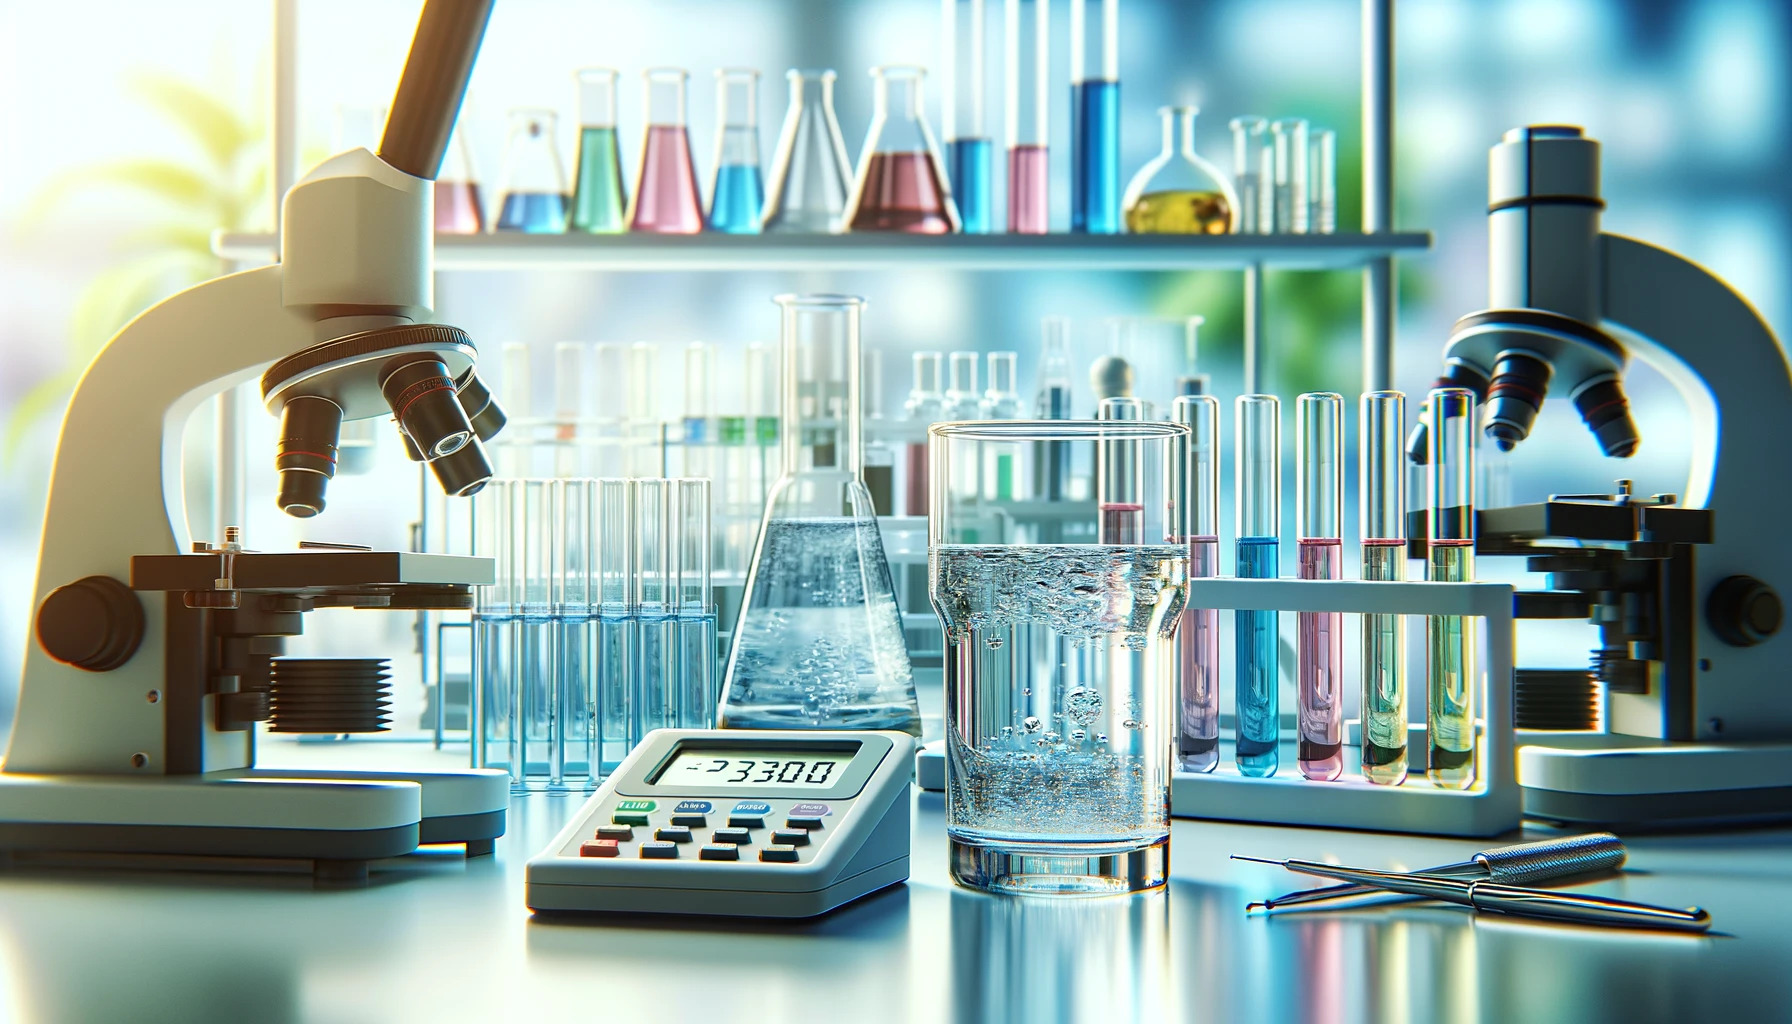

In [215]:
from IPython.display import Image
Image(filename='analisi-acqua.jpg')

### 1.1 Attributi del dataset<a name="1.1"></a>

Gli attributi che il dataset mette a disposizione sono i seguenti:

1. **Index**: Identificatore unico per ogni riga nel dataset;
2. **pH**: Misura dell'acidità o alcalinità dell'acqua;
3. **Iron (Ferro)**: Concentrazione di ferro nell'acqua, importante per la qualità dell'acqua;
4. **Nitrate (Nitrati)**: Livello di nitrati nell'acqua, indicatori di contaminazione;
5. **Chloride (Cloruro)**: Concentrazione di cloruro nell'acqua, può indicare varie forme di inquinamento;
6. **Lead (Piombo)**: Livello di piombo nell'acqua, importante per la salute pubblica;
7. **Zinc (Zinco)**: Concentrazione di zinco nell'acqua;
8. **Color**: Colore dell'acqua, che può indicare la presenza di determinati contaminanti;
9. **Turbidity (Torbidità)**: Misura della chiarezza dell'acqua, indica la presenza di particelle sospese;
10. **Fluoride (Fluoro)**: Livello di fluoro nell'acqua, rilevante per la salute dentale e ossea;
11. **Copper (Rame)**: Concentrazione di rame nell'acqua;
12. **Odor (Odore)**: Presenza e tipo di odori nell'acqua, indicatore di contaminazione;
13. **Sulfate (Solfati)**: Livello di solfati nell'acqua, può influenzare il gusto;
14. **Conductivity (Conducibilità)**: Misura della capacità dell'acqua di condurre elettricità, indicatore della presenza di minerali disciolti;
15. **Chlorine (Cloro)**: Livello di cloro, spesso usato nella disinfezione dell'acqua;
16. **Manganese**: Concentrazione di manganese nell'acqua;
17. **Total Dissolved Solids (Solidi Totali Disciolti)**: Quantità totale di minerali disciolti nell'acqua;
18. **Source (Fonte)**: Origine dell'acqua o della campionatura;
19. **Water Temperature (Temperatura dell'Acqua)**: Temperatura dell'acqua al momento del campionamento;
20. **Air Temperature (Temperatura dell'Aria)**: Temperatura dell'aria al momento del campionamento;
21. **Month (Mese)**: Mese in cui è stato effettuato il campionamento;
22. **Day (Giorno)**: Giorno del mese in cui è stato effettuato il campionamento;
23. **Time of Day (Orario del Giorno)**: Orario del giorno in cui è stato effettuato il campionamento;
24. **Target**: Attributo binario usato per classificare la qualità dell'acqua.

### 1.2 Obiettivo del progetto<a name="1.2"></a>

Il progetto "Water Quality Prediction" si pone l'ambizioso obiettivo di sfruttare i dati raccolti per fornire una valutazione accurata e affidabile della qualità dell'acqua, con un focus specifico sulla **potabilità dell'acqua** in diversi ambienti. Attraverso l'analisi di una vasta gamma di parametri chimici e fisici, questo studio mira a sviluppare modelli predittivi capaci di identificare e classificare le condizioni dell'acqua, facilitando così la presa di decisioni informate per la gestione delle risorse idriche e la protezione della salute pubblica.

In modo più specifico, gli obiettivi del progetto includono:

- **Sviluppo di modelli predittivi**: utilizzare tecniche avanzate di data mining e data analysis per creare modelli robusti che possano prevedere la qualità dell'acqua basandosi sui dati disponibili. L'accuratezza di questi modelli è fondamentale per garantire affidabilità nelle previsioni e, di conseguenza, nelle azioni da intraprendere.

- **Identificazione di fattori critici**: determinare quali parametri tra pH, concentrazioni di metalli (ferro, piombo, zinco), nitrati, cloruri, solfati, turbidità, temperatura dell'acqua, e altri, sono i più influenti nel determinare la qualità dell'acqua. Questa analisi consentirà di focalizzare gli sforzi di monitoraggio su quei fattori che hanno l'impatto maggiore.

**Il task principale del progetto è la Classificazione Binaria.**


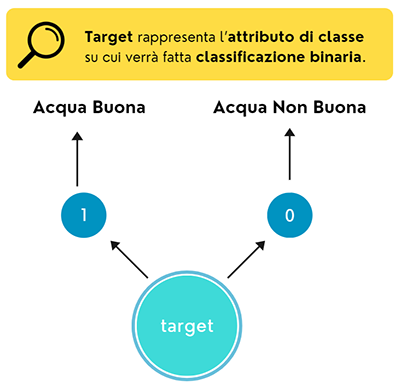

In [216]:
Image(filename='classificazione-binaria.png')

## 2. Setup del progetto<a name="2"></a>

In questa fase sono stati raggruppati gli **import** in tre categorie principali:

- Moduli della libreria standard di Python;
- Moduli di terze parti.

In [217]:
# Moduli della libreria standard di Python
import calendar
import os
import statistics as stat
import time
import datetime
import random
from collections import Counter

# Moduli di terze parti
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import plotly.express as px
import plotly.graph_objects as go
import tensorflow as tf

from IPython.display import Image, SVG, display
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from pandas.api.types import is_numeric_dtype
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import *
from sklearn import metrics
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import HistGradientBoostingClassifier, HistGradientBoostingRegressor
from sklearn.cluster import DBSCAN
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from re import search
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD
from keras.callbacks import EarlyStopping


## 3. Caricamento dei dati<a name="3"></a>

Il processo di analisi inizia con il **caricamento del dataset**, un passaggio cruciale che pone le basi per tutte le successive fasi di esplorazione e analisi dei dati. Utilizziamo la libreria **Pandas** (la quale facilita la manipolazione e l'analisi di grandi set di dati), in particolare per caricare il dataset, utilizziamo il metodo `pd.read_csv()`.

In [218]:
# Percorso del file CSV
PATH = "./dataset_water/Water-Quality-Prediction.csv"

# Carica il dataset utilizzando la funzione read_csv di pandas
df = pd.read_csv(PATH)

# Rinomina gli attributi
df.rename(columns=lambda x : x.lower(), inplace=True)

# Mescola la righe in modo casuale e seleziona le prime 20
df.sample(frac=1).head(20)

index        ph          iron    nitrate    chloride           lead  \
410021  410021  6.815740  2.740000e-06   6.419923  186.978356   1.030000e-70   
987331  987331  6.963719  1.156310e-01   3.678118  237.492816   2.550000e-64   
766961  766961  7.371085  1.393516e-01   3.708268  148.202418  1.010000e-149   
341863  341863  6.534659  4.060909e-02   2.701682  154.016689   2.500000e-07   
455646  455646  6.910900  1.098230e-04   3.586118  172.469522   4.570000e-57   
553981  553981  8.323039  1.371872e-03   1.653598  141.399477  4.590000e-135   
667411  667411  8.177432  9.513487e-02   3.627482         NaN   2.191120e-04   
865518  865518  6.199194  4.247755e-02  18.826370   93.136331   9.220000e-51   
20893    20893  6.960164  5.396170e-04   5.056671  207.823751   3.840000e-62   
635062  635062  7.349302  3.238652e-02   5.329344  111.303241   1.040000e-54   
627105  627105  7.129135  2.360949e-02        NaN  210.413286   4.130000e-30   
372867  372867       NaN  5.283600e-04   5.365216  155.181556   2.460000e-69   
776745  776745  7.249102  6.398840e-04  11.524138  153.556117   4.530000e-26   
659724  659724  7.477867  2.480000e-07   2.137665  110.089652   1.860000e-76   
405152  405152  5.990818  7.270000e-05  10.016644  191.968548   5.820000e-93   
18293    18293  7.549280  1.016958e-01   5.859372         NaN   4.203870e-04   
869405  869405  7.389355  1.051740e-04   3.434484  123.616603   4.590000e-70   
749854  749854  8.581529  6.344029e-02   4.576450  153.028938  2.220000e-190   
58841    58841  7.597512  7.066711e-02   6.227924  118.562953   2.010000e-23   
188415  188415  7.860014  9.720000e-06   2.753843  192.612399   3.130000e-59   

            zinc           color  turbidity  fluoride  ...  chlorine  \
410021  0.114090  Near Colorless   0.267937  0.604005  ...  3.592615   
987331  0.947667  Near Colorless   0.471371  1.260373  ...  2.740645   
766961  3.892505       Colorless   0.548613  1.042729  ...  4.321880   
341863  1.400285          Yellow   2.663404  1.073899  ...  2.167348   
455646  2.332419       Colorless   0.846273  1.490526  ...  3.306049   
553981  0.416743       Colorless   0.207636  1.244614  ...  3.047977   
667411  8.171579          Yellow   0.107223  1.495931  ...  3.544455   
865518  6.406115    Light Yellow   0.105682  0.866605  ...  4.033079   
20893   0.520625       Colorless   0.000121  0.782285  ...  2.927452   
635062  1.287186  Near Colorless   0.440561  0.835982  ...  4.135169   
627105  3.017807       Colorless   0.351278  0.777466  ...  3.702898   
372867  0.627260          Yellow   0.089523  1.094698  ...  2.751661   
776745  4.014021          Yellow   0.847668  1.580708  ...  5.323742   
659724  1.661750  Near Colorless   0.002140  0.367689  ...  3.988989   
405152  0.778660  Near Colorless   0.300866  0.462594  ...  2.927943   
18293   0.401424  Near Colorless   0.453970  0.478435  ...  2.737996   
869405  2.926335  Near Colorless   0.009904  1.130751  ...  3.281755   
749854  2.359672       Colorless   0.012821  0.509494  ...  2.999202   
58841   0.417524  Near Colorless   0.351449  0.051959  ...  3.491549   
188415  0.951298  Near Colorless   0.024045  0.096625  ...  3.739928   

           manganese  total dissolved solids     source  water temperature  \
410021  6.010000e-08              454.820499       Well          15.883719   
987331  1.094700e-04               96.764791     Ground          11.115499   
766961  2.530715e+00              319.437188     Spring          67.575146   
341863  2.920000e-05              438.647035       Lake          13.560488   
455646  2.267478e-03               61.636580       Well          17.043364   
553981  1.520000e-16              131.266031  Reservoir           8.954989   
667411  1.570181e-01              252.127547      River          11.607792   
865518  1.600000e-07               75.955797    Aquifer          15.091587   
20893   4.150000e-05              400.457227      River          18.035200   
635062  2.351708e-02              4

## 4. Preprocessing (e data visualization)<a name="4"></a>

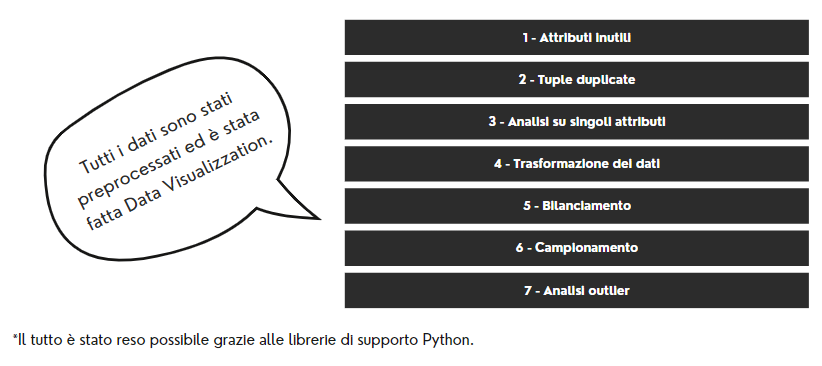

In [219]:
Image(filename='preprocessing.png')

Il **Preprocessing dei Dati** è una fase cruciale nel workflow di qualsiasi progetto di data mining perchè nella maggior parte dei casi i dataset scelti non presentano le caratteristiche ottimali per essere trattati al meglio dagli algoritmi. Per questo motivo è necessario apportare delle modifiche preliminari.

Si tratta di una serie di operazioni sui dati grezzi per renderli più adatti all'analisi e all'addestramento dei modelli. Le attività di preprocessing possono includere la **pulizia dei dati**, la **gestione dei valori mancanti**, la **normalizzazione**, la **standardizzazione**, la **codifica delle variabili categoriche**, la **riduzione della dimensionalità**, il **campionamento** e la **creazione di nuovi attributi**. 

Parallelamente al preprocessing, la **Visualizzazione dei Dati** gioca un ruolo fondamentale nella comprensione delle caratteristiche fondamentali del dataset. Tramite grafici e diagrammi, possiamo identificare tendenze, pattern, anomalie e relazioni tra le variabili, che potrebbero non essere immediatamente evidenti attraverso l'analisi tabellare. Utilizziamo strumenti come Matplotlib e Seaborn, librerie di visualizzazione dati in Python, per creare visualizzazioni informative ed esteticamente gradevoli.

Per rendere il progetto più `modulare` possibile sono state implementate delle funzioni Python definite all'interno di ogni sottoparagrafo (per una migliore comprensibilità), di seguito le loro firme:

- **def find_duplicated(df: pd.DataFrame) -> None:**
- **def find_null_values(df: pd.DataFrame) -> None:**
- **def encode_categorical(ds: DataFrame) -> None:**
- **def plot_feature_importances(df_numerico: pd.DataFrame) -> None:**
- **def balance_dataset(df: DataFrame, target_column: str) -> Tuple[DataFrame, DataFrame]:**
- **def balance_dataset_combine(df: DataFrame, target_column: str) -> Tuple[DataFrame, DataFrame]:**

### 4.1 Come si presenta il dataset iniziale?<a name="4.1"></a>

Prima di immergerci nel processo di preprocessing, è essenziale comprendere lo **stato iniziale del nostro dataset**. Questa fase iniziale di esplorazione ci permette di valutare la struttura dei dati, la presenza di valori mancanti e altre caratteristiche fondamentali che influenzeranno le nostre decisioni durante il preprocessing. 

Analizzando le dimensioni del dataset, possiamo ottenere una visione immediata dell'ampiezza dei dati a nostra disposizione, inclusi il numero totale di osservazioni (**righe**) e di attributi (**colonne**). Queste informazioni ci danno un'idea preliminare della complessità del dataset e della granularità dei dati. 

Inoltre, un primo sguardo alla tipologia delle variabili (**numeriche** e **categoriche**) ci aiuta a pianificare le tecniche di preprocessing più appropriate. Ad esempio, la presenza di variabili categoriche richiederà operazioni di codifica, mentre le variabili numeriche potrebbero beneficiare di normalizzazione o standardizzazione.

Di seguito sono riportate le **dimensioni** del dataset di partenza.

In [220]:
# ritorna righe e colonne del dataset
df.shape

(1048575, 24)

Vediamo ora alcune **informazioni generali** sul dataset, come la quantità di valori Nan per ogni attributo e il tipo di ogni attributo.

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   index                   1048575 non-null  int64  
 1   ph                      1028344 non-null  float64
 2   iron                    1041584 non-null  float64
 3   nitrate                 1029880 non-null  float64
 4   chloride                1017741 non-null  float64
 5   lead                    1043891 non-null  float64
 6   zinc                    1020900 non-null  float64
 7   color                   1047594 non-null  object 
 8   turbidity               1039881 non-null  float64
 9   fluoride                1015357 non-null  float64
 10  copper                  1013693 non-null  float64
 11  odor                    1017243 non-null  float64
 12  sulfate                 1014050 non-null  float64
 13  conductivity            1019772 non-null  float64
 14  ch

Da una prima vista generale si può notare la presenza di **attributi eterogenei**:
- int;
- float;
- object (per le stringhe).

Inoltre, tanti valori risultano essere Nan.

### 4.2 Analisi attributi inutili<a name="4.2"></a>

Questo passaggio include l'identificazione e l'eliminazione di quelle caratteristiche che non contribuiscono all'analisi o potrebbero addirittura introdurre rumore, distorcendo i risultati. Una gestione efficace degli attributi inutili non solo pulisce il dataset ma **riduce anche la complessità computazionale**, semplificando la modellazione e potenzialmente migliorando le prestazioni dei modelli.

Un esempio lampante di attributo non informativo nel nostro dataset è la colonna `Index` (si può procedere con l'eliminazione riducendo la dimensionalità dei dati). Questa colonna funge da identificativo unico per ciascuna osservazione e, sebbene possa essere utile per operazioni di gestione dei dati come l'ordinamento o la ricerca, non porta alcun valore aggiunto dal punto di vista analitico.

In [222]:
# Rimuove la colonna 'Index' dal DataFrame
df_no_index = df.drop(['index'], axis=1)

df_no_index.sample(frac=1).head(20)

ph          iron   nitrate    chloride           lead      zinc  \
584627  8.273946  1.740000e-09  4.228872  199.191347   6.410000e-15  1.363132   
163406       NaN  1.263482e-03  2.466476  210.711077   3.570000e-06  3.666067   
740801  7.557124  4.533130e-04  2.587047  199.730297   1.910000e-17  0.511477   
628979  6.604557  1.140000e-06  5.822823  160.288802   2.430000e-40  0.597173   
250347  7.180082  8.020000e-08  3.718256  236.576572   2.560000e-73  0.590065   
299997  9.153474  2.780000e-12  9.990347  160.723429   4.930000e-29  3.993878   
6275    7.004991  2.840553e-01  4.289887  166.795015   1.260000e-43  3.671989   
249214  6.727968  5.320000e-11  9.650264  180.039171  6.800000e-111  1.423734   
295290  6.321426  3.140745e-03  3.926280   83.277153   2.190000e-11  0.624842   
111488  7.432929  1.810000e-07  7.766086  227.535036   3.220000e-90  0.564983   
3178    6.910157  6.973500e-04  7.257722  246.066970   1.110000e-79  0.068049   
600454  7.801234  6.340000e-05  8.070957  172.536458  2.850000e-108  1.542000   
418553  8.297428  2.610851e-01  2.380045  118.967705  7.270000e-171  1.380770   
946565  7.153041  1.155661e-03  6.468107   96.246481  4.330000e-164  3.024998   
334597  6.483668  4.882590e-04  5.407875  167.207179  2.130000e-110  1.945071   
310910  6.491661  2.590312e-03  5.201209  157.631244  5.340000e-148  0.567829   
144539  7.553774  1.360000e-25       NaN  170.251479   0.000000e+00  3.542760   
150941  6.537108  8.489928e-02  5.984433  114.576138   2.230000e-40  0.251173   
915523  7.958548  1.008358e-01  6.500542  106.584623   3.890000e-60  1.120090   
173820  6.556821  1.860892e-02  6.351216  160.422087  9.110000e-133  1.064953   

                 color  turbidity  fluoride    copper  ...  chlorine  \
584627       Colorless   0.061969  0.494718  0.228932  ...  3.876850   
163406       Colorless   0.487320  0.246371  0.348467  ...  1.986954   
740801    Light Yellow   0.369052  0.306168  0.064610  ...  3.148190   
628979    Faint Yellow   0.396666  0.602940  0.225467  ...  3.684402   
250347  Near Colorless   0.086720  0.242283  0.073085  ...  3.376909   
299997  Near Colorless   0.119003  0.789486  0.039365  ...  3.071336   
6275    Near Colorless   0.001707  0.166729  0.044322  ...  4.019585   
249214       Colorless   0.026775  0.603005  0.611812  ...  3.167100   
295290          Yellow   0.285484  2.913885  0.946290  ...  4.474134   
111488  Near Colorless   0.222578  0.913004  0.236472  ...  3.035147   
3178         Colorless   0.143391  1.054467  0.243627  ...  2.770413   
600454  Near Colorless   0.453132  0.403392  0.669267  ...  3.836137   
418553       Colorless   0.004642  1.233864  0.764100  ...  2.566467   
946565    Faint Yellow   0.334260  1.561583  0.497842  ...  3.389714   
334597       Colorless   0.754628  0.039957  1.144090  ...  3.718054   
310910          Yellow   0.019675  2.278130  0.108776  ...  4.276294   
144539  Near Colorless   0.226251  0.348713  0.368422  ...  3.241701   
150941       Colorless   0.292192  0.648867  0.628000  ...  3.873891   
915523       Colorless   0.702997  1.031685  0.096778  ...  3.949886   
173820  Near Colorless   0.121429  1.147970  0.143335  ...  2.169285   

           manganese  total dissolved solids     source  water temperature  \
584627  3.430000e-09              206.749998     Ground          28.279760   
163406  1.110000e-05              462.169014      River          29.357190   
740801  8.210000e-10              274.854570     Ground          16.896119   
628979  3.240000e-08               15.342355       Well          28.979764   
250347  3.908830e-04              153.656921       Well          11.453551   
299997  2.759642e-03              363.536430  Reservoir           5.399179   
6275    2.847779e-02              112.796336     Stream          20.423261   
249214  6.290000e-06              175.711623    Aquifer          14.200672   
295290  3.976814e+00              255.014578        NaN          17.128192   
111488  2.720000e-1

### 4.3 Analisi di tuple duplicate<a name="4.3"></a>

Le tuple duplicate sono insiemi di osservazioni all'interno del dataset che **presentano esattamente gli stessi valori per tutte le caratteristiche**, rendendole ridondanti dal punto di vista informativo. La loro esistenza può derivare da vari fattori, tra cui errori durante la raccolta dei dati, problemi di fusione di dataset provenienti da più fonti, o semplicemente a causa di inserimenti accidentali.

La presenza di tuple duplicate in un dataset può rappresentare un problema significativo per l'analisi dei dati e la modellazione predittiva. Queste ripetizioni possono introdurre un bias nei modelli, alterare i risultati statistici e influenzare negativamente le prestazioni complessive dei processi di data mining. Di conseguenza, l'**identificazione** e la **rimozione delle tuple duplicate** è un passaggio cruciale nel preprocessing dei dati.

In [223]:
def find_duplicated(df):
    """
    Identifica e stampa le tuple duplicate in un DataFrame pandas.
    Visualizza un grafico a torta che mostra la proporzione di tuple duplicate
    rispetto alle tuple uniche. La legenda con i valori e le percentuali viene
    visualizzata sempre, indipendentemente dalla presenza di tuple duplicate.

    Parametri:
    df (pd.DataFrame): Il DataFrame da analizzare.
    """
    duplicated_rows = df[df.duplicated()]
    total_rows = len(df)
    num_duplicated_rows = len(duplicated_rows)
    num_non_duplicated_rows = total_rows - num_duplicated_rows

    # Stampa informazioni sulle tuple duplicate
    if not duplicated_rows.empty:
        print("Totale tuple duplicate trovate: " + str(num_duplicated_rows) + " su "+ str(total_rows) + " complessive")
        print(" ------ ------ ------ ------ ------ ------ ------  ")
        print("Tuple duplicate trovate: ")
        print(duplicated_rows)
    else:
        print("Nessuna tupla duplicata trovata.")
    
    # Calcola le percentuali
    percent_non_duplicated = (num_non_duplicated_rows / total_rows) * 100 if total_rows > 0 else 0
    percent_duplicated = (num_duplicated_rows / total_rows) * 100 if total_rows > 0 else 0
    
    # Prepara dati per il grafico a torta e la legenda
    sizes = [num_non_duplicated_rows, num_duplicated_rows]
    labels = ['Tuple Uniche', 'Tuple Duplicate']
    explode = (0, 0.1)  # Solo le tuple duplicate "spiccano" se presenti
    colors = ['lightblue', 'lightcoral']
    
    # Crea la legenda con le percentuali
    legend_labels = [f'Tuple Uniche - {percent_non_duplicated:.1f}%', 
                     f'Tuple Duplicate - {percent_duplicated:.1f}%']
    
    # Crea il grafico a torta
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, startangle=140)
    plt.title('Proporzione di Tuple Duplicate nel Dataset')
    plt.legend(legend_labels, loc='best', title="Legenda")
    plt.show()

Totale tuple duplicate trovate: 14784 su 1048575 complessive
 ------ ------ ------ ------ ------ ------ ------  
Tuple duplicate trovate: 
              ph          iron   nitrate    chloride           lead      zinc  \
381350  7.094725  3.846690e-04  4.633822  219.190550   6.640000e-09  4.722171   
381351  7.169448  1.147122e-01  6.696260  177.045488   6.440000e-18  0.027912   
381352  8.141067  4.127095e-03  2.382111  151.646953   5.903851e-01  0.388512   
381354  7.291275  5.221979e-02  5.613283  166.636594   4.470000e-10  1.094266   
381358  7.717828  8.480554e-01  7.960188  267.066943   3.770000e-34  0.064023   
...          ...           ...       ...         ...            ...       ...   
795322  7.488762  2.930000e-08  4.882088  204.584374  5.630000e-232  4.107376   
795325  8.808182  3.590000e-05  5.931737  271.442500   4.460000e-54  0.582342   
795326  7.400124  4.171023e-01  6.141243  143.892597  2.910000e-115  1.580971   
795328  8.744720  2.978400e-03  2.248162  230.53576

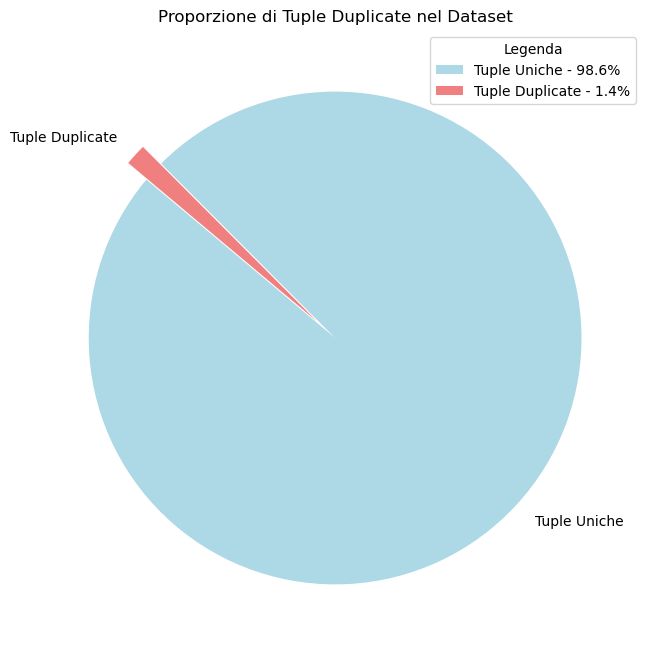

In [224]:
find_duplicated(df_no_index)

Infatti, dopo aver rimosso la colonna identificativa per ogni tupla (e che differenziava ogni oggetto del dataset) sono stati rilevati **14784** oggetti duplicati. Quindi, sono stati rimossi.

In [225]:
# Rimuove le tuple duplicate dal dataset
df_no_duplicate = df_no_index.drop_duplicates()

Nessuna tupla duplicata trovata.


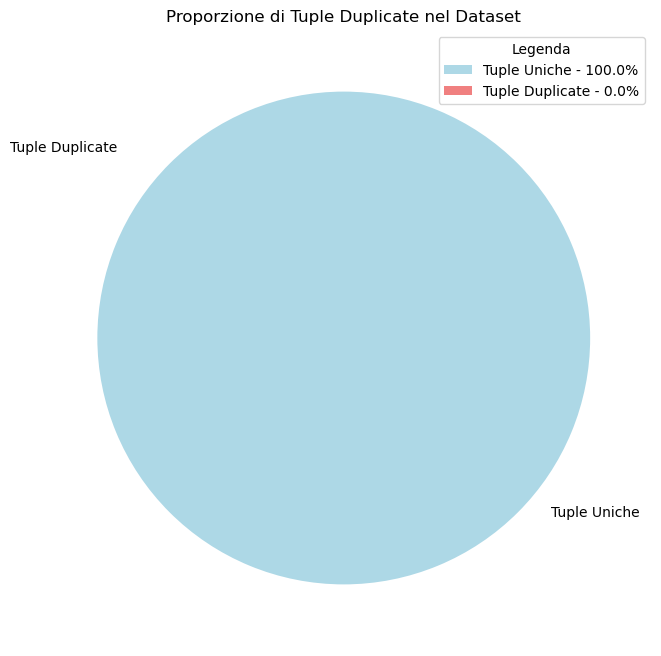

In [226]:
find_duplicated(df_no_duplicate)

### 4.4 Analisi valori mancanti (Nan) ed opportuna gestione<a name="4.4"></a>

I **valori NaN** indicano l'assenza di dati o valori mancanti in un dataset e possono derivare da diverse cause, quali errori nella raccolta dei dati, perdite durante la trasmissione o l'impossibilità di rilevare o registrare una misurazione. La presenza di valori NaN può avere un impatto significativo sull'analisi dei dati e sulla performance dei modelli di data mining.

Il primo passo nell'analisi dei valori NaN consiste nell'identificare la loro presenza e distribuzione all'interno del dataset. Utilizzando funzioni di pandas, possiamo ottenere un quadro chiaro di dove essi si trovano e quanto siano diffusi nelle diverse colonne o variabili.

Una volta identificati, esistono diverse strategie per gestire i valori NaN, ognuna con i propri vantaggi e limitazioni. La scelta della strategia più appropriata dipende dal contesto specifico, dalla quantità di dati mancanti e dall'importanza delle variabili interessate. Le opzioni includono:

- **Rimozione**: questo metodo comporta l'eliminazione delle righe o delle colonne intere dal dataset qualora presentino valori NaN. Sebbene questa operazione sia di facile attuazione, il suo impiego rischia di comportare la perdita di informazioni importanti, in particolare in scenari dove i dati mancanti sono diffusi su larga scala;

- **Imputazione**: consiste nel rimpiazzare i valori mancanti (NaN) con delle stime calcolate. Queste stime possono basarsi su statistiche descrittive semplici, come media, mediana o moda delle colonne, oppure su tecniche più sofisticate, quali l'uso, a loro volta, di algoritmi di data mining. Questa strategia permette di mantenere e sfruttare le informazioni contenute nel dataset, ma introduce un livello di incertezza, in quanto i valori stimati potrebbero non corrispondere esattamente ai valori reali;

- **Omissione nell'analisi**: un approccio alternativo consiste nel semplicemente ignorare i valori mancanti durante l'analisi. Questo può essere realizzato mediante tecniche di analisi che sono in grado di gestire direttamente i valori NaN. Sebbene questa strategia eviti la perdita di dati o l'introduzione di stime potenzialmente inaccurata, la sua applicabilità dipende dalla natura specifica dell'analisi e dalla capacità dei metodi analitici di trattare efficacemente i dati incompleti.

In [227]:
df_no_duplicate.shape

(1033791, 23)

Il dataset in esame contiene più di un milione di tuple anche dopo aver rimosso i valori duplicati. Quindi, si presuppone che l'eventuale presenza di valori Nan (se permette di mantenere le dimensioni del dataset ancora abbastanza alte) si può risolvere con un banale **drop di tutte le tuple contenenti almeno un valore nullo** perchè il dataset è sufficientemente numeroso. Vediamo, innanzitutto se ci sono valori Nan e quanti sono (per ogni attributo viene riportata la quantità e la percentuale sul totale delle tuple).

In [228]:
def find_null_values(df):
    """
    Crea una tabella con la quantità e la percentuale di valori nulli per attributo,
    stampa il numero di tuple con almeno un valore NaN,
    e poi visualizza la percentuale di valori NaN per colonna nel dataset tramite un grafico a barre.

    Parametri:
    df (pd.DataFrame): Il DataFrame da analizzare.
    """
    # Calcola la quantità e la percentuale di valori nulli per attributo
    valori_nan_per_attributo = df.isna().sum()
    percentuale_valori_nan = (valori_nan_per_attributo / len(df)) * 100

    # Crea una tabella (DataFrame) con le informazioni desiderate
    tabella_valori_nan = pd.DataFrame({
        'Attributo': valori_nan_per_attributo.index,
        'Quantità Valori Nulli': valori_nan_per_attributo.values,
        'Percentuale Valori Nulli': percentuale_valori_nan.values
    })

    # Stampa la tabella
    print(tabella_valori_nan)
    print(" ------ ------ ------ ------ ------ ------ ------  ")
    print("Numero di tuple con almeno un valore Nan: " + str(len(df[df.isnull().any(axis=1)])))

    # Calcola la percentuale di valori NaN per colonna
    nan_percent = df.isna().mean() * 100

    # Visualizza il grafico a barre
    plt.figure(figsize=(15, 8))
    nan_percent.plot(kind='bar')
    plt.ylabel('Percentuale di Valori NaN')
    plt.title('Percentuale di Valori NaN per Colonna nel Dataset')
    plt.xticks(rotation=45, ha='right')
    plt.show()

                 Attributo  Quantità Valori Nulli  Percentuale Valori Nulli
0                       ph                  20225                  1.956392
1                     iron                   6991                  0.676249
2                  nitrate                  18691                  1.808006
3                 chloride                  30816                  2.980873
4                     lead                   4684                  0.453090
5                     zinc                  27665                  2.676073
6                    color                    981                  0.094893
7                turbidity                   8693                  0.840886
8                 fluoride                  33204                  3.211868
9                   copper                  34868                  3.372829
10                    odor                  31311                  3.028755
11                 sulfate                  34513                  3.338489
12          

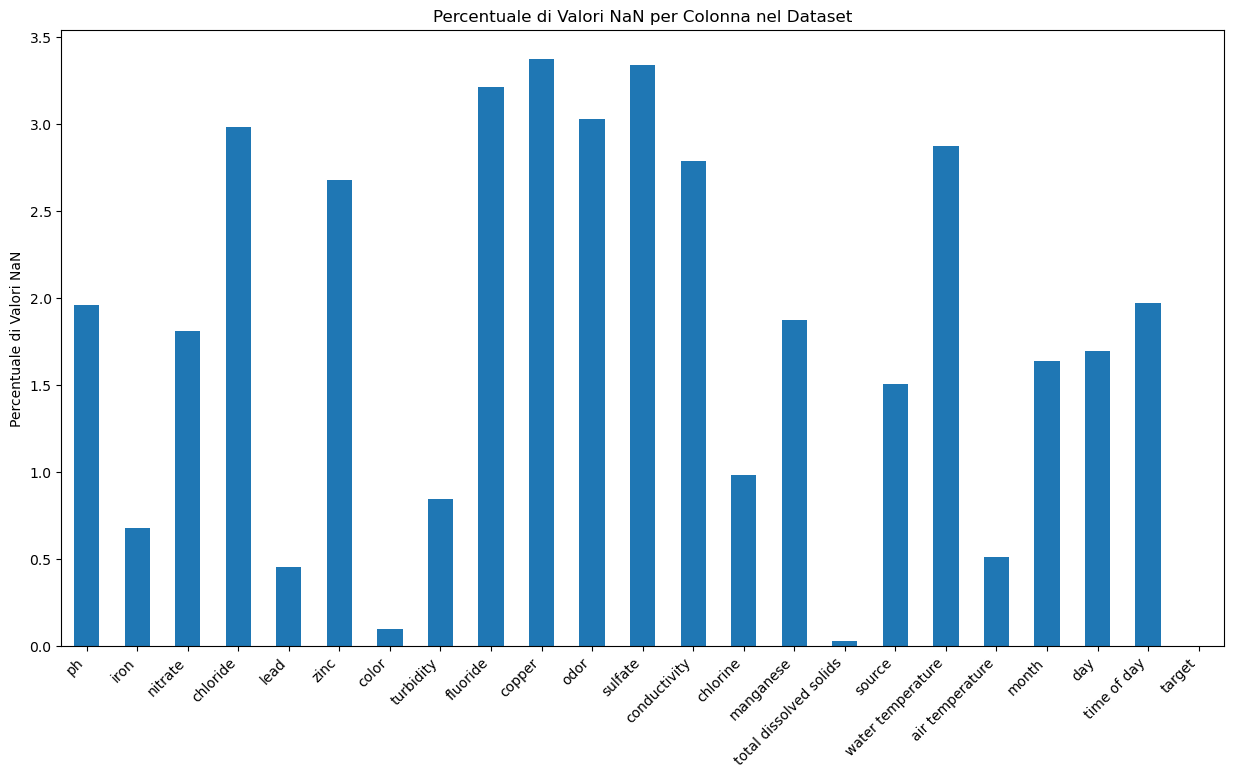

In [229]:
find_null_values(df_no_duplicate)

Il dataset presenta **347378** valori Nan, il quale ci permette di ottenere un alto numero di tuple su cui fare analisi anche dopo la rimozione come si era previsto.

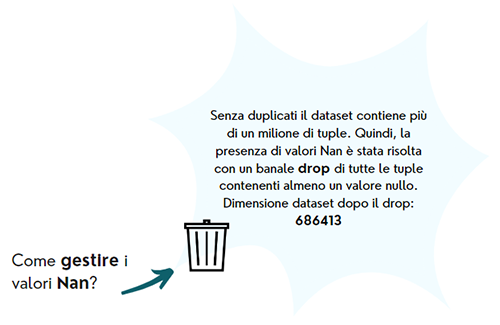

In [230]:
Image(filename='gestione-nan.png')

In [231]:
df_no_nan = df_no_duplicate.dropna()
df_no_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 686413 entries, 1 to 1048573
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ph                      686413 non-null  float64
 1   iron                    686413 non-null  float64
 2   nitrate                 686413 non-null  float64
 3   chloride                686413 non-null  float64
 4   lead                    686413 non-null  float64
 5   zinc                    686413 non-null  float64
 6   color                   686413 non-null  object 
 7   turbidity               686413 non-null  float64
 8   fluoride                686413 non-null  float64
 9   copper                  686413 non-null  float64
 10  odor                    686413 non-null  float64
 11  sulfate                 686413 non-null  float64
 12  conductivity            686413 non-null  float64
 13  chlorine                686413 non-null  float64
 14  manganese          

### 4.5 Analisi attributi (e dipendenze da altri)<a name="4.5"></a>

A questo punto, è necessario **analizzare ogni attributo** e **verificare anche la presenza di relazioni di dipendenza con gli altri**. Lo scopo è quello di aumentare ancora di più la qualità dei dati affinchè gli algoritmi che in seguito verranno applicati riescano ad identificare in modo migliore i pattern.

Per maggiore chiarezza gli attributi del dataset possono essere suddivisi in diverse categorie in base alla loro natura e al tipo di informazioni che forniscono. Ecco una possibile categorizzazione:

**Indicatori chimici e minerali**:
- pH: Acidità o alcalinità dell'acqua.
- Iron (Ferro): Concentrazione di ferro.
- Nitrate (Nitrati): Livello di nitrati.
- Chloride (Cloruro): Concentrazione di cloruro.
- Lead (Piombo): Livello di piombo.
- Zinc (Zinco): Concentrazione di zinco.
- Fluoride (Fluoro): Livello di fluoro.
- Copper (Rame): Concentrazione di rame.
- Sulfate (Solfati): Livello di solfati.
- Manganese: Concentrazione di manganese.
- Total Dissolved Solids (Solidi Totali Disciolti): Minerali disciolti.

**Indicatori fisici**:
- Color: Colore dell'acqua.
- Turbidity (Turbidità): Chiarezza dell'acqua.
- Conductivity (Conducibilità): Capacità di condurre elettricità.
- Water Temperature (Temperatura dell'Acqua): Temperatura dell'acqua.
- Air Temperature (Temperatura dell'Aria): Temperatura dell'aria.

**Indicatori di trattamento e qualità**:
- Chlorine (Cloro): Livello di cloro.
- Odor (Odore): Presenza e tipo di odori.

**Informazioni di Campionamento**:
- Source (Fonte): Origine dell'acqua.
- Month (Mese): Mese del campionamento.
- Day (Giorno): Giorno del campionamento.
- Time of Day (Orario del Giorno): Orario del campionamento.

Questa categorizzazione raggruppa gli attributi in base alla loro rilevanza per la qualità dell'acqua, la loro natura chimica o fisica, e le informazioni relative al processo di campionamento.

#### 4.5.1 Proprietà del dataset<a name="4.5.1"></a>

La situazione attuale del dataset in questione è riportata di seguito tramite le caratteristiche principali.

Per ottenere una comprensione dettagliata delle caratteristiche fondamentali del nostro dataset, impieghiamo il metodo **.describe()** di pandas, che fornisce un riepilogo statistico delle proprietà delle variabili numeriche. Questo metodo è particolarmente utile per iniziare l'**esplorazione dei dati**, offrendo una visione immediata di tendenze centrali, dispersione e forma delle distribuzioni dei dati.

In [232]:
df_no_nan.describe()

ph          iron        nitrate       chloride  \
count  686413.000000  6.864130e+05  686413.000000  686413.000000   
mean        7.449111  1.136893e-01       6.074805     181.796605   
std         0.846487  4.422749e-01       3.126393      65.681599   
min         2.058008  8.010000e-45       0.286173      29.413497   
25%         6.915381  8.950000e-06       3.949075     137.393246   
50%         7.452827  2.053552e-03       5.563647     174.698789   
75%         8.000555  4.959743e-02       7.583982     215.621020   
max        12.891960  1.574860e+01      69.731244    1430.548852   

                lead          zinc     turbidity       fluoride        copper  \
count   6.864130e+05  6.864130e+05  6.864130e+05  686413.000000  6.864130e+05   
mean    1.285938e-03  1.527982e+00  4.825137e-01       0.940246  4.935053e-01   
std     3.009281e-02  1.501653e+00  8.611720e-01       0.791360  5.653848e-01   
min     0.000000e+00  6.350000e-07  1.410000e-14       0.000005  4.440000e-08   
25%    8.210000e-123  4.139055e-01  3.700191e-02       0.370286  1.258901e-01   
50%     1.690000e-62  1.075091e+00  1.992244e-01       0.764960  3.388417e-01   
75%     2.950000e-27  2.214951e+00  5.910320e-01       1.316996  6.782773e-01   
max     3.503948e+00  2.836867e+01  1.929611e+01      12.851710  1.071732e+01   

                odor        sulfate   conductivity       chlorine  \
count  686413.000000  686413.000000  686413.000000  686413.000000   
mean        1.772797     144.576250     424.805808       3.236227   
std         1.050956      66.740666     189.619475       0.714792   
min         0.011006      11.940727      13.054824       1.020283   
25%         0.877739      97.454461     286.470718       2.736838   
50%         1.744201     133.938237     397.081315       3.198334   
75%         2.611247     180.287778     533.116618       3.684282   
max         4.141952    1367.627291    1891.515730      10.351240   

          manganese  total dissolved solids  water temperature  \
count  6.864130e+05           686413.000000      686413.000000   
mean   9.343759e-02              264.736447          19.146466   
std    4.407887e-01              154.304059          11.374789   
min    4.070000e-46                0.012183           1.274254   
25%    2.040000e-06              131.796231          11.350998   
50%    5.330410e-04              263.476315          16.462383   
75%    1.361583e-02              394.934688          23.855966   
max    2.374086e+01              579.799458         210.821909   

       air temperature            day    time of day         target  
count    686413.000000  686413.000000  686413.000000  686413.000000  
mean         60.042356      15.733217      11.493154       0.227478  
std          18.083234       8.802452       6.926804       0.419204  
min         -33.870915       1.000000       0.000000       0.000000  
25%          47.849449       8.000000       5.000000       0.000000  
50%          60.031064      16.000000      11.000000       0.000000  
75%          72.236963      23.000000      17.000000       0.000000  
max         140.875607      31.000000      23.000000       1.000000

#### 4.5.2 Come si presenta l'attributo **Color**? (attributo categorico)<a name="4.5.2"></a>

In [233]:
print(df_no_nan.value_counts('color'))

color
Colorless         213920
Near Colorless    213564
Faint Yellow      123386
Light Yellow       81651
Yellow             53892
dtype: int64


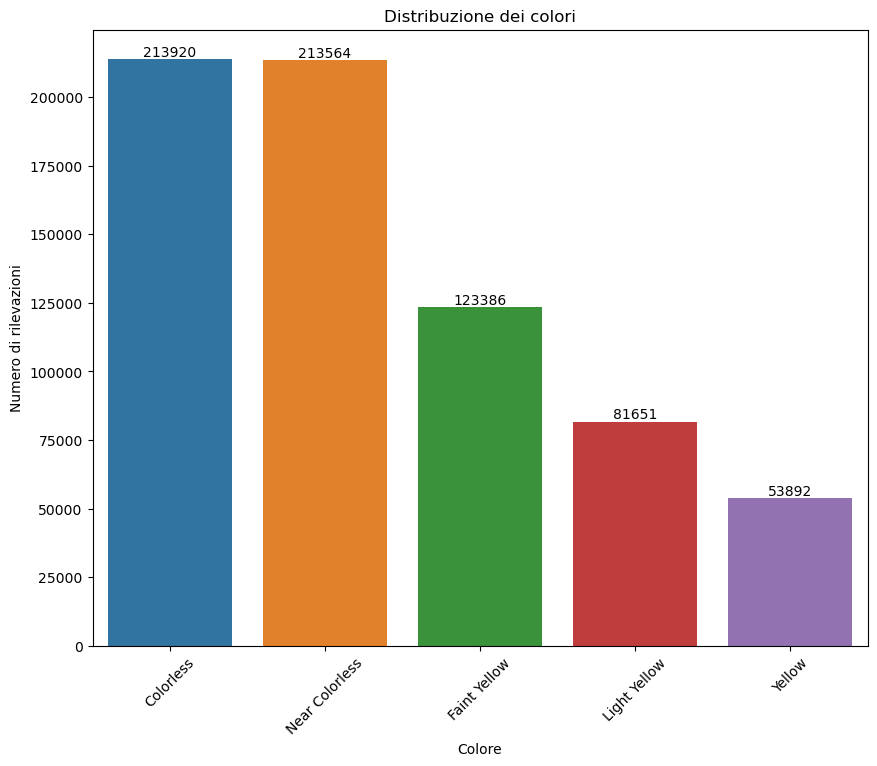

In [234]:
color_counts = df_no_nan['color'].value_counts()

plt.figure(figsize=(10, 8))
ax = sb.barplot(x=color_counts.index, y=color_counts.values)
plt.title('Distribuzione dei colori')
plt.xlabel('Colore')
plt.ylabel('Numero di rilevazioni')
plt.xticks(rotation=45)  # Ruota le etichette per una migliore leggibilità

# Aggiunge il conteggio sopra ogni barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

Da un'analisi sui colori dell'acqua analizzata, **non ci sono valori inaspettati** oppure **anomali**. Inoltre, a scopo di esempio, possiamo stilare la _seguente scala di colori dell'acqua_. 

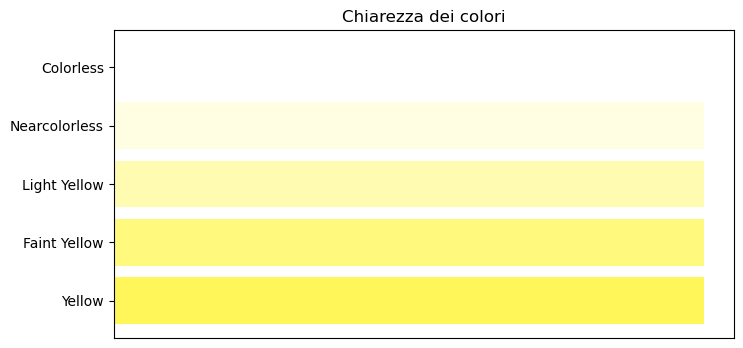

In [235]:
# Lista dei codici esadecimali dei colori
colori_esadecimali = ["#FFFFFF", "#FFFEE2", "#FFFBB1", "#FFF97D", "#FFF659"]

# Etichette per i colori
etichette = ["Colorless", "Nearcolorless", "Light Yellow", "Faint Yellow", "Yellow"]

# Creazione di un diagramma a barre per visualizzare i colori
plt.figure(figsize=(8, 4))
plt.barh(etichette, [1] * len(colori_esadecimali), color=colori_esadecimali)
plt.xticks([])  # Rimuovi le etichette sull'asse x
plt.title("Chiarezza dei colori")
plt.gca().invert_yaxis()  # Inverti l'asse y per visualizzare "colorless" in alto
plt.show()

#### 4.5.3 Come si presenta l'attributo **Month**? (attributo categorico)<a name="4.5.3"></a>

In [236]:
print(df_no_nan.value_counts('month'))

month
January      58521
May          58509
July         58491
August       58365
March        58277
December     58110
October      58102
November     56495
June         56460
April        56322
September    55977
February     52784
dtype: int64


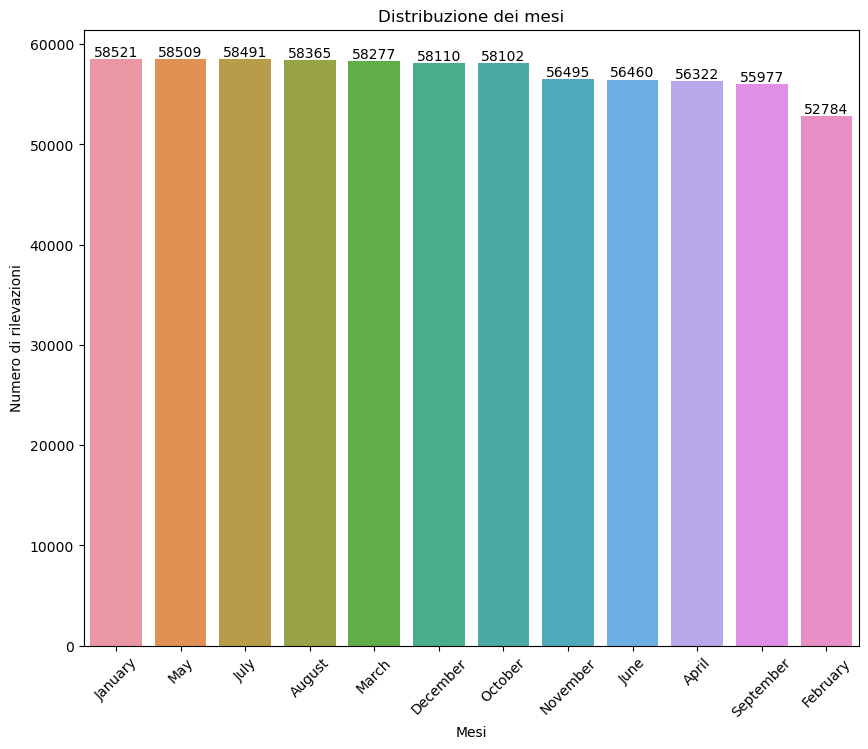

In [237]:
month_counts = df_no_nan['month'].value_counts()

plt.figure(figsize=(10, 8))
ax = sb.barplot(x=month_counts.index, y=month_counts.values)
plt.title('Distribuzione dei mesi')
plt.xlabel('Mesi')
plt.ylabel('Numero di rilevazioni')
plt.xticks(rotation=45)  # Ruota le etichette per una migliore leggibilità

# Aggiunge il conteggio sopra ogni barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

#### 4.5.4 Come cambia la qualità dell'acqua in base al mese?<a name="4.5.4"></a>

Un'analisi focalizzata su come varia la qualità dell'acqua in base al mese offre **spunti preziosi sulle possibili influenze stagionali e ambientali**. Le variazioni climatiche, gli eventi atmosferici e le attività umane che si susseguono in diversi periodi dell'anno possono avere un impatto significativo sulla qualità delle risorse idriche.

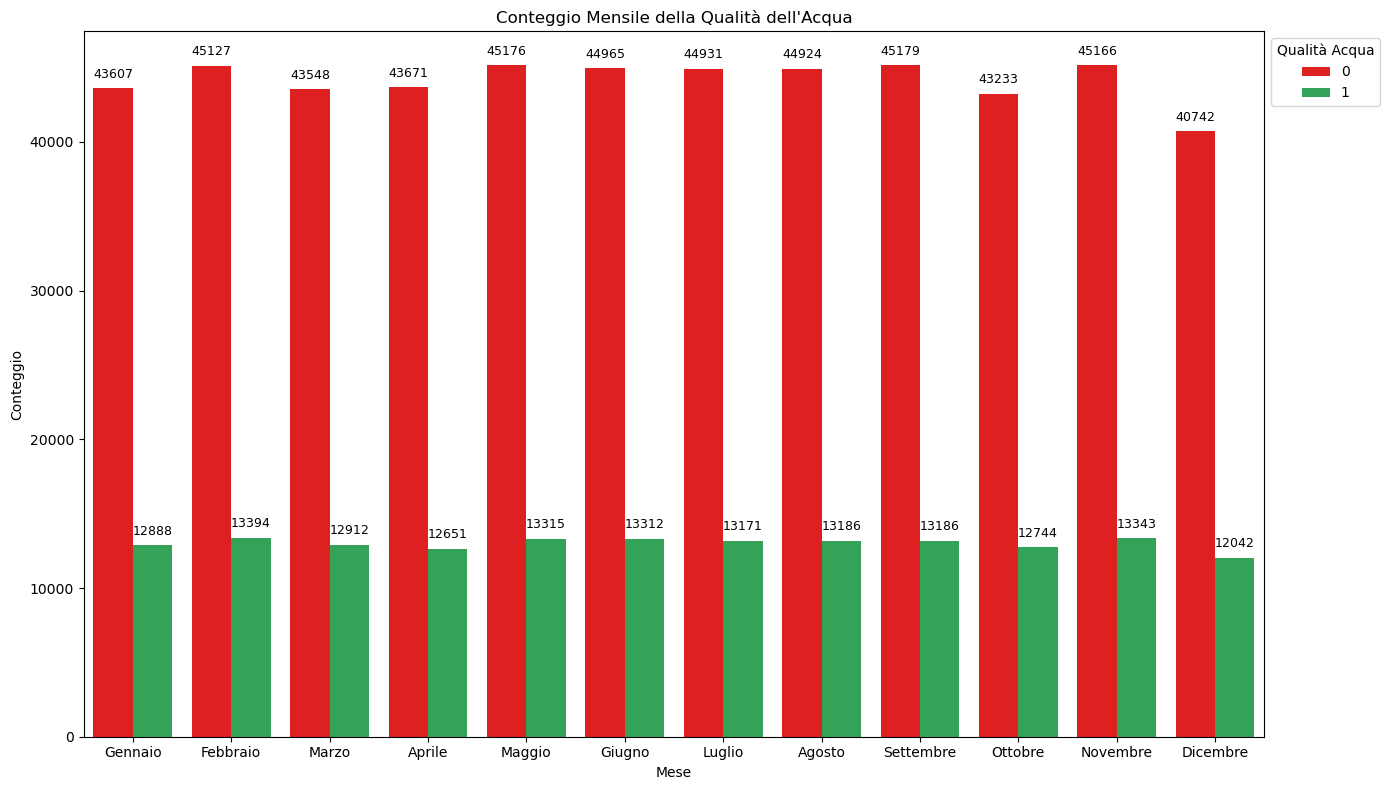

In [238]:
custom_colors = ['#FE0000', '#23B550']

# Crea il grafico con la palette personalizzata
plt.figure(figsize=(14, 8))
ax = sb.countplot(x='month', hue='target', data=df_no_nan, palette=custom_colors)

plt.title('Conteggio Mensile della Qualità dell\'Acqua')
plt.xlabel('Mese')
plt.ylabel('Conteggio')
plt.xticks(ticks=range(12), labels=['Gennaio', 'Febbraio', 'Marzo', 'Aprile', 'Maggio', 'Giugno', 'Luglio', 'Agosto', 'Settembre', 'Ottobre', 'Novembre', 'Dicembre'])

# Sposta la leggenda al di fuori del grafico, sulla destra
plt.legend(title='Qualità Acqua', loc='upper left', bbox_to_anchor=(1, 1))

# Aggiunge il conteggio sopra ogni barra con una dimensione del font ridotta
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize=9)  # Riduce la dimensione del font per il conteggio

plt.tight_layout()
plt.show()

#### 4.5.5 Come varia la quantità di nitrati in base al mese?<a name="4.5.5"></a>

I nitrati, comunemente presenti nelle acque superficiali e sotterranee, possono originare da diverse fonti, incluse le pratiche agricole (come l'uso di fertilizzanti), gli scarichi industriali e i reflui urbani. Infatti, un aumento della presenza di nitrati potrebbe essere correlato a **periodi di intensa attività agricola**.

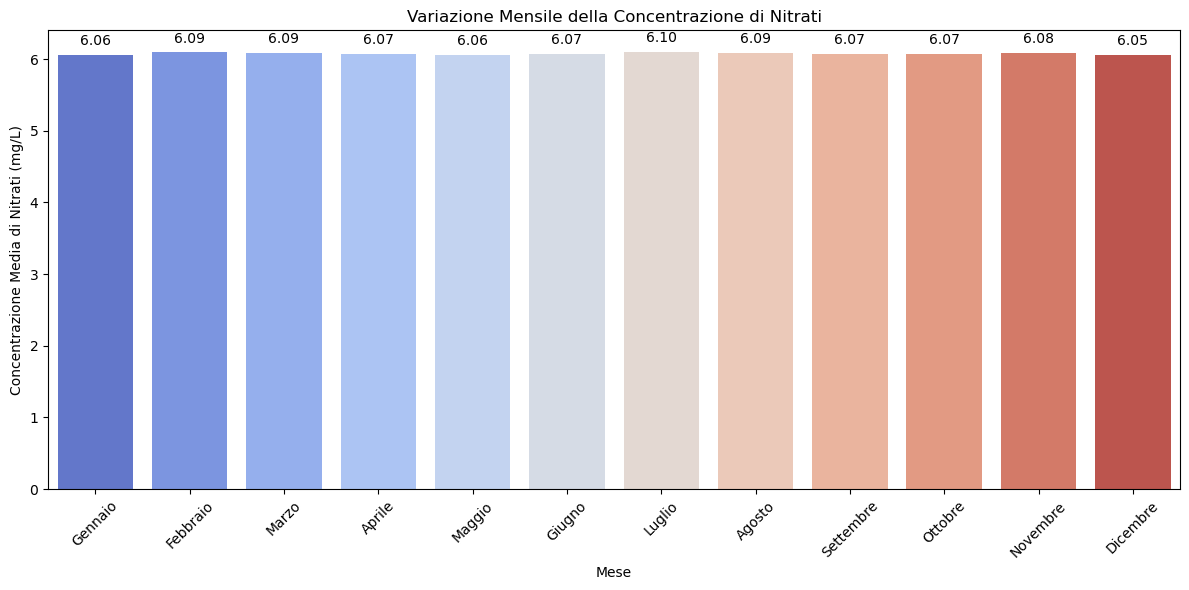

In [239]:
# Calcola la media mensile della concentrazione di nitrati
nitrati_mensili = df_no_nan.groupby('month')['nitrate'].mean().reset_index()

# Ordina i dati per mese se non sono già in ordine sequenziale
nitrati_mensili = nitrati_mensili.sort_values('month')

# Crea il grafico a barre
plt.figure(figsize=(12, 6))
ax = sb.barplot(x='month', y='nitrate', data=nitrati_mensili, palette='coolwarm')

# Imposta i nomi dei mesi come etichette dell'asse x per maggiore chiarezza
mesi = ['Gennaio', 'Febbraio', 'Marzo', 'Aprile', 'Maggio', 'Giugno', 
        'Luglio', 'Agosto', 'Settembre', 'Ottobre', 'Novembre', 'Dicembre']
plt.xticks(range(12), mesi, rotation=45)

plt.title('Variazione Mensile della Concentrazione di Nitrati')
plt.xlabel('Mese')
plt.ylabel('Concentrazione Media di Nitrati (mg/L)')

# Aggiungere il valore di concentrazione sopra ogni barra
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize=10)

plt.tight_layout()
plt.show()

Dal precedente grafico possiamo notare come la distribuzine dei nitrati sembra essere abbastanza uniforme.

#### 4.5.6 Come cambia la qualità dell'acqua in base alla temperatura?<a name="4.5.6"></a>

La **temperatura** influisce sulla vita acquatica e sui processi chimici, rendendo cruciali tali analisi per la gestione delle risorse idriche.

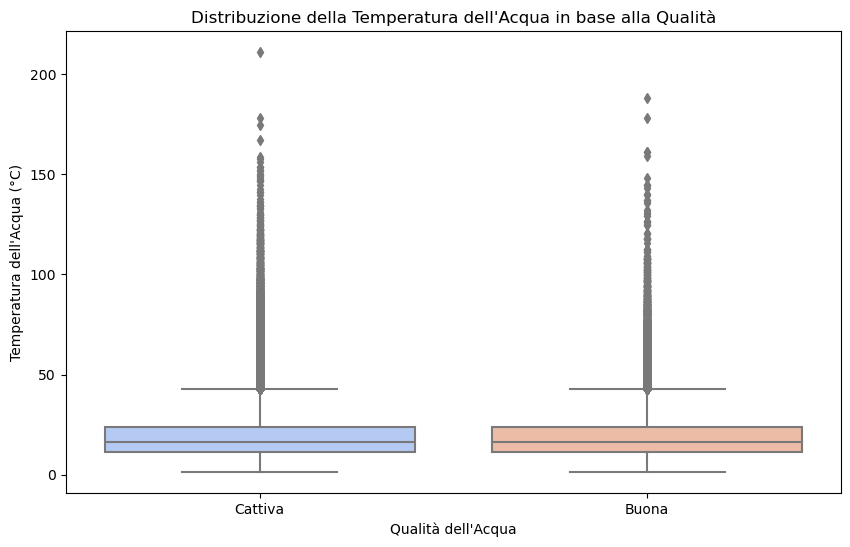

In [240]:
plt.figure(figsize=(10, 6))

# Crea un box plot
sb.boxplot(x='target', y='water temperature', data=df_no_nan, palette='coolwarm')

# Imposta le etichette per una migliore comprensione
plt.xticks(ticks=[0, 1], labels=['Cattiva', 'Buona'])
plt.title('Distribuzione della Temperatura dell\'Acqua in base alla Qualità')
plt.xlabel('Qualità dell\'Acqua')
plt.ylabel('Temperatura dell\'Acqua (°C)')

plt.show()

#### 4.5.7 Quanto incide la sorgente dell'acqua?<a name="4.5.7"></a>

Diverse sorgenti, quali fiumi, laghi o pozzi, possono presentare variazioni significative nei parametri di qualità.

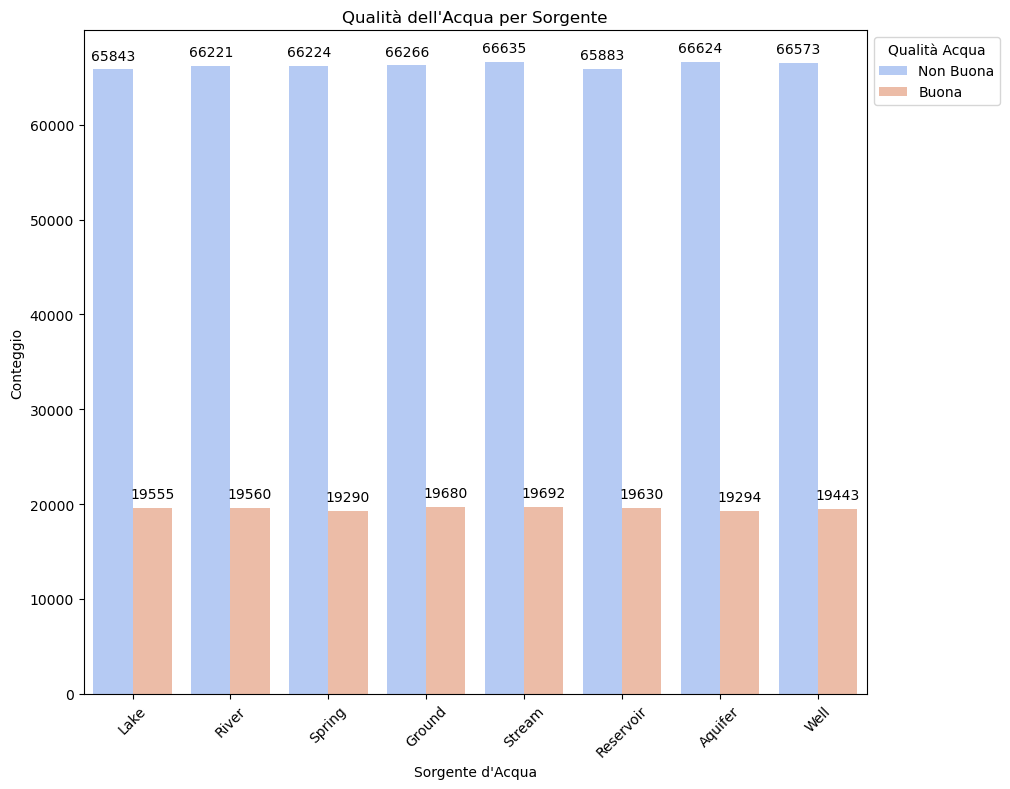

In [241]:
plt.figure(figsize=(12, 8))

# Crea un countplot
ax = sb.countplot(x='source', hue='target', data=df_no_nan, palette='coolwarm')

# Imposta i titoli e le etichette
plt.title('Qualità dell\'Acqua per Sorgente')
plt.xlabel('Sorgente d\'Acqua')
plt.ylabel('Conteggio')

# Sposta la leggenda al di fuori del grafico, sulla destra
plt.legend(title='Qualità Acqua', labels=['Non Buona', 'Buona'], loc='upper left', bbox_to_anchor=(1, 1))

# Aggiungi il conteggio sopra ogni colonna
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.xticks(rotation=45)  # Ruota le etichette dell'asse x per una migliore leggibilità
plt.tight_layout(rect=[0, 0, 0.85, 1]) 
plt.show()

### 4.6. Trasformazione dei dati<a name="4.6"></a>

Questa fase è fondamentale perchè **trasforma gli attributi categorici in attributi di tipo numerico** permettendo l'applicazione, oltre che degli algoritmi di data mining, anche di alcuni relativi alla fase di preprocessing come il bilanciamento.

Si tratta di una funzione che **mappa l'intero insieme di valori di un attributo in un nuovo insieme** in modo tale che a ogni valore nell'insieme di partenza corrisponda un unico valore in quello di arrivo.

In [242]:
def encode_categorical(ds):
    """
    Codifica le variabili categoriche di un DataFrame utilizzando Label Encoding.
    
    Questa funzione attraversa tutte le colonne del DataFrame fornito e applica
    Label Encoding a quelle colonne che sono di tipo categorico (non numeriche),
    trasformandole in una rappresentazione numerica mantenendo le relazioni 
    tra i valori.
    
    Parametri:
    ds (pd.DataFrame): Il DataFrame su cui operare la codifica delle variabili categoriche.
    """
    Encoder_df = LabelEncoder()
    for c in ds.columns:
        if not is_numeric_dtype(ds[c]):
            ds[c] = Encoder_df.fit_transform(ds[c])

In [243]:
df_processed = df_no_nan.copy()
encode_categorical(df_processed)

#### 4.6.1 Scaling<a name="4.6.1"></a>

Lo **scaling delle caratteristiche numeriche** è una pratica fondamentale che mira a portare tutte le variabili su una scala comune. Questo è particolarmente importante perché molti algoritmi di data mining, come quelli basati su distanze o gradienti, possono essere influenzati negativamente se le caratteristiche presentano scale molto diverse tra loro. Senza uno scaling adeguato, caratteristiche con valori numericamente più grandi potrebbero pesare in modo sproporzionato nei calcoli dell'algoritmo, portando a una valutazione distorta dell'importanza relativa delle diverse caratteristiche.

Attraverso lo scaling, come realizzato dall'uso di tecniche quali lo **StandardScaler**, si garantisce che ogni caratteristica contribuisca equamente al modello, consentendo di ottenere prestazioni più robuste e interpretabili. Questo approccio non solo migliora l'efficacia degli algoritmi ma facilita anche la convergenza più rapida durante l'addestramento, rendendo il processo più efficiente.

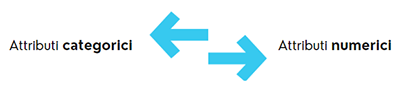

In [244]:
Image(filename='trasformazione-dati.PNG')

In [245]:
# Seleziona solo le colonne numeriche
num_cols = df_processed.select_dtypes(include=[np.number]).columns.drop('target')

# Crea lo scaler
scaler = StandardScaler()

df_scaled = df_processed.copy()
df_scaled[num_cols] = scaler.fit_transform(df_scaled[num_cols])

df_scaled.head(20)

ph      iron   nitrate  chloride      lead      zinc     color  \
1  -0.627593 -0.256874 -0.748671  0.688675 -0.042732 -0.188236 -0.477593   
2  -2.369028 -0.211596 -0.722178  0.749054 -0.042732 -0.665735  0.240481   
4   0.759372 -0.252156  1.231767  0.072231 -0.042732  1.518014  0.240481   
7  -0.225530 -0.257056  1.019345  0.006786 -0.042732 -0.740188 -1.195666   
9  -0.411657 -0.250230 -0.784983 -0.376859 -0.042732 -0.942288 -1.195666   
11  0.422421 -0.257056  0.860066 -1.408972 -0.042732 -0.616732  0.958555   
12  0.191227 -0.098776  0.451830 -0.197812 -0.042732  1.142221  0.958555   
15  3.853714  7.379287 -0.641722  0.748556 -0.042732  0.727517  0.240481   
16 -0.565690 -0.256926  0.453008 -0.774880 -0.042732 -0.967860  0.958555   
17  1.207176 -0.254100 -0.812355 -0.595979 -0.042732 -0.836073  0.958555   
18  0.265276 -0.249578 -0.584835 -0.329289 -0.042732 -0.470861 -1.195666   
19  0.788172 -0.253658  0.933408  0.497607 -0.042732  0.500479 -1.195666   
20  2.642649 -0.256593  1.123839  0.891478 -0.042732  2.610665 -0.477593   
21  0.702675 -0.257056 -0.710724  0.001913 -0.042732 -0.323965  0.240481   
23 -0.889200 -0.248854 -0.733318  0.022348 -0.042732 -0.091132  0.958555   
24  0.495373  0.066703 -0.224188 -0.223553 -0.042732 -0.664375  0.240481   
25 -0.655303 -0.257049 -0.212274 -0.290085 -0.042732 -0.646524 -0.477593   
26 -0.228709 -0.251259  0.706963 -0.735936 -0.042732  0.253887  0.958555   
27 -0.694201 -0.203263 -0.996763 -0.100585 -0.042732 -0.761181  0.958555   
28 -0.518364 -0.257056  0.911263 -1.111691 -0.042732  0.650566  0.240481   

    turbidity  fluoride    copper  ...  chlorine  manganese  \
1   -0.538228 -0.401047 -0.098464  ...  0.078080  -0.211976   
2   -0.188764 -0.653082 -0.109514  ...  0.453276  -0.052991   
4   -0.554648 -0.906458  0.217673  ... -0.081670  -0.204500   
7   -0.504790  0.095975 -0.345627  ... -1.274683  -0.211978   
9   -0.501527 -0.124013 -0.180238  ... -1.330816  -0.211976   
11  -0.352402  1.216978 -0.587005  ... -1.033516  -0.211978   
12  -0.340261 -0.610832  0.290649  ... -0.525943  -0.203475   
15  -0.536903  1.650352 -0.801093  ...  0.250594  -0.128424   
16   0.358133 -1.121938  0.855310  ... -1.583008  -0.211948   
17  -0.559333  0.093157 -0.571094  ... -0.923700  -0.211672   
18  -0.170054 -0.625573 -0.183392  ... -0.405685  -0.150356   
19   1.025426 -0.891505  0.327009  ... -0.735379  -0.211978   
20  -0.512984 -0.017028  1.239639  ...  0.143143  -0.210486   
21  -0.560246 -0.566124 -0.112940  ... -0.424247  -0.207702   
23  -0.556424 -0.454751 -0.313170  ... -0.497669  -0.211978   
24  -0.414805  0.057832  0.342611  ...  1.018972  -0.211952   
25   0.531234 -0.340407  0.816637  ... -0.096421  -0.211955   
26  -0.446826 -0.403837 -0.839383  ... -0.320411  -0.211978   
27  -0.551147 -0.565146 -0.011383  ...  0.327349  -0.203831   
28  -0.510791 -0.907523 -0.443850  ...  0.425160  -0.210858   

    total dissolved solids    source  water temperature  air temperature  \
1                 0.129002 -0.655073          -0.333851         0.618155   
2                 1.978677  0.217000          -0.659617        -0.837850   
4                -0.626432  0.653036          -0.342604         0.513975   
7                -0.325224  0.217000          -0.286121         0.060652   
9                -0.977469  0.217000          -0.637119        -2.545569   
11                1.121480  0.653036           0.903871        -1.340663   
12               -0.013265 -1.091110           0.333007         0.912734   
15                1.679617  0.653036           0.392687        -0.665090   
16               -0.460860  1.089073           0.114868        -0.558164   
17                0.928852 -1.091110           2.089087         0.036313   
18               -1.400832 -0.655073           0.246940         0.531999   
19               -0.130992  0.653036           0.043344        -0.311748   
20                0.040083  0.217000          -0.995362        -1.544007   
21                0.64470

### 4.7 Bilanciamento del dataset<a name="4.7"></a>

Un dataset si considera sbilanciato quando le **classi target sono rappresentate in proporzioni significativamente diverse**. Ad esempio, in un problema di `classificazione binaria`, una classe potrebbe costituire il 90% delle osservazioni mentre l'altra solo il 10%. Questa disparità può portare a modelli di data mining che presentano un bias verso la classe maggioritaria, compromettendo la capacità del modello di generalizzare correttamente sulla classe minoritaria.

**ATTENZIONE: Mentre è più logico pensare che l'analisi degli outlier dovrebbe precedere il campionamento, il quale a sua volta dovrebbe essere eseguito prima del bilanciamento, in questo progetto dopo svariati test (disponibili nell'[Appendice](#9)) è risultato che i classificatori performano meglio concludendo questa fase di Preprocessing con le seguenti operazioni in tale ordine:**
- **Bilanciamento (OverSampling)**
- **Campionamento**
- **Analisi Outlier**
- **Bilanciamento (UnderSampling)**

In [246]:
colors = ['lightblue', 'lightcoral']
labels = ['Acqua Cattiva', 'Acqua Buona']
x = "Qualità dell\'Acqua"
title = "Distribuzione della qualità dell\'acqua"

In [247]:
def plot_distribution(df, column_name, colors, labels, x, title):
    """
    Visualizza un grafico a barre della distribuzione dei valori in una colonna specifica di un DataFrame.
    
    Parametri:
    df (pd.DataFrame): DataFrame contenente i dati.
    column_name (str): Nome della colonna target da analizzare nel DataFrame.
    colors (list): Lista dei colori per le barre.
    labels (list): Lista delle etichette per le barre.
    """
    value_counts = df[column_name].value_counts()
    print(value_counts)
    indices = np.arange(len(labels))
    
    plt.figure(figsize=(8, 6))
    plt.bar(indices, value_counts, color=colors, edgecolor='black')
    plt.xlabel(x)
    plt.ylabel('Conteggio')
    plt.title(title)
    plt.xticks(indices, labels)
    plt.show()

In [248]:
def balance_dataset(df, target_column):
    """
    Bilancia il dataset applicando RandomUnderSampler per l'undersampling della classe maggioritaria.
    
    Parametri:
    df (pd.DataFrame): DataFrame contenente i dati da bilanciare.
    target_column (str): Nome della colonna target nel DataFrame.
    
    Ritorna:
    pd.DataFrame: Un nuovo DataFrame bilanciato.
    """
    
    # Separazione delle feature dal target
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    
    # Definizione e applicazione di RandomUnderSampler
    under = RandomUnderSampler(random_state=42)
    X_train_balanced, y_train_balanced = under.fit_resample(X, y)
    
    # Creazione di un nuovo DataFrame bilanciato per il training
    df_balanced = pd.concat([pd.DataFrame(X_train_balanced, columns=X.columns), pd.DataFrame(y_train_balanced, columns=[target_column])], axis=1)
  
    return df_balanced

In [249]:
def balance_dataset_combine(df, target_column, over_sampling_strategy, under_sampling_strategy):
    """
    Bilancia il dataset applicando una combinazione di SMOTE per l'oversampling della classe minoritaria
    e RandomUnderSampler per l'undersampling della classe maggioritaria.
    
    Parametri:
    df (pd.DataFrame): DataFrame contenente i dati da bilanciare.
    target_column (str): Nome della colonna target nel DataFrame.
    
    Ritorna:
    pd.DataFrame: Un nuovo DataFrame bilanciato.
    """
    
    # Separazione delle feature dal target
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    
    # Definizione della pipeline di campionamento
    over = SMOTE(sampling_strategy=over_sampling_strategy, random_state=42)
    under = RandomUnderSampler(sampling_strategy=under_sampling_strategy, random_state=42)
    steps = [('over', over), ('under', under)]
    pipeline = Pipeline(steps=steps)
           
    # Applicazione della pipeline per bilanciare il dataset
    X_train_balanced, y_train_balanced = pipeline.fit_resample(X, y)
    
    # Creazione di un nuovo DataFrame bilanciato per il training
    df_balanced = pd.concat([pd.DataFrame(X_train_balanced, columns=X.columns), pd.DataFrame(y_train_balanced, columns=[target_column])], axis=1)
    
    return df_balanced

0    530269
1    156144
Name: target, dtype: int64


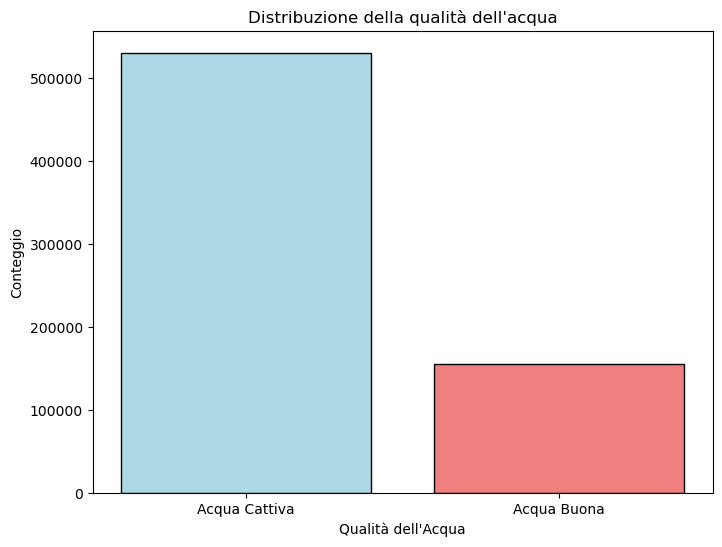

In [250]:
plot_distribution(df_scaled, 'target', colors, labels, x, title)

In [251]:
df_balanced_1 = balance_dataset_combine(df_scaled, 'target', 1, 1) #oversampling

0    530269
1    530269
Name: target, dtype: int64


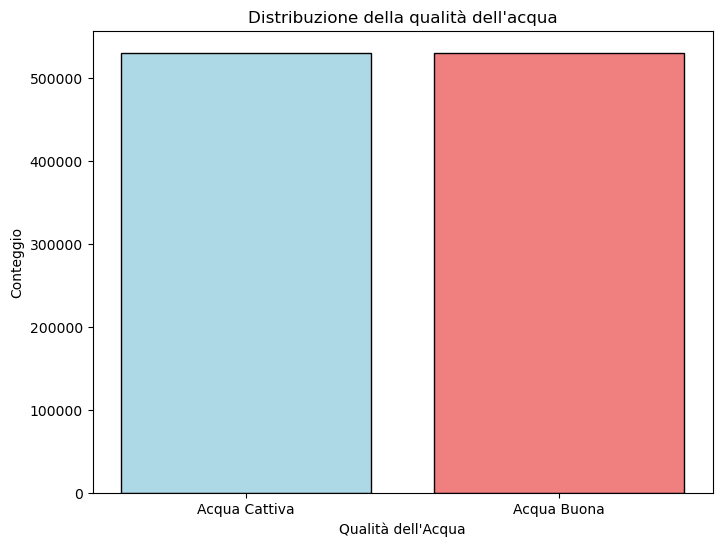

In [252]:
plot_distribution(df_balanced_1, 'target', colors, labels, x, title)

### 4.8 Campionamento<a name="4.8"></a>

Sebbene un dataset più ampio possa sembrare vantaggioso per l'addestramento dei modelli di data mining, in termini di rappresentatività e varietà dei dati, presenta anche delle sfide significative.

In particolare, la gestione di un dataset di grandi dimensioni richiede un **considerevole impiego di risorse computazionali**, che può tradursi in tempi di addestramento prolungati e requisiti di memoria elevati.

Per mitigare queste sfide e ottimizzare l'efficienza del nostro processo di analisi, abbiamo deciso di applicare una tecnica di **campionamento casuale semplice** al nostro dataset bilanciato. Questo metodo di campionamento **garantisce che ogni record nel dataset abbia la stessa probabilità di essere selezionato** per far parte del campione finale. Il campionamento casuale semplice ci permette di ridurre la dimensione del dataset mantenendo al contempo una rappresentazione fedele della varietà e della distribuzione dei dati originari.

Abbiamo generato valori casuali per determinare il numero di righe da includere nel campione (**n**) e lo stato casuale (**random_state**) per garantire la riproducibilità del campionamento. Questa approccio ci ha permesso di ottenere un campione di dimensioni gestibili, riducendo l'impatto sulle risorse computazionali senza compromettere significativamente la qualità e l'affidabilità delle nostre analisi.

In [253]:
df_sampled = df_balanced_1.sample(n=200186, random_state=35) # n e random_state sono dei numeri casuali

In [254]:
df_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200186 entries, 692948 to 591990
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ph                      200186 non-null  float64
 1   iron                    200186 non-null  float64
 2   nitrate                 200186 non-null  float64
 3   chloride                200186 non-null  float64
 4   lead                    200186 non-null  float64
 5   zinc                    200186 non-null  float64
 6   color                   200186 non-null  float64
 7   turbidity               200186 non-null  float64
 8   fluoride                200186 non-null  float64
 9   copper                  200186 non-null  float64
 10  odor                    200186 non-null  float64
 11  sulfate                 200186 non-null  float64
 12  conductivity            200186 non-null  float64
 13  chlorine                200186 non-null  float64
 14  manganese      

1    100419
0     99767
Name: target, dtype: int64


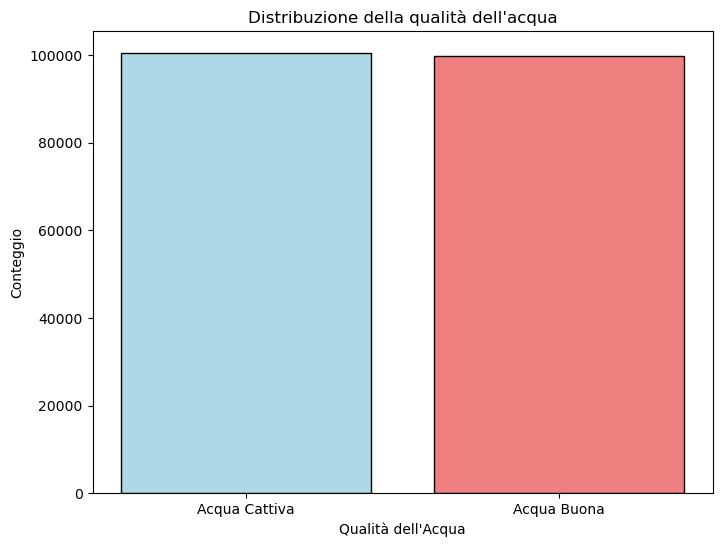

In [255]:
plot_distribution(df_sampled, 'target', colors, labels, x, title)

### 4.9 Analisi outlier<a name="4.9"></a>

Gli **outlier** possono avere un impatto significativo sui risultati delle analisi statistiche e sulla performance dei modelli di data mining. Si tratta di osservazioni che `si discostano marcatamente dalle altre osservazioni nel dataset`; possono essere il risultato di errori di misurazione, variazioni naturali nei dati, o anche indicativi di nuove scoperte.

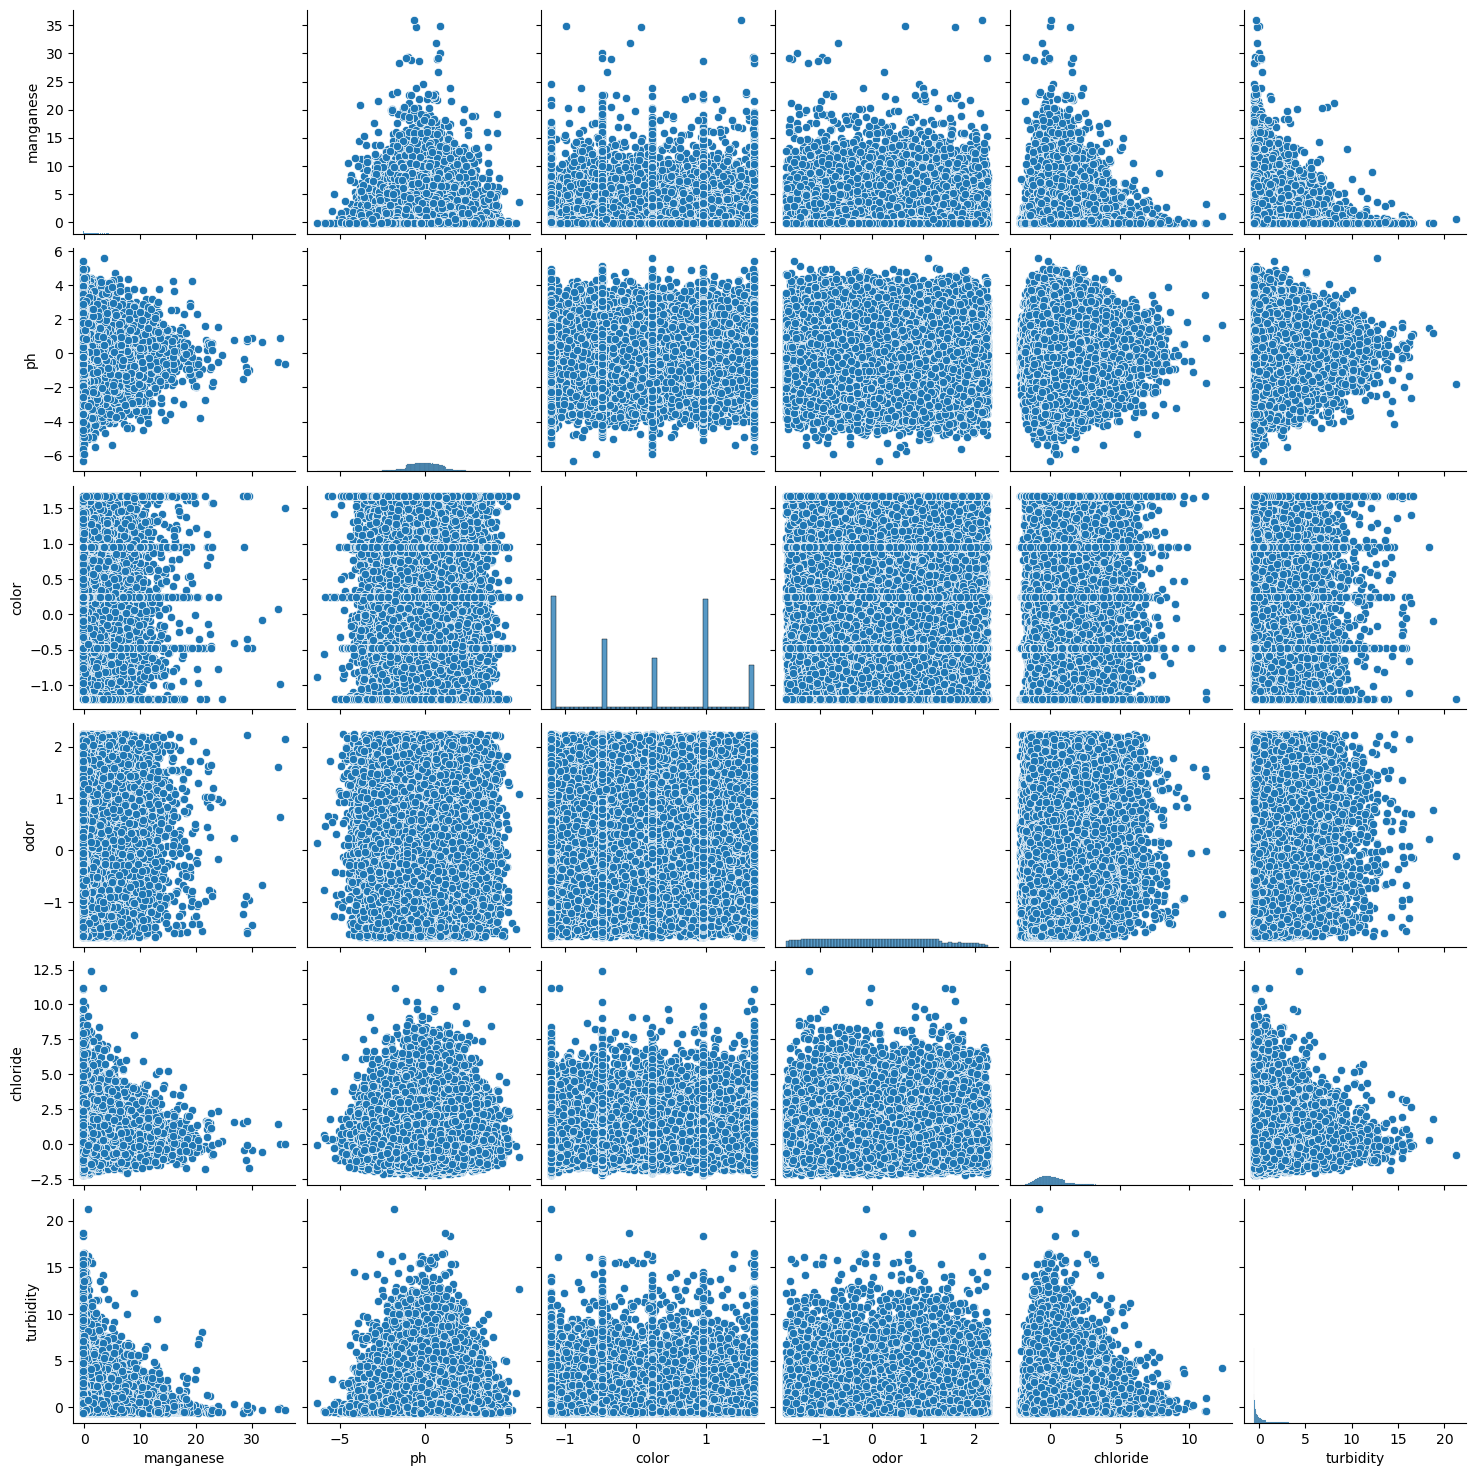

In [256]:
num = ['manganese', 'ph', 'color', 'odor', 'chloride', 'turbidity']
sb.pairplot(df_sampled[num], kind='scatter', diag_kind='hist')
plt.show()

In [257]:
# Create DBSCAN object
dbscan = DBSCAN(eps=2, min_samples=2)

# Perform clustering
clusters = dbscan.fit_predict(df_sampled)

Quanti sono gli outlier? E come sono distribuiti tra le due classi?

In [258]:
df_sampled['Cluster'] = clusters

In [259]:
print("Numero di outlier totali: " + str(np.sum(clusters == -1)))
print("--------------------------------------")

outlier_counts = df_sampled[df_sampled['Cluster'] == -1]['target'].value_counts()

print("Numero di outlier per classe:")
print(outlier_counts)

Numero di outlier totali: 104451
--------------------------------------
Numero di outlier per classe:
0    61737
1    42714
Name: target, dtype: int64


Sono stati trovati **104451** outlier nel dataset. E anche in questo caso, considerata la grande quantità di tuple nel dataset si può procedere direttamente con il drop di esse.

In [260]:
df_no_outliers = df_sampled[df_sampled['Cluster'] != -1].copy()

In [261]:
df_no_outliers.drop(['Cluster'], axis=1, inplace=True)

In [262]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95735 entries, 692948 to 121635
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ph                      95735 non-null  float64
 1   iron                    95735 non-null  float64
 2   nitrate                 95735 non-null  float64
 3   chloride                95735 non-null  float64
 4   lead                    95735 non-null  float64
 5   zinc                    95735 non-null  float64
 6   color                   95735 non-null  float64
 7   turbidity               95735 non-null  float64
 8   fluoride                95735 non-null  float64
 9   copper                  95735 non-null  float64
 10  odor                    95735 non-null  float64
 11  sulfate                 95735 non-null  float64
 12  conductivity            95735 non-null  float64
 13  chlorine                95735 non-null  float64
 14  manganese               95735 no

Arrivati a questo punto il dataset potrebbe essere di nuovo **sbilanciato**.

1    57705
0    38030
Name: target, dtype: int64


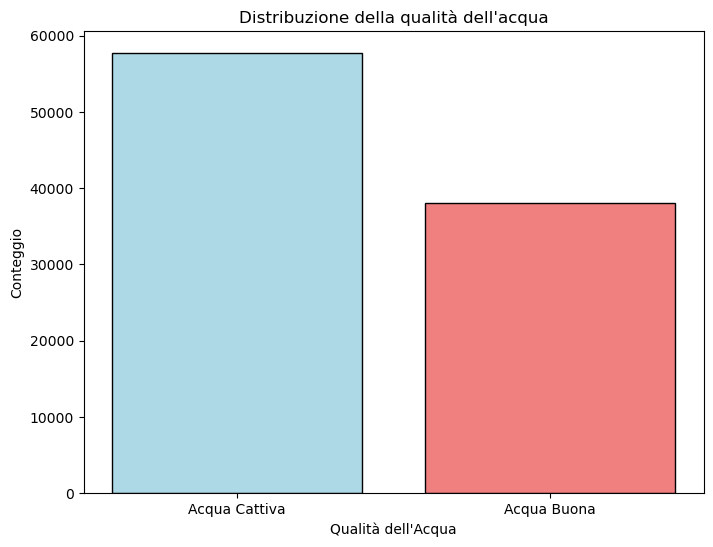

In [263]:
plot_distribution(df_no_outliers, 'target', colors, labels, x, title)

Di fatto il dataset è nuovamente sbilanciato, ma in questo caso si procede con un semplice **undersampling** tramite il metodo balance_dataset.

In [264]:
df_balanced_2 = balance_dataset(df_no_outliers, 'target')

0    38030
1    38030
Name: target, dtype: int64


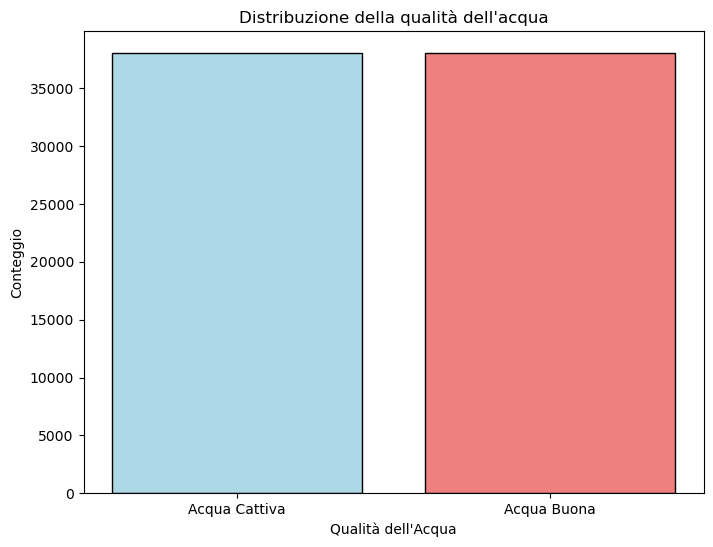

In [265]:
plot_distribution(df_balanced_2, 'target', colors, labels, x, title)

In [266]:
df_balanced_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76060 entries, 0 to 76059
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ph                      76060 non-null  float64
 1   iron                    76060 non-null  float64
 2   nitrate                 76060 non-null  float64
 3   chloride                76060 non-null  float64
 4   lead                    76060 non-null  float64
 5   zinc                    76060 non-null  float64
 6   color                   76060 non-null  float64
 7   turbidity               76060 non-null  float64
 8   fluoride                76060 non-null  float64
 9   copper                  76060 non-null  float64
 10  odor                    76060 non-null  float64
 11  sulfate                 76060 non-null  float64
 12  conductivity            76060 non-null  float64
 13  chlorine                76060 non-null  float64
 14  manganese               76060 non-null

## 5. Correlazione tra gli attributi<a name="5"></a>

L'analisi della correlazione tra gli attributi è fondamentale per **comprendere le relazioni esistenti tra i diversi parametri**. Esaminando il coefficiente di correlazione, possiamo identificare quali variabili mostrano una forte associazione tra loro, suggerendo potenziali meccanismi interdipendenti o influenze comuni sulla qualità dell'acqua.

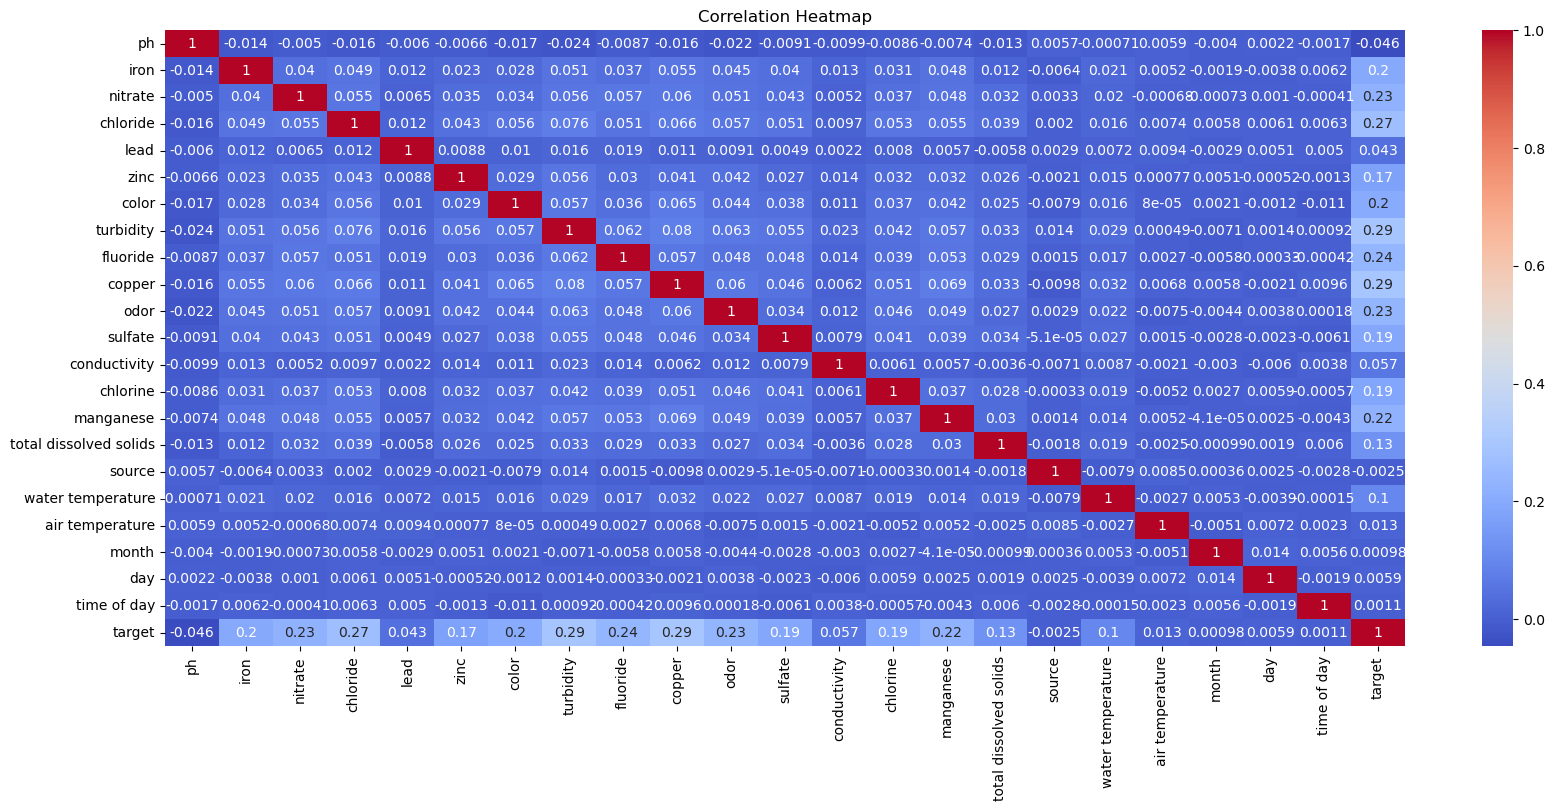

In [267]:
# matrice di correlazione
corr_matrix = df_balanced_2.corr(numeric_only=True)

# visualizza la matrice di correlazione come una heatmap
plt.figure(figsize=(20, 8))
sb.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [269]:
# Calcola il valore assoluto della matrice di correlazione
abs_corr_matrix = corr_matrix.abs()

# Imposta la diagonale a zero per ignorare le autovalutazioni (1.0)
np.fill_diagonal(abs_corr_matrix.values, 0)

# Trova il valore massimo nella matrice di correlazione in valore assoluto
max_corr_value = abs_corr_matrix.max().max()

# Trova gli attributi corrispondenti al valore massimo
max_corr_attr = abs_corr_matrix.stack().idxmax()

print(f"L'attributo con il valore di correlazione più vicino a 1 in valore assoluto è tra: {max_corr_attr} con valore: {max_corr_value}")


L'attributo con il valore di correlazione più vicino a 1 in valore assoluto è tra: ('copper', 'target') con valore: 0.29429221449705373


Possiamo dire che **la correlazione tra gli attributi del dataset è piuttosto bassa** (quasi trascurabile).

Tramite RandomForest siamo in grado di avere un quadro della situazione completo andando a considerare anche la **feature importance**.

In [270]:
def plot_feature_importances(df_numerico):
    """
    Visualizza il grado di importanza degli attributi utilizzando un modello RandomForestClassifier.
    
    Parametri:
    df_numerico (pd.DataFrame): DataFrame contenente le feature numeriche e la colonna target.
    """
    # Preparazione dei dati
    df_X_feature = df_numerico.drop('target', axis=1)
    df_Y_feature = df_numerico['target']

    # Addestramento del modello
    forest = RandomForestClassifier()
    forest.fit(df_X_feature, df_Y_feature)

    # Ottenimento delle importanze delle feature e degli indici ordinati
    attributi = df_X_feature.columns
    importances = forest.feature_importances_
    index = np.argsort(importances)

    # Creazione del grafico
    plt.figure(figsize=(10, 10))
    plt.title('Grado di importanza fra gli attributi')
    plt.barh(range(len(index)), importances[index], color='b', align='center')
    plt.yticks(range(len(index)), attributi[index])
    plt.xlabel('Importanza')
    plt.ylabel('Attributi')
    plt.show()

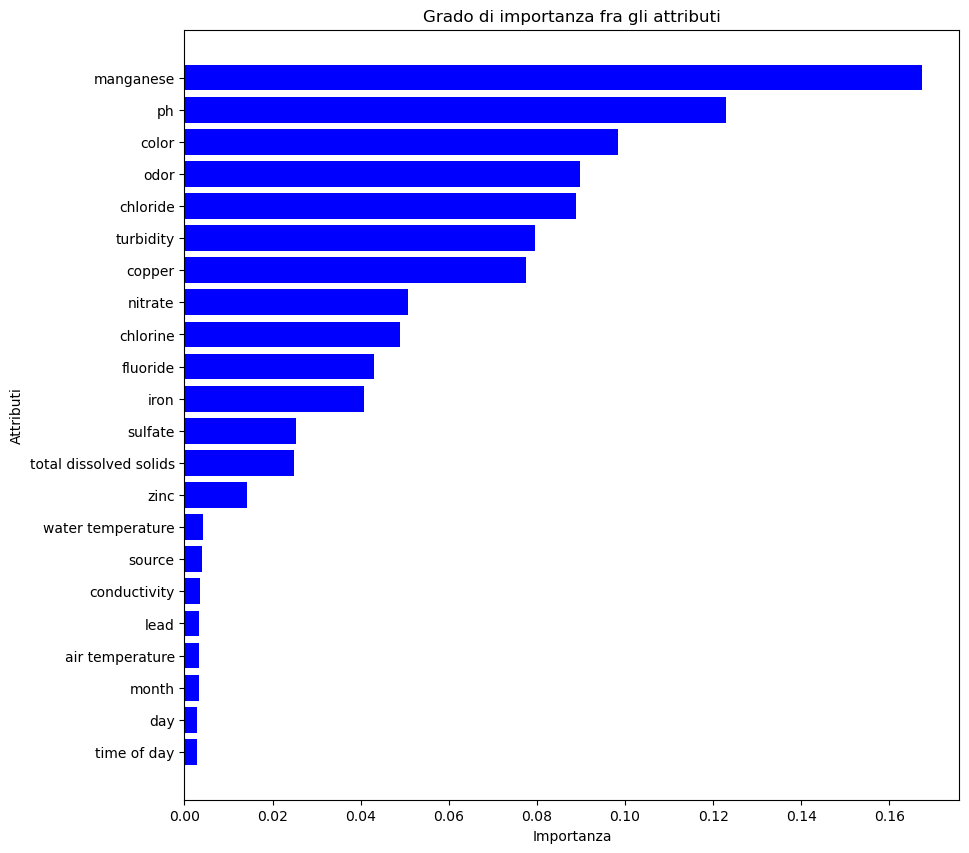

In [126]:
plot_feature_importances(df_balanced_2)

A questo punto possiamo rimuovere alcuni degli attributi meno importanti.

In [271]:
df_preprocessed = df_balanced_2.drop(['month', 'time of day', 'day'], axis=1)

In [272]:
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76060 entries, 0 to 76059
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ph                      76060 non-null  float64
 1   iron                    76060 non-null  float64
 2   nitrate                 76060 non-null  float64
 3   chloride                76060 non-null  float64
 4   lead                    76060 non-null  float64
 5   zinc                    76060 non-null  float64
 6   color                   76060 non-null  float64
 7   turbidity               76060 non-null  float64
 8   fluoride                76060 non-null  float64
 9   copper                  76060 non-null  float64
 10  odor                    76060 non-null  float64
 11  sulfate                 76060 non-null  float64
 12  conductivity            76060 non-null  float64
 13  chlorine                76060 non-null  float64
 14  manganese               76060 non-null

In [464]:
df_preprocessed.to_csv('df_final.csv', index=False)

## 6. Partizionamento dataset<a name="6"></a>

In [273]:
df=pd.read_csv('df_final.csv')

Situazione attuale del dataset:

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76060 entries, 0 to 76059
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ph                      76060 non-null  float64
 1   iron                    76060 non-null  float64
 2   nitrate                 76060 non-null  float64
 3   chloride                76060 non-null  float64
 4   lead                    76060 non-null  float64
 5   zinc                    76060 non-null  float64
 6   color                   76060 non-null  float64
 7   turbidity               76060 non-null  float64
 8   fluoride                76060 non-null  float64
 9   copper                  76060 non-null  float64
 10  odor                    76060 non-null  float64
 11  sulfate                 76060 non-null  float64
 12  conductivity            76060 non-null  float64
 13  chlorine                76060 non-null  float64
 14  manganese               76060 non-null

Arrivati a questo punto del processo di sviluppo è cruciale partizionare il dataset in **train set** (utilizzato per insegnare al modello a riconoscere le relazioni tra le caratteristiche) e **test set** (impiegato per valutare quanto bene il modello è in grado di applicare queste relazioni apprese a nuovi dati).

In [275]:
#divisione 2/3 train 1/3 test
df_X= df.drop('target',axis=1) 
df_Y= df['target']

X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.33,random_state=0)
y_train=y_train.values.ravel()

## 7. Classificatori<a name="7"></a>

È il momento di **costruire modelli** capaci di fare previsioni o classificazioni basate sui dati a disposizione. Questi modelli vengono addestrati sul dataset di training per imparare a distinguere le varie classi.

La scelta dei classificatori può variare ampiamente, includendo metodi semplici come gli **alberi decisionali**, fino a tecniche più complesse e potenti come le **reti neurali** e gli **ensemble di modelli**.

Ricapitolando, i modelli adottati nel progetto possono essere raggruppati come:
- **Classificatori di base**;
- **Classificatori ensemble**;
- **Reti neurali**.

Ogni classificatore viene valutato in base alla sua capacità di generalizzare su dati non visti, utilizzando metriche appropriate come l'**accuratezza**, la **precisione**, il **recall** e il **punteggio F1**, attraverso tecniche di validazione come la **cross-validation**.

Per valutare le metriche dei modelli di classificazione binaria utilizzati per l'analisi si fa uso della **Matrice di Confusione**, ovvero una matrice quadrata in cui le righe sono i valori reali della classe mentre le colonne sono i valori predetti dal modello per la classe.

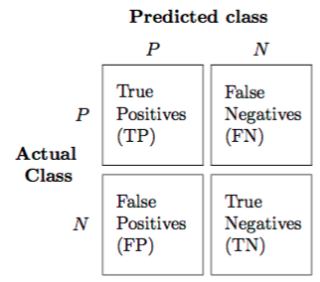

In [276]:
image_path= 'matrice_di_confusione.png'
Image(filename=os.path.join(image_path),width=300)

A questo punto possiamo definire le metriche come segue:
- **Accuracy**: misura la percentuale delle previsioni corrette sul totale delle istanze;
- **Error Rate**: misura complementare all'accuracy; 
- **Precision**: misura la percentuale delle previsioni positive corrette sul totale delle previsioni positive; 
- **Recall**: misura la percentuale delle previsioni positive corrette sul totale dei veri positivi e dei falsi negativi;
- **F-measure**: è la media armonica tra la precision e la recall.

Calcolate nel seguente modo.

\begin{align*}
\text{Accuracy} &= \frac{TP + TN}{TP + TN + FP + FN} \\
\text{Error Rate} &= \frac{FP + FN}{TP + TN + FP + FN} \\
\text{Precision} &= \frac{TP}{TP + FP} \\
\text{Recall} &= \frac{TP}{TP + FN} \\
\text{F1-Score} &= 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
\end{align*}

Come misura di valutazione è stata presa in considerazione anche la **Curva di ROC**. La curva ROC e l'AUC consentono di confrontare facilmente le prestazioni di diversi modelli. Un modello con una curva ROC più vicina al punto (0,1) è generalmente migliore. Un grafico con FPR sull'asse X e TPR sull'asse Y, dove:

\begin{align*}
\text{FPR} &= \frac{FP}{FP + TN} \\
\text{TPR} &= \frac{TP}{TP + FN} \\
\end{align*}

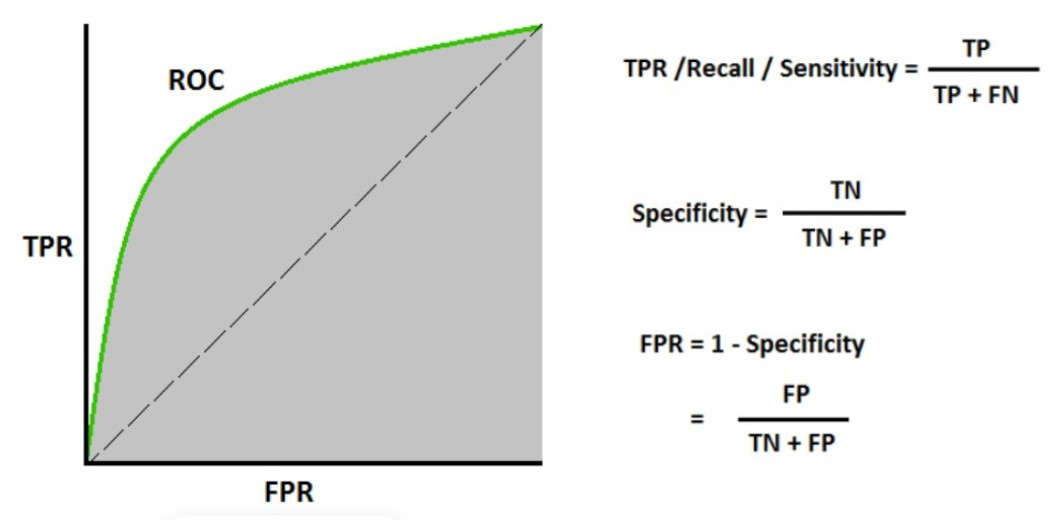

In [277]:
image4b_path= 'roc.jpeg'
Image(filename=os.path.join(image4b_path),width=500)

- **Linea diagonale (y = x)**: Rappresenta un classificatore casuale che non distingue tra classi positive e negative (AUC = 0.5).
- **AUC (Area Under the Curve)**: L'area sotto la curva ROC, che varia da 0.5 (classificatore casuale) a 1 (classificatore perfetto).

Per migliorare ulteriormente le prestazioni di questi modelli, è stata applicata l'**ottimizzazione degli iperparametri** mediante l'uso di **GridSearchCV**. Questo approccio sistematico alla selezione degli iperparametri permette di esplorare una vasta gamma di configurazioni e di identificare quelle che offrono le migliori prestazioni sul dataset di training. L'ottimizzazione degli iperparametri è cruciale per affinare i modelli e renderli il più efficaci possibile.

Di seguito alcune funzioni di supporto utili nelle fasi successive.

In [278]:
def display_report(y_true, y_pred, title):
    """
    Visualizza la matrice di confusione e stampa il report di classificazione.

    Parametri:
    - y_true: array-like, la vera classe.
    - y_pred: array-like, la classe predetta dal modello.
    - display_labels: list, la classi per la visualizzazione nella matrice di confusione.
    """
    # Calcolo della matrice di confusione
    confusion_matrix = metrics.confusion_matrix(y_true, y_pred)
    
    # Visualizzazione della matrice di confusione
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
    fig, ax = plt.subplots(figsize=(5, 5))
    cm_display.plot(ax=ax, values_format='d')
    plt.title("Matrice di confusione (" + title + "):", fontsize=7)
    plt.show()

In [279]:
def print_classification_report(y_true, y_pred, title):
    """
    Stampa il report di classificazione.

    Parametri:
    - y_true: array-like, le vere classi.
    - y_pred: array-like, le classi predette dal modello.
    - display_labels: list, le etichette da visualizzare nel report.
    """
    display_labels=[0, 1]
    
    # Calcolo del report di classificazione
    report = classification_report(y_true, y_pred, target_names=[str(label) for label in display_labels], digits=4)
    
    # Stampa del report di classificazione
    print("\n" + "=" * 70)  # Stampa una linea di separazione
    print("Report di classificazione (" + title + "):")
    print("=" * 70)
    print(report)
    print("=" * 70)

In [280]:
def set_scores(csv, model_name, y_true, y_pred, elapsed_time):
    """
    Aggiorna un DataFrame con le metriche di valutazione di un modello di classificazione e il tempo di addestramento.

    Parameters:
    - csv: Il file csv da aggiornare. Deve avere le colonne per le metriche specificate.
    - model_name (str): Il nome del modello da utilizzare come indice nel DataFrame.
    - y_true (array-like): Le etichette vere del set di dati.
    - y_pred (array-like): Le etichette predette dal modello.
    - elapsed_time (float): Il tempo impiegato dal modello per l'addestramento, in secondi.
    """
    df = pd.read_csv(csv, index_col=0)
        
    df.loc[model_name, "Accuracy"] = accuracy_score(y_true, y_pred)
    df.loc[model_name, "Balanced Accuracy"] = balanced_accuracy_score(y_true, y_pred)
    df.loc[model_name, "Precision"] = precision_score(y_true, y_pred)
    df.loc[model_name, "Weighted Precision"] = precision_score(y_true, y_pred, average='weighted')
    df.loc[model_name, "Recall"] = recall_score(y_true, y_pred)
    df.loc[model_name, "Weighted Recall"] = recall_score(y_true, y_pred, average='weighted')
    df.loc[model_name, "F1"] = f1_score(y_true, y_pred)
    df.loc[model_name, "Time"] = elapsed_time
    df.loc[model_name, "Data esecuzione"] = datetime.datetime.now()
    
    df.to_csv(csv, index=True)

In [281]:
def initial_results():
    
    results_train_df = pd.DataFrame(index=["Albero Decisionale", "Albero Decisionale GSCV", "KNN", "KNN GSCV", "SVM", "Naive Bayes", "Naive Bayes GSCV", "Regressione Logistica", "Regressione Logistica GSCV", "SGD", "SGD GSCV", "Random Forest", "Random Forest GSCV", "AdaBoost", "XGBoost", "Voting Hard", "Voting Soft", "MLP", "ANN"], columns=["Accuracy", "Balanced Accuracy", "Precision", "Weighted Precision", "Recall", "Weighted Recall", "F1", "Time", "Data esecuzione"])
    results_test_df = pd.DataFrame(index=["Albero Decisionale", "Albero Decisionale GSCV", "KNN", "KNN GSCV", "SVM", "Naive Bayes", "Naive Bayes GSCV", "Regressione Logistica", "Regressione Logistica GSCV", "SGD", "SGD GSCV", "Random Forest", "Random Forest GSCV",  "AdaBoost", "XGBoost", "Voting Hard", "Voting Soft", "MLP", "ANN"], columns=["Accuracy", "Balanced Accuracy", "Precision", "Weighted Precision", "Recall", "Weighted Recall", "F1", "Time", "Data esecuzione"])
    results_cv_df = pd.DataFrame(index=["Albero Decisionale", "KNN", "Naive Bayes", "Regressione Logistica", "SGD"], columns=["Accuracy", "ErrorRate", "Precision", "Recall", "F-score", "Time", "Data esecuzione"])
    
    if not os.path.exists("results_train.csv"):
        results_train_df.to_csv("results_train.csv", index=True)

    if not os.path.exists("results_test.csv"):
        results_test_df.to_csv("results_test.csv", index=True)

    if not os.path.exists("results_cv.csv"):
        results_cv_df.to_csv("results_cv.csv", index=True)


In [282]:
initial_results()
models = ["Albero Decisionale", "Albero Decisionale GSCV", "KNN", "KNN GSCV", "SVM", "Naive Bayes", "Naive Bayes GSCV", "Regressione Logistica", "Regressione Logistica GSCV", "SGD", "SGD GSCV", "Random Forest", "Random Forest GSCV", "AdaBoost", "XGBoost", "Voting Hard", "Voting Soft", "MLP", "ANN"]

results_train = "results_train.csv"
results_test = "results_test.csv"
results_cv = "results_cv.csv"

y_predict = [] #per la curva di ROC

### 7.1 Classificatori di base<a name="7.1"></a>

Inizialmente, verranno utilizzati **classificatori di base**, per stabilire una solida base di riferimento. Questi modelli offrono un'introduzione intuitiva e diretta ai principi di classificazione, pur essendo relativamente semplici da implementare e interpretare.

#### 7.1.1 Albero decisionale<a name="7.1.1"></a>

Gli alberi decisionali nel data mining sono modelli predittivi che utilizzano una **struttura ad albero per prendere decisioni**. Partendo dalla radice dell'albero, i dati vengono suddivisi in sottoinsiemi più piccoli basandosi su specifici valori degli attributi, attraverso nodi decisionali che conducono a foglie rappresentanti le classi. Ogni nodo interno dell'albero corrisponde a un attributo, e ogni ramo a una possibile valore di quell'attributo, mentre ogni foglia rappresenta un'etichetta di classe.

In [283]:
# nome modello = Albero Decisionale
# istanza modello = albero

model_name = "Albero Decisionale"
start = time.time()
albero = DecisionTreeClassifier(random_state=42, max_depth=30) 
albero = albero.fit(X_train,y_train)
stop = time.time()-start

**Risultati sul training set (Albero decisionale)**

In [284]:
y_pred_train_albero = albero.predict(X_train)
set_scores(results_train, model_name, y_train, y_pred_train_albero, stop)

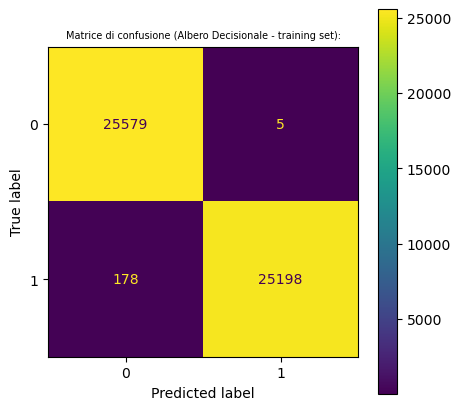

In [285]:
display_report(y_train, y_pred_train_albero, model_name + ' - training set')

In [286]:
print_classification_report(y_train, y_pred_train_albero, model_name + ' - training set')


Report di classificazione (Albero Decisionale - training set):
              precision    recall  f1-score   support

           0     0.9931    0.9998    0.9964     25584
           1     0.9998    0.9930    0.9964     25376

    accuracy                         0.9964     50960
   macro avg     0.9964    0.9964    0.9964     50960
weighted avg     0.9964    0.9964    0.9964     50960



**Risultati sul test set (Albero decisionale)**

In [287]:
y_pred_test_albero=albero.predict(X_test)
set_scores(results_test, model_name, y_test, y_pred_test_albero, stop)

In [441]:
y_predict.append(y_pred_test_albero) #per la curva di ROC

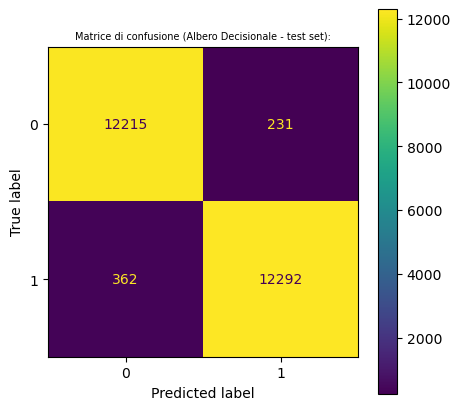

In [289]:
display_report(y_test, y_pred_test_albero,  model_name + ' - test set')

In [290]:
print_classification_report(y_test, y_pred_test_albero,  model_name + ' - test set')


Report di classificazione (Albero Decisionale - test set):
              precision    recall  f1-score   support

           0     0.9712    0.9814    0.9763     12446
           1     0.9816    0.9714    0.9764     12654

    accuracy                         0.9764     25100
   macro avg     0.9764    0.9764    0.9764     25100
weighted avg     0.9764    0.9764    0.9764     25100



#### 7.1.2 Albero decisionale (GridSearchCV)<a name="7.1.2"></a>

In [291]:
# nome modello = Albero Decisionale GSCV
# istanza modello = albero_gscv

model_name = "Albero Decisionale GSCV"
albero_gscv = DecisionTreeClassifier()

grid = {'max_features': ['sqrt', 'log2'], # il numero massimo di caratteristiche considerate per dividere un nodo, ovver sqrt e log2 del numero totale degli attributi
        'max_depth': [26, 28, 30], # la profondità massima dell'albero
        'min_samples_split': [2, 4, 5], # il numero minimo di campioni necessari per dividere un nodo interno
        'min_samples_leaf': [2, 3, 5], # il numero minimo di campioni necessari per essere in un nodo foglia
        'criterion':['gini','entropy'], # la funzione per misurare la qualità di una divisione
        'splitter':['best','random'], # la strategia utilizzata per scegliere la divisione a ogni nodo
       }

grid_search = GridSearchCV(
                estimator=albero_gscv,
                param_grid=grid,
                cv=5,
                scoring="recall",
                n_jobs=-1)

gscv_result = grid_search.fit(X_train, y_train)

albero_gscv = grid_search.best_estimator_

**Risultati sul training set (Albero decisionale GridSearchCV)**

In [292]:
y_pred_train_albero_gscv = albero_gscv.predict(X_train)
set_scores(results_train, model_name, y_train, y_pred_train_albero_gscv, stop)

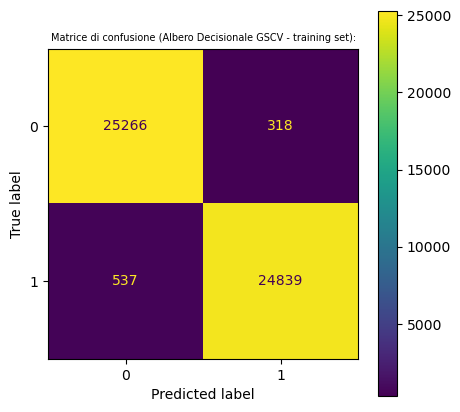

In [293]:
display_report(y_train, y_pred_train_albero_gscv, model_name + ' - training set')

In [294]:
print_classification_report(y_train, y_pred_train_albero_gscv, model_name + ' - training set')


Report di classificazione (Albero Decisionale GSCV - training set):
              precision    recall  f1-score   support

           0     0.9792    0.9876    0.9834     25584
           1     0.9874    0.9788    0.9831     25376

    accuracy                         0.9832     50960
   macro avg     0.9833    0.9832    0.9832     50960
weighted avg     0.9833    0.9832    0.9832     50960



**Risultati sul test set (Albero decisionale GridSearchCV)**

In [295]:
y_pred_test_albero_gscv = albero_gscv.predict(X_test)
set_scores(results_test, model_name, y_test, y_pred_test_albero_gscv, stop)

In [443]:
y_predict.append(y_pred_test_albero_gscv) #per la curva di ROC

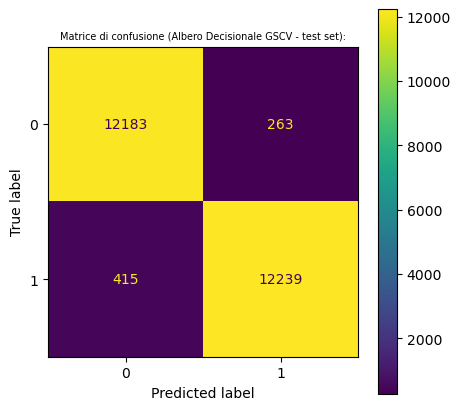

In [297]:
display_report(y_test, y_pred_test_albero_gscv, model_name + ' - test set')

In [298]:
print_classification_report(y_test, y_pred_test_albero_gscv, model_name + ' - test set')


Report di classificazione (Albero Decisionale GSCV - test set):
              precision    recall  f1-score   support

           0     0.9671    0.9789    0.9729     12446
           1     0.9790    0.9672    0.9730     12654

    accuracy                         0.9730     25100
   macro avg     0.9730    0.9730    0.9730     25100
weighted avg     0.9731    0.9730    0.9730     25100



#### 7.1.3 KNN<a name="7.1.3"></a>

Il **K-Nearest Neighbors (KNN)** classifica ogni nuovo esempio di acqua esaminando i 'K' esempi più vicini nel dataset di addestramento, dove 'K' è un numero intero positivo. La "vicinanza" è di solito calcolata utilizzando una metrica di distanza, ad esempio la distanza Euclidea o la distanza di Manhattan. La classe (buona o non buona) di un nuovo esempio è determinata dalla maggioranza delle classi dei suoi vicini più prossimi.

In [299]:
# nome modello = KNN
# istanza modello = knn

model_name = "KNN"
start = time.time()
knn = KNeighborsClassifier(n_neighbors=5, p=2)
knn = knn.fit(X_train,y_train)
stop = time.time()-start

**Risultati sul training set (KNN)**

In [300]:
y_pred_train_knn = knn.predict(X_train)
set_scores(results_train, model_name, y_train, y_pred_train_knn, stop)

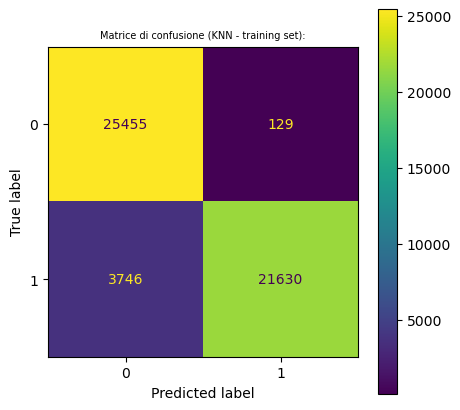

In [301]:
display_report(y_train, y_pred_train_knn, model_name + ' - training set')

In [302]:
print_classification_report(y_train, y_pred_train_knn, model_name + ' - training set')


Report di classificazione (KNN - training set):
              precision    recall  f1-score   support

           0     0.8717    0.9950    0.9293     25584
           1     0.9941    0.8524    0.9178     25376

    accuracy                         0.9240     50960
   macro avg     0.9329    0.9237    0.9235     50960
weighted avg     0.9326    0.9240    0.9236     50960



**Risultati sul test set (KNN)**

In [303]:
y_pred_test_knn = knn.predict(X_test)
set_scores(results_test, model_name, y_test, y_pred_test_knn, stop)

In [445]:
y_predict.append(y_pred_test_knn) #per la curva di ROC

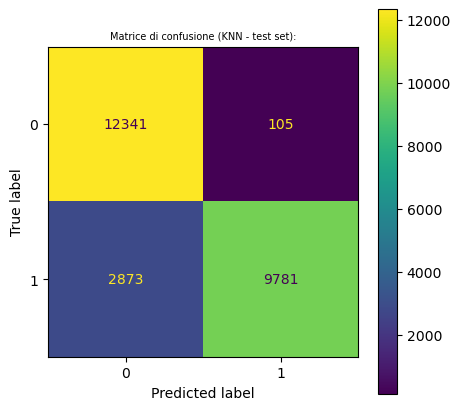

In [305]:
display_report(y_test, y_pred_test_knn, model_name + ' - test set')

In [306]:
print_classification_report(y_test, y_pred_test_knn, model_name + ' - test set')


Report di classificazione (KNN - test set):
              precision    recall  f1-score   support

           0     0.8112    0.9916    0.8923     12446
           1     0.9894    0.7730    0.8679     12654

    accuracy                         0.8814     25100
   macro avg     0.9003    0.8823    0.8801     25100
weighted avg     0.9010    0.8814    0.8800     25100



#### 7.1.4 KNN (GridSearchCV)<a name="7.1.4"></a>

In [307]:
# nome modello = KNN GSCV
# istanza modello = knn_gscv

model_name = "KNN GSCV"
knn_gscv = KNeighborsClassifier()
k_neighbors = list(range(3, 7))
k_leaf = list(range(15, 25))

grid = {"n_neighbors":k_neighbors,
        "leaf_size":k_leaf        
}

grid_search = GridSearchCV(
                estimator=knn_gscv,
                param_grid=grid,
                cv=5, 
                scoring="recall",
                n_jobs=-1
    )
grid_result = grid_search.fit(X_train, y_train)

knn_gscv = grid_search.best_estimator_

**Risultati sul training set (KNN GridSearchCV)**

In [308]:
y_pred_train_knn_gscv = knn_gscv.predict(X_train)
set_scores(results_train, model_name, y_train, y_pred_train_knn_gscv, stop)

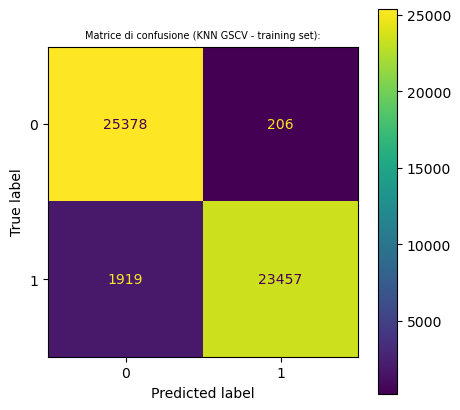

In [309]:
display_report(y_train, y_pred_train_knn_gscv, model_name + ' - training set')

In [310]:
print_classification_report(y_train, y_pred_train_knn_gscv,  model_name + ' - train set')


Report di classificazione (KNN GSCV - train set):
              precision    recall  f1-score   support

           0     0.9297    0.9919    0.9598     25584
           1     0.9913    0.9244    0.9567     25376

    accuracy                         0.9583     50960
   macro avg     0.9605    0.9582    0.9582     50960
weighted avg     0.9604    0.9583    0.9582     50960



**Risultati sul test set (KNN GridSearchCV)**

In [311]:
y_pred_test_knn_gscv = knn_gscv.predict(X_test)
set_scores(results_test, model_name, y_test, y_pred_test_knn_gscv, stop)

In [446]:
y_predict.append(y_pred_test_knn_gscv) #per la curva di ROC

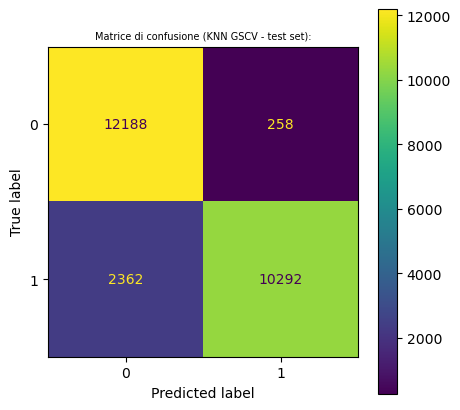

In [313]:
display_report(y_test, y_pred_test_knn_gscv, model_name + ' - test set')

In [314]:
print_classification_report(y_test, y_pred_test_knn_gscv,  model_name + ' - test set')


Report di classificazione (KNN GSCV - test set):
              precision    recall  f1-score   support

           0     0.8377    0.9793    0.9029     12446
           1     0.9755    0.8133    0.8871     12654

    accuracy                         0.8956     25100
   macro avg     0.9066    0.8963    0.8950     25100
weighted avg     0.9072    0.8956    0.8950     25100



#### 7.1.5 SVM<a name="7.1.5"></a>

In [315]:
# nome modello = SVM
# istanza modello = svm

model_name = "SVM"
start = time.time()
svm = SVC()
svm.fit(X_train, y_train)
stop = time.time()-start

**Risultati sul training set (SVM)**

In [316]:
y_pred_train_svm = svm.predict(X_train)
set_scores(results_train, model_name, y_train, y_pred_train_svm, stop)

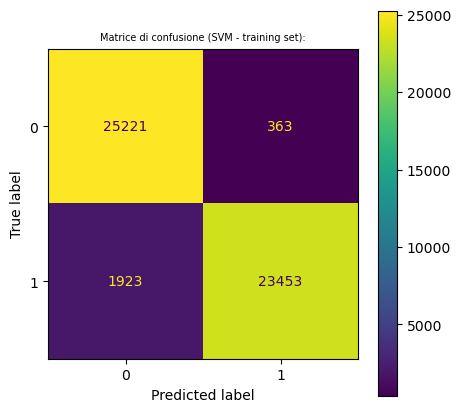

In [317]:
display_report(y_train, y_pred_train_svm, model_name + ' - training set')

In [318]:
print_classification_report(y_train, y_pred_train_svm,  model_name + ' - training set')


Report di classificazione (SVM - training set):
              precision    recall  f1-score   support

           0     0.9292    0.9858    0.9566     25584
           1     0.9848    0.9242    0.9535     25376

    accuracy                         0.9551     50960
   macro avg     0.9570    0.9550    0.9551     50960
weighted avg     0.9568    0.9551    0.9551     50960



**Risultati sul test set (SVM)**

In [319]:
y_pred_test_svm = svm.predict(X_test)
set_scores(results_test, model_name, y_train, y_pred_train_svm, stop)

In [448]:
y_predict.append(y_pred_test_svm) #per la curva di ROC

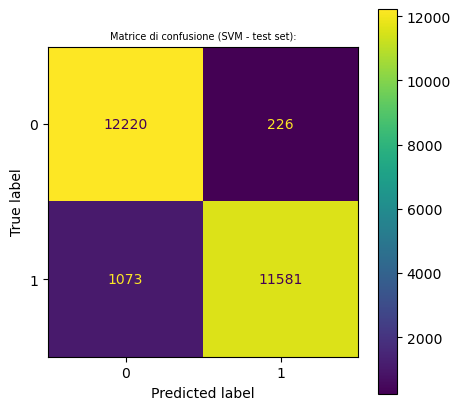

In [321]:
display_report(y_test, y_pred_test_svm, model_name + ' - test set')

In [322]:
print_classification_report(y_test, y_pred_test_svm,  model_name + ' - test set')


Report di classificazione (SVM - test set):
              precision    recall  f1-score   support

           0     0.9193    0.9818    0.9495     12446
           1     0.9809    0.9152    0.9469     12654

    accuracy                         0.9482     25100
   macro avg     0.9501    0.9485    0.9482     25100
weighted avg     0.9503    0.9482    0.9482     25100



Non è stata presa in considerazione la **versione GridSearchCV di SVM** in quanto da alcuni test è risultato uno sforzo computazionale abbastanza elevato.

#### 7.1.6 Naive bayes<a name="7.1.6"></a>

Naive Bayes è un algoritmo di classificazione basato sul **teorema di Bayes**, con l'assunzione "naive" (ingenua) di indipendenza condizionale tra le caratteristiche di un dataset. Nonostante questa semplificazione, Naive Bayes si è dimostrato efficace in molte situazioni pratiche, specialmente in compiti di **classificazione**.

In [323]:
# nome modello = Naive Bayes
# istanza modello = nb
model_name = "Naive Bayes"
start = time.time()
nb = GaussianNB()
nb = nb.fit(X_train, y_train)
stop = time.time()-start

**Risultati sul training set (Naive Bayes)**

In [324]:
y_pred_train_nb = nb.predict(X_train)
set_scores(results_train, model_name, y_train, y_pred_train_nb, stop)

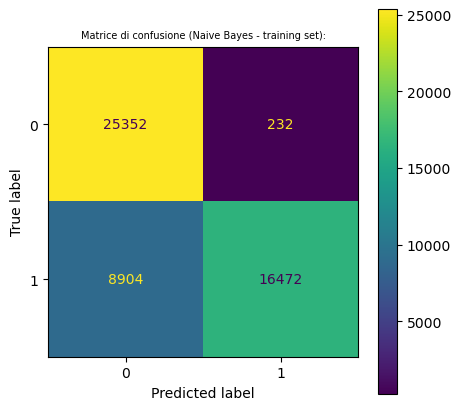

In [325]:
display_report(y_train, y_pred_train_nb, model_name + ' - training set')

In [326]:
print_classification_report(y_train, y_pred_train_nb, model_name + ' - training set')


Report di classificazione (Naive Bayes - training set):
              precision    recall  f1-score   support

           0     0.7401    0.9909    0.8473     25584
           1     0.9861    0.6491    0.7829     25376

    accuracy                         0.8207     50960
   macro avg     0.8631    0.8200    0.8151     50960
weighted avg     0.8626    0.8207    0.8152     50960



**Risultati sul test set (Naive Bayes)**

In [327]:
y_pred_test_nb = nb.predict(X_test)
set_scores(results_test, model_name, y_test, y_pred_test_nb, stop)

In [449]:
y_predict.append(y_pred_test_nb) #per la curva di ROC

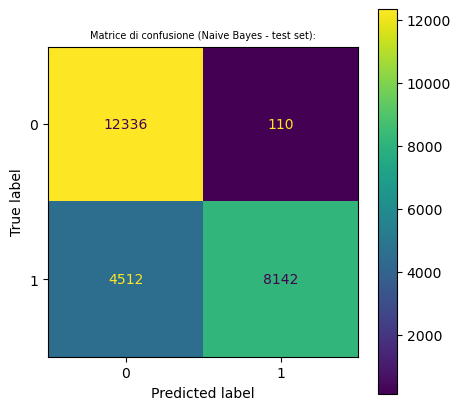

In [329]:
display_report(y_test, y_pred_test_nb,  model_name + ' - test set')

In [330]:
print_classification_report(y_test, y_pred_test_nb,  model_name + ' - test set')


Report di classificazione (Naive Bayes - test set):
              precision    recall  f1-score   support

           0     0.7322    0.9912    0.8422     12446
           1     0.9867    0.6434    0.7789     12654

    accuracy                         0.8159     25100
   macro avg     0.8594    0.8173    0.8106     25100
weighted avg     0.8605    0.8159    0.8103     25100



#### 7.1.7 Naive bayes (GridSearchCV)<a name="7.1.7"></a>

In [331]:
# nome modello = Naive bayes
# istanza modello = nb_gscv

model_name = "Naive Bayes GSCV"
nb_gscv = GaussianNB()

grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}

grid_search = GridSearchCV(
    estimator=nb_gscv, 
    param_grid=grid, 
    cv=10, 
    scoring='recall', 
    n_jobs=-1)

grid_search.fit(X_train, y_train)

nb_gscv = grid_search.best_estimator_

**Risultati sul training set (Naive Bayes GridSearchCV)**

In [332]:
y_pred_train_nb_gscv = nb_gscv.predict(X_train)
set_scores(results_train, model_name, y_train, y_pred_train_nb_gscv, stop)

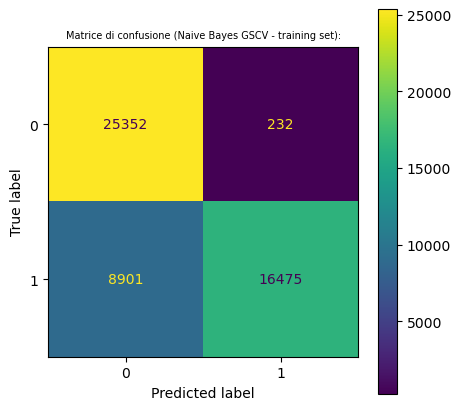

In [333]:
display_report(y_train, y_pred_train_nb_gscv, model_name + ' - training set')

In [334]:
print_classification_report(y_train, y_pred_train_nb_gscv, model_name + ' - training set')


Report di classificazione (Naive Bayes GSCV - training set):
              precision    recall  f1-score   support

           0     0.7401    0.9909    0.8474     25584
           1     0.9861    0.6492    0.7830     25376

    accuracy                         0.8208     50960
   macro avg     0.8631    0.8201    0.8152     50960
weighted avg     0.8626    0.8208    0.8153     50960



**Risultati sul test set (Naive Bayes GridSearchCV)**

In [335]:
y_pred_test_nb_gscv = nb_gscv.predict(X_test)
set_scores(results_test, model_name, y_test, y_pred_test_nb_gscv, stop)

In [450]:
y_predict.append(y_pred_test_nb_gscv) #per la curva di ROC

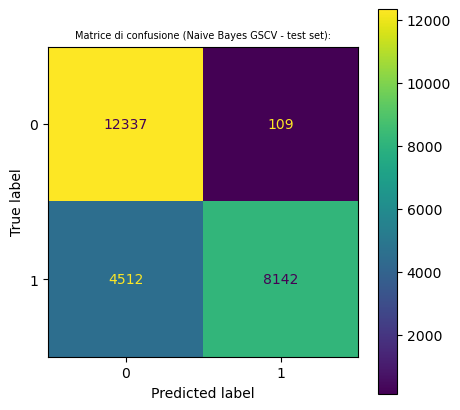

In [337]:
display_report(y_test, y_pred_test_nb_gscv,  model_name + ' - test set')

In [338]:
print_classification_report(y_test, y_pred_test_nb_gscv,  model_name + ' - test set')


Report di classificazione (Naive Bayes GSCV - test set):
              precision    recall  f1-score   support

           0     0.7322    0.9912    0.8423     12446
           1     0.9868    0.6434    0.7790     12654

    accuracy                         0.8159     25100
   macro avg     0.8595    0.8173    0.8106     25100
weighted avg     0.8606    0.8159    0.8103     25100



**NOTA: Considerando la forte presenza di Falsi Negativi, indubbiamente la metrica Recall per questo classificatore risulta abbastanza bassa.**

#### 7.1.8 Regressione logistica<a name="7.1.8"></a>

Algoritmo di classificazione utilizzato per prevedere l'appartenenza di un'istanza a una classe binaria, basandosi su una o più variabili indipendenti.

La regressione logistica modella la **probabilità che l'istanza osservata appartenga a una delle due classi**. Questo viene fatto attraverso la funzione logistica (o sigmoide), che mappa qualsiasi valore reale a un valore tra 0 e 1, interpretato come la probabilità che l'istanza appartenga alla classe positiva. La decisione su quale classe assegnare viene poi presa sulla base di una **soglia di probabilità**, comunemente impostata a 0.5.

In [339]:
# nome modello = Regressione Logistica
# istanza modello = logreg

model_name = "Regressione Logistica"
start= time.time()
logreg = LogisticRegression(random_state=42,max_iter=10000) #aumento iterazioni per la convergenza dell'algoritmo
logreg = logreg.fit(X_train, y_train)
stop= time.time()-start

**Risultati sul training set (Regressione logistica)**

In [340]:
y_pred_train_logreg = logreg.predict(X_train)
set_scores(results_train, model_name, y_train, y_pred_train_logreg, stop)

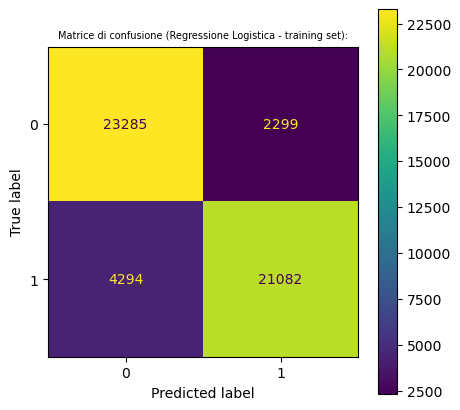

In [341]:
display_report(y_train, y_pred_train_logreg, model_name + ' - training set')

In [342]:
print_classification_report(y_train, y_pred_train_logreg, model_name + ' - training set')


Report di classificazione (Regressione Logistica - training set):
              precision    recall  f1-score   support

           0     0.8443    0.9101    0.8760     25584
           1     0.9017    0.8308    0.8648     25376

    accuracy                         0.8706     50960
   macro avg     0.8730    0.8705    0.8704     50960
weighted avg     0.8729    0.8706    0.8704     50960



**Risultati sul test set (Regressione logistica)**

In [343]:
y_pred_test_logreg = logreg.predict(X_test)
set_scores(results_test, model_name, y_test, y_pred_test_logreg, stop)

In [452]:
y_predict.append(y_pred_test_logreg) #per la curva di ROC

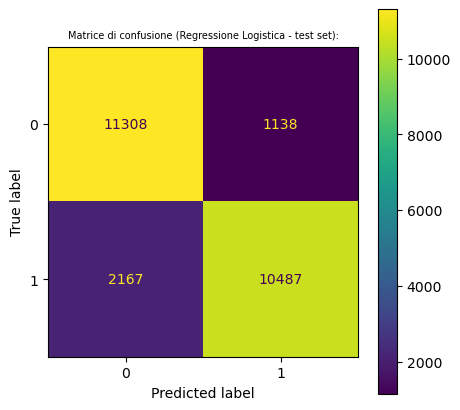

In [345]:
display_report(y_test, y_pred_test_logreg,  model_name + ' - test set')

In [346]:
print_classification_report(y_test, y_pred_test_logreg,  model_name + ' - test set')


Report di classificazione (Regressione Logistica - test set):
              precision    recall  f1-score   support

           0     0.8392    0.9086    0.8725     12446
           1     0.9021    0.8287    0.8639     12654

    accuracy                         0.8683     25100
   macro avg     0.8706    0.8687    0.8682     25100
weighted avg     0.8709    0.8683    0.8681     25100



#### 7.1.9 Regressione logistica (GridSearchCV)<a name="7.1.9"></a>

In [347]:
# nome modello = Regressione logistica GSCV
# istanza modello = logreg_gscv

model_name = "Regressione Logistica GSCV"
logreg_gscv = LogisticRegression(random_state=42,max_iter=5000)

solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

grid = {"C":c_values,
        "solver":['newton-cg', 'lbfgs', 'liblinear'],
        "penalty":penalty}
        

grid_search = GridSearchCV(
                estimator=logreg_gscv,
                param_grid=grid,
                cv=5, 
                scoring="recall",
                n_jobs=-1
    )
grid_result = grid_search.fit(X_train, y_train)

logreg_gscv = grid_search.best_estimator_

**Risultati sul training set (Regressione logistica GridSearchCV)**

In [348]:
y_pred_train_logreg_gscv = logreg_gscv.predict(X_train)
set_scores(results_train, model_name, y_train, y_pred_train_logreg_gscv, stop)

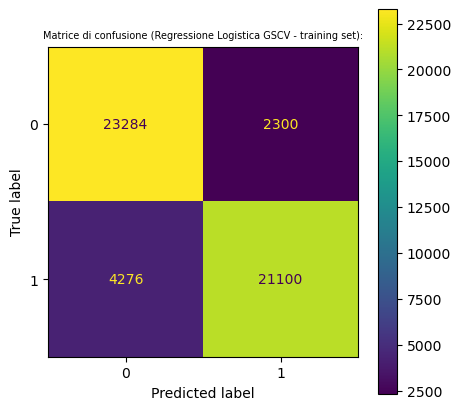

In [349]:
display_report(y_train, y_pred_train_logreg_gscv, model_name + ' - training set')

In [350]:
print_classification_report(y_train, y_pred_train_logreg_gscv, model_name + ' - training set')


Report di classificazione (Regressione Logistica GSCV - training set):
              precision    recall  f1-score   support

           0     0.8448    0.9101    0.8763     25584
           1     0.9017    0.8315    0.8652     25376

    accuracy                         0.8710     50960
   macro avg     0.8733    0.8708    0.8707     50960
weighted avg     0.8732    0.8710    0.8707     50960



**Risultati sul test set (Regressione logistica GridSearchCV)**

In [351]:
y_pred_test_logreg_gscv = logreg_gscv.predict(X_test)
set_scores(results_test, model_name, y_test, y_pred_test_logreg_gscv, stop)

In [453]:
y_predict.append(y_pred_test_logreg_gscv) #per la curva di ROC

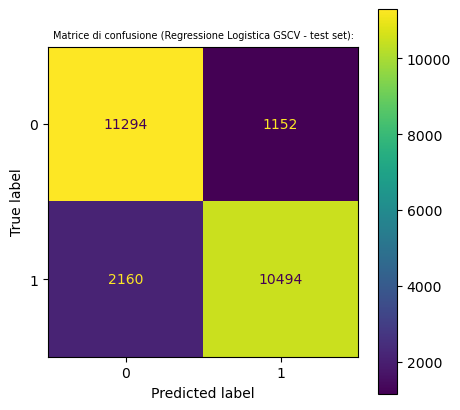

In [353]:
display_report(y_test, y_pred_test_logreg_gscv, model_name + ' - test set')

In [354]:
print_classification_report(y_test, y_pred_test_logreg_gscv, model_name + ' - test set')


Report di classificazione (Regressione Logistica GSCV - test set):
              precision    recall  f1-score   support

           0     0.8395    0.9074    0.8721     12446
           1     0.9011    0.8293    0.8637     12654

    accuracy                         0.8680     25100
   macro avg     0.8703    0.8684    0.8679     25100
weighted avg     0.8705    0.8680    0.8679     25100



#### 7.1.10 SGD<a name="7.1.10"></a>

Stochastic Gradient Descent (SGD) è un metodo di ottimizzazione molto efficace e diffuso per l'addestramento di modelli di apprendimento automatico, in particolare per problemi di classificazione. A differenza del tradizionale metodo di discesa del gradiente, che calcola il gradiente della funzione di costo su tutto il dataset per aggiornare i parametri del modello, SGD aggiorna i parametri utilizzando il gradiente basato su un solo esempio o un piccolo batch di esempi alla volta. Questo approccio lo rende significativamente più efficiente in termini di memoria e più veloce per dataset di grandi dimensioni o per problemi di ottimizzazione online.

In [355]:
# nome modello = SGD
# istanza modello = sgd

model_name = "SGD"
start = time.time()
sgd = SGDClassifier(max_iter=5000, random_state=42)
sgd = sgd.fit(X_train,y_train)
stop = time.time()-start

**Risultati sul training set (SGD)**

In [356]:
y_pred_train_sgd = sgd.predict(X_train)
set_scores(results_train, model_name, y_train, y_pred_train_sgd, stop)

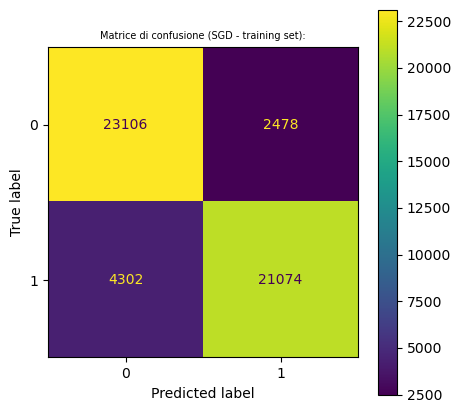

In [357]:
display_report(y_train, y_pred_train_sgd, model_name + ' - training set')

In [358]:
print_classification_report(y_train, y_pred_train_sgd, model_name + ' - training set')


Report di classificazione (SGD - training set):
              precision    recall  f1-score   support

           0     0.8430    0.9031    0.8721     25584
           1     0.8948    0.8305    0.8614     25376

    accuracy                         0.8670     50960
   macro avg     0.8689    0.8668    0.8667     50960
weighted avg     0.8688    0.8670    0.8668     50960



**Risultati sul test set (SGD)**

In [359]:
y_pred_test_sgd = sgd.predict(X_test)
set_scores(results_test, model_name, y_test, y_pred_test_sgd, stop)

In [455]:
y_predict.append(y_pred_test_sgd) #per la curva di ROC

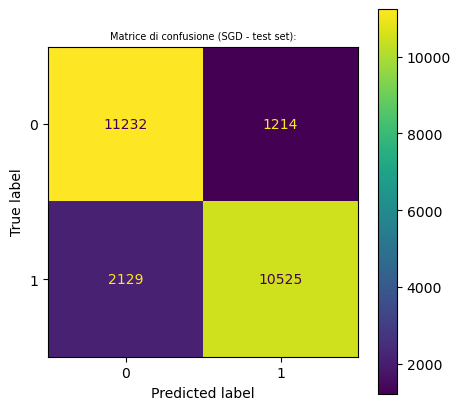

In [361]:
display_report(y_test, y_pred_test_sgd,  model_name + ' - test set')

In [362]:
print_classification_report(y_test, y_pred_test_sgd,  model_name + ' - test set')


Report di classificazione (SGD - test set):
              precision    recall  f1-score   support

           0     0.8407    0.9025    0.8705     12446
           1     0.8966    0.8318    0.8630     12654

    accuracy                         0.8668     25100
   macro avg     0.8686    0.8671    0.8667     25100
weighted avg     0.8689    0.8668    0.8667     25100



#### 7.1.11 SGD (GridSearchCV)<a name="7.1.11"></a>

In [363]:
# nome modello = SGD GSCV
# istanza modello = sgd_gscv

model_name = "SGD GSCV"
sgd_sgcv = SGDClassifier()

grid = {
        "alpha" : [0.001, 0.01, 0.1],
        "penalty" : ["l2", "l1", "elasticnet"],
    }
   
    
grid_search = GridSearchCV(
                estimator=sgd_sgcv,
                param_grid=grid,
                cv=5,
                scoring="recall",
                n_jobs=-1
    )
grid_result = grid_search.fit(X_train, y_train)

sgd_sgcv = grid_search.best_estimator_

**Risultati sul training set (SGD SearchGridCV)**

In [364]:
y_pred_train_sgd_sgcv = sgd_sgcv.predict(X_train)
set_scores(results_train, model_name, y_train, y_pred_train_sgd_sgcv, stop)

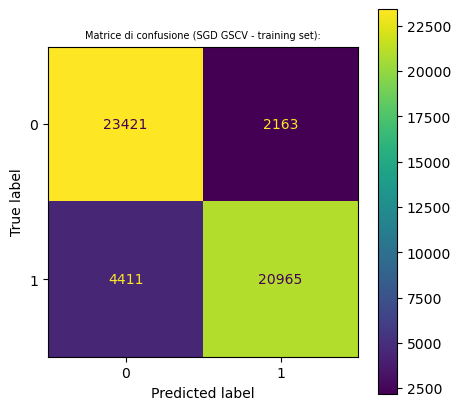

In [365]:
display_report(y_train, y_pred_train_sgd_sgcv, model_name + ' - training set')

In [366]:
print_classification_report(y_train, y_pred_train_sgd_sgcv, model_name + ' - training set')


Report di classificazione (SGD GSCV - training set):
              precision    recall  f1-score   support

           0     0.8415    0.9155    0.8769     25584
           1     0.9065    0.8262    0.8645     25376

    accuracy                         0.8710     50960
   macro avg     0.8740    0.8708    0.8707     50960
weighted avg     0.8739    0.8710    0.8707     50960



**Risultati sul test set (SGD SearchGridCV)**

In [367]:
y_pred_test_sgd_sgcv = sgd_sgcv.predict(X_test)
set_scores(results_test, model_name, y_test, y_pred_test_sgd_sgcv, stop)

In [456]:
y_predict.append(y_pred_test_sgd_sgcv) #per la curva di ROC

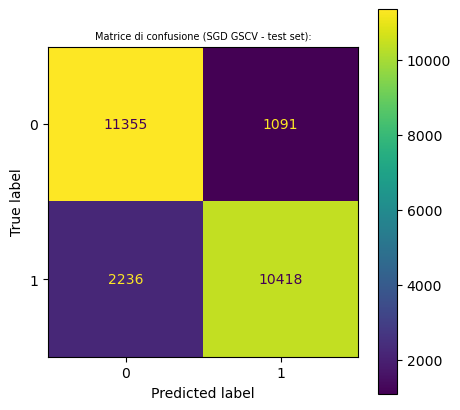

In [369]:
display_report(y_test, y_pred_test_sgd_sgcv, model_name + ' - test set')

In [370]:
print_classification_report(y_test, y_pred_test_sgd_sgcv, model_name + ' - test set')


Report di classificazione (SGD GSCV - test set):
              precision    recall  f1-score   support

           0     0.8355    0.9123    0.8722     12446
           1     0.9052    0.8233    0.8623     12654

    accuracy                         0.8675     25100
   macro avg     0.8703    0.8678    0.8673     25100
weighted avg     0.8706    0.8675    0.8672     25100



#### 7.1.12 Cross validation<a name="7.1.12"></a>

La cross-validation (validazione incrociata) è una tecnica utilizzata per valutare l'abilità di **generalizzazione di un modello di data mining** su un set di dati indipendente, assicurando che il modello sia robusto e performante su dati non visti durante l'addestramento. Il dataset viene suddiviso in parti (o _fold_) più piccole che vengono utilizzate alternativamente per l'addestramento e la validazione.

La metodologia più comune è la **k-fold cross-validation**:
- Il training set viene diviso in un **numero predefinito k di parti o "fold"** di dimensioni uguali;
- Per ogni iterazione della cross-validation **viene selezionato uno dei k fold come test di validazione del modello addestrato sui restanti k-1 fold**. A questo punto si memorizzano le performance del modello relative all'iterazione corrente;
- Il numero di iterazioni totali è pari a k;
- Al termine delle k iterazioni si calcola la **media delle performance registrate in ogni iterazione** per fornire una stima complessiva della performance del modello.

Validando il modello su diverse porzioni dei dati di training, si può stimare meglio come il modello si comporterà su dati non visti.

In [267]:
def cross_validation_performance(csv, model_name, model, X, y, k):
    """
    Calcola le performance tramite cross-validation e registra i risultati in un DataFrame.

    Parametri:
    - model_name: string, il nome del classificatore.
    - model: oggetto classificatore da valutare.
    - X: array-like o DataFrame, le caratteristiche/features del dataset.
    - y: array-like, le etichette/target del dataset.
    - k: fold della cross validation.
    - df: DataFrame, il DataFrame dove registrare i risultati della cross validation.
    """
    
    df = pd.read_csv(csv, index_col=0)
    # Inizia a misurare il tempo
    start_time = time.time()
    
    # Calcolo delle metriche di performance
    accuracy = cross_val_score(model, X, y, cv=k, scoring="accuracy").mean()
    error = (1 - accuracy)
    precision = cross_val_score(model, X, y, cv=k, scoring="average_precision").mean()
    recall = cross_val_score(model, X, y, cv=k, scoring="recall_micro").mean()
    f_score = cross_val_score(model, X, y, cv=k, scoring="f1_micro").mean()
    
    # Fine misurazione del tempo
    end_time = time.time()
    # Calcola il tempo impiegato
    elapsed_time = end_time - start_time
    
    df.loc[model_name, "Accuracy"] = accuracy
    df.loc[model_name, "ErrorRate"] = error
    df.loc[model_name, "Precision"] = precision
    df.loc[model_name, "Recall"] = recall
    df.loc[model_name, "F-score"] = f_score
    df.loc[model_name, "Time"] = elapsed_time
    df.loc[model_name, "Data esecuzione"] = datetime.datetime.now()
    
    df.to_csv(csv, index=True)

In [268]:
k = 10 # fold della cross validation

models = {
    'Albero Decisionale': albero,
    'KNN': knn,
    'SVM': svm,
    'Naive Bayes': nb,
    'Regressione Logistica': logreg,
    'SGD': sgd
}

for model_name, model in models.items():
    cross_validation_performance(results_cv, model_name, model, X_train, y_train, k)


KeyboardInterrupt



**Nota: Applicando la Cross-Validation è possibile notare grandi miglioramenti soprattutto per la metrica Recall del classificatore Naive Bayes.**

### 7.2 Classificatori ensemble<a name="7.2"></a>

Proseguendo, l'attenzione si sposterà sui **classificatori ensemble**, noti per la loro capacità di migliorare significativamente la performance di classificazione aggregando i risultati di più modelli di base. Questi metodi sono particolarmente efficaci nel ridurre l'overfitting e aumentare la robustezza delle previsioni, sfruttando la diversità tra i modelli componenti per ottenere previsioni complessive più accurate.

#### 7.2.1 Bagging<a name="7.2.1"></a>

La tecnica del **Bootstrap Aggregating** coinvolge la costruzione di più modelli indipendenti (solitamente dello stesso tipo, come alberi decisionali) su sottoinsiemi diversi dei dati di addestramento e poi aggrega le loro previsioni.

**Random Forest**

Random Forest è un esempio di classificatore ensemble di questo tipo. Esso estende il concetto di bagging e lo applica specificamente agli alberi decisionali. Oltre a utilizzare il campionamento bootstrap per **creare diversi sottoinsiemi di dati** per addestrare ogni albero, Random Forest introduce ulteriore casualità durante la costruzione degli alberi **selezionando casualmente un sottoinsieme delle caratteristiche (feature)** al momento di dividere ogni nodo.

In [371]:
# nome modello = Random forest
# istanza modello = rf

model_name = "Random Forest"
start = time.time()
rf = RandomForestClassifier(random_state=42, max_depth=15)
rf = rf.fit(X_train,y_train)
stop = time.time()-start

**Risultati sul training set (Random forest)**

In [372]:
y_pred_train_rf = rf.predict(X_train)
set_scores(results_train, model_name, y_train, y_pred_train_rf, stop)

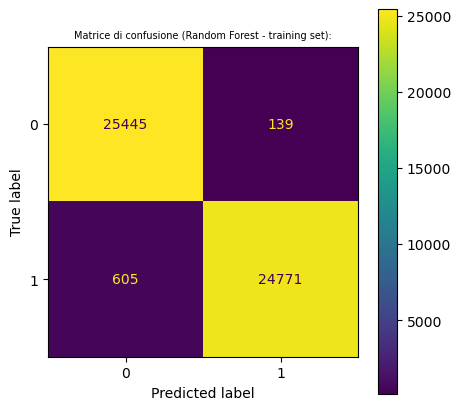

In [373]:
display_report(y_train, y_pred_train_rf, model_name + ' - training set')

In [374]:
print_classification_report(y_train, y_pred_train_rf, model_name + ' - training set')


Report di classificazione (Random Forest - training set):
              precision    recall  f1-score   support

           0     0.9768    0.9946    0.9856     25584
           1     0.9944    0.9762    0.9852     25376

    accuracy                         0.9854     50960
   macro avg     0.9856    0.9854    0.9854     50960
weighted avg     0.9856    0.9854    0.9854     50960



**Risultati sul test set (Random forest)**

In [375]:
y_pred_test_rf = rf.predict(X_test)
set_scores(results_test, model_name, y_test, y_pred_test_rf, stop)

In [468]:
y_predict.append(y_pred_test_rf) #per la curva di ROC

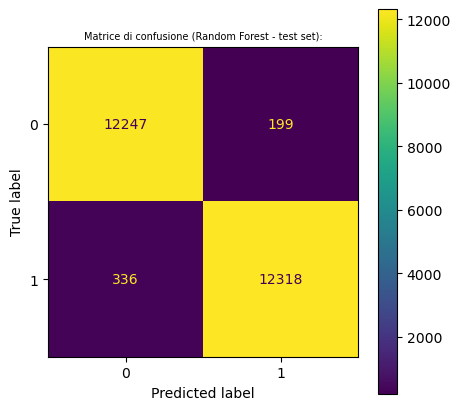

In [377]:
display_report(y_test, y_pred_test_rf, model_name + ' - test set')

In [378]:
print_classification_report(y_test, y_pred_test_rf, model_name + ' - test set')


Report di classificazione (Random Forest - test set):
              precision    recall  f1-score   support

           0     0.9733    0.9840    0.9786     12446
           1     0.9841    0.9734    0.9787     12654

    accuracy                         0.9787     25100
   macro avg     0.9787    0.9787    0.9787     25100
weighted avg     0.9787    0.9787    0.9787     25100



#### 7.2.2 Boosting<a name="7.2.2"></a>

Il boosting consente di **combinare più modelli deboli** per realizzare un modello forte e accurato dopo varie iterazioni. I modelli deboli sono quelli che hanno una capacità predittiva leggermente superiore a quella di una predizione casuale. Quindi, sono previste **più iterazioni** e in ognuna di esse viene applicato un modello debole, il quale cerca di correggere gli errori commessi dai modelli precedenti. Questo viene tipicamente realizzato dando più peso agli esempi che sono stati classificati erroneamente, incentivando così il nuovo modello a focalizzarsi su di essi durante il training.

Tra i vari classificatori ensemble che fanno parte di questa categoria, vedremo l'applicazione di:
- AdaBoost
- XGBoost

**AdaBoost**

Adaptive Boosting si adatta agli errori incrementando iterativamente i pesi degli esempi mal classificati, permettendo ai modelli successivi di concentrarsi maggiormente su di essi. Se non viene specificato un classificatore base, il classificatore AdaBoost di default utilizza un albero decisionale.

In [379]:
# nome modello = AdaBoost
# istanza modello = adaBoost

model_name = "AdaBoost"
start = time.time()
adaBoost = AdaBoostClassifier(random_state=42)
adaBoost.fit(X_train, y_train)
stop = time.time()-start

**Risultati training set (AdaBoost)**

In [380]:
y_pred_train_adaBoost = adaBoost.predict(X_train)
set_scores(results_train, model_name, y_train, y_pred_train_adaBoost, stop)

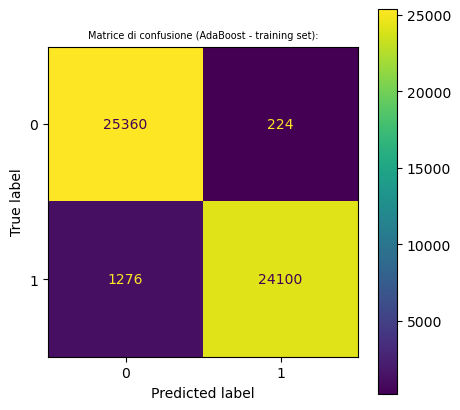

In [381]:
display_report(y_train, y_pred_train_adaBoost, model_name + ' - training set')

In [382]:
print_classification_report(y_train, y_pred_train_adaBoost, model_name + ' - training set')


Report di classificazione (AdaBoost - training set):
              precision    recall  f1-score   support

           0     0.9521    0.9912    0.9713     25584
           1     0.9908    0.9497    0.9698     25376

    accuracy                         0.9706     50960
   macro avg     0.9714    0.9705    0.9705     50960
weighted avg     0.9714    0.9706    0.9706     50960



**Risultati test set (AdaBoost)**

In [383]:
y_pred_test_adaBoost = adaBoost.predict(X_test)
set_scores(results_test, model_name, y_test, y_pred_test_adaBoost, stop)

In [469]:
y_predict.append(y_pred_test_adaBoost) #per la curva di ROC

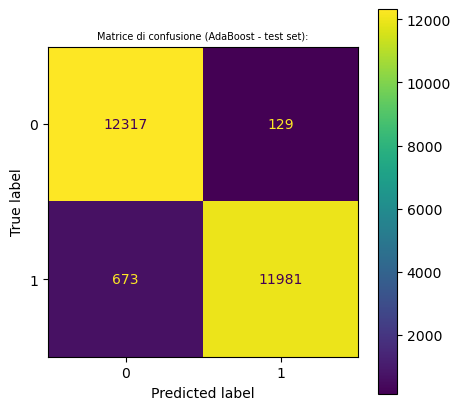

In [385]:
display_report(y_test, y_pred_test_adaBoost, model_name + ' - test set')

In [386]:
print_classification_report(y_test, y_pred_test_adaBoost, model_name + ' - test set')


Report di classificazione (AdaBoost - test set):
              precision    recall  f1-score   support

           0     0.9482    0.9896    0.9685     12446
           1     0.9893    0.9468    0.9676     12654

    accuracy                         0.9680     25100
   macro avg     0.9688    0.9682    0.9680     25100
weighted avg     0.9689    0.9680    0.9680     25100



**XGBoost**

Extreme Gradient Boosting è un'**algoritmo altamente efficiente e versatile**, progettato per ottimizzare gli algoritmi di boosting basati sui gradienti. È particolarmente noto per la sua velocità e prestazione, grazie a ottimizzazioni nell'uso della memoria e al parallelismo nella costruzione degli alberi.

In [387]:
# nome modello = XGBoost
# istanza modello = xgb

model_name = "XGBoost"
start = time.time()
xgb = XGBClassifier(random_state=42, nthread=8)
xgb.fit(X_train,y_train)
stop = time.time()-start

**Risultati training set (XGBoost)**

In [388]:
y_pred_train_xgb = xgb.predict(X_train)
set_scores(results_train, model_name, y_train, y_pred_train_xgb, stop)

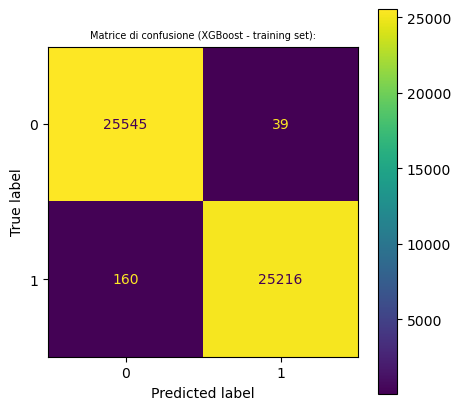

In [389]:
display_report(y_train, y_pred_train_xgb, model_name + ' - training set')

In [390]:
print_classification_report(y_train, y_pred_train_xgb, model_name + ' - training set')


Report di classificazione (XGBoost - training set):
              precision    recall  f1-score   support

           0     0.9938    0.9985    0.9961     25584
           1     0.9985    0.9937    0.9961     25376

    accuracy                         0.9961     50960
   macro avg     0.9961    0.9961    0.9961     50960
weighted avg     0.9961    0.9961    0.9961     50960



**Risultati test set (XGBoost)**

In [391]:
y_pred_test_xgb = xgb.predict(X_test)
set_scores(results_test, model_name, y_test, y_pred_test_xgb, stop)

In [470]:
y_predict.append(y_pred_test_xgb) #per la curva di ROC

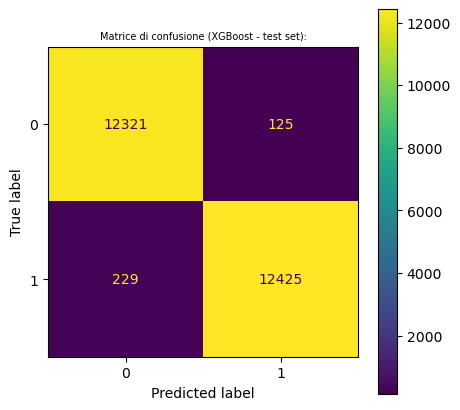

In [393]:
display_report(y_test, y_pred_test_xgb, model_name + ' - test set')

In [394]:
print_classification_report(y_test, y_pred_test_xgb, model_name + ' - test set')


Report di classificazione (XGBoost - test set):
              precision    recall  f1-score   support

           0     0.9818    0.9900    0.9858     12446
           1     0.9900    0.9819    0.9860     12654

    accuracy                         0.9859     25100
   macro avg     0.9859    0.9859    0.9859     25100
weighted avg     0.9859    0.9859    0.9859     25100



#### 7.2.3 Voting<a name="7.2.3"></a>

Questo è un tipo di classificatore ensemble che combina le previsioni provenienti da più modelli per fare una previsione finale. È un approccio di ensemble learning che aggrega i risultati di diversi classificatori base (come alberi decisionali, regolari lineari, k-nearest neighbors, etc.) e **predice l'output basandosi sulla maggioranza dei voti**.

L’idea di base per ottenere dei risultati migliori è quella di **combinare modelli che sono sufficientemente diversi tra loro** (in termini di algoritmi, iper-parametri, o subset di dati su cui sono addestrati) in modo tale da ridurre il rischio che tutti commettano gli stessi errori sulle stesse istanze, aumentando la possibilità che gli errori di un modello vengano colmati dalle previsioni corrette degli altri modelli.

Esistono principalmente due tipi di Voting: hard e soft.

**Hard Voting**

Nel **hard voting**, ogni classificatore base vota per una classe, e la classe che ottiene la maggioranza dei voti viene scelta come previsione finale. Questo metodo non considera la probabilità delle previsioni, ma solo il risultato finale del voto.

Ad esempio, supponiamo che per un particolare campione di acqua, i tre classificatori diano le seguenti previsioni sulla qualità dell'acqua:

- Albero Decisionale: Acqua Buona (1)
- Regressione Logistica: Acqua Non Buona (0)
- K-Nearest Neighbors: Acqua Buona (1)

In un approccio di Hard Voting, semplicemente contiamo i voti per ciascuna classe. "Acqua Buona" riceve due voti e "Acqua Non Buona" ne riceve uno. Quindi, la decisione finale basata su Hard Voting sarebbe che l'acqua è di buona qualità (target = 1), perché questa classe ha ottenuto la maggioranza dei voti.

In [395]:
# nome modello = Voting Hard
# istanza modello = voting

model_name = "Voting Hard"
start = time.time()
hard_voting = VotingClassifier(estimators=[('Albero Decisionale', albero),('KNN', knn),('SGD', sgd), ('Regressione logistica', logreg)], voting ='hard')
hard_voting.fit(X_train,y_train)
stop = time.time()-start

**Risultati training set (Hard voting)**

In [396]:
y_pred_train_hard_voting = hard_voting.predict(X_train)
set_scores(results_train, model_name, y_train, y_pred_train_hard_voting, stop)

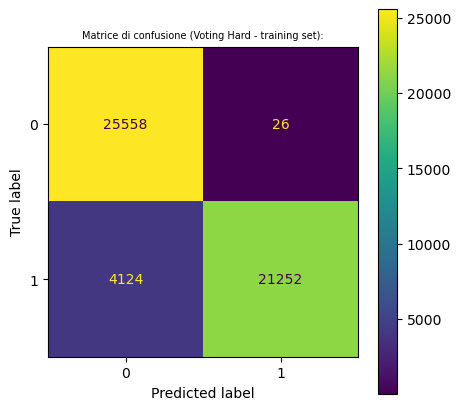

In [397]:
display_report(y_train, y_pred_train_hard_voting, model_name + ' - training set')

In [398]:
print_classification_report(y_train, y_pred_train_hard_voting, model_name + ' - training set')


Report di classificazione (Voting Hard - training set):
              precision    recall  f1-score   support

           0     0.8611    0.9990    0.9249     25584
           1     0.9988    0.8375    0.9110     25376

    accuracy                         0.9186     50960
   macro avg     0.9299    0.9182    0.9180     50960
weighted avg     0.9296    0.9186    0.9180     50960



**Risultati test set (Hard voting)**

In [399]:
y_pred_test_hard_voting = hard_voting.predict(X_test)
set_scores(results_test, model_name, y_test, y_pred_test_hard_voting, stop)

In [471]:
y_predict.append(y_pred_test_hard_voting) #per la curva di ROC

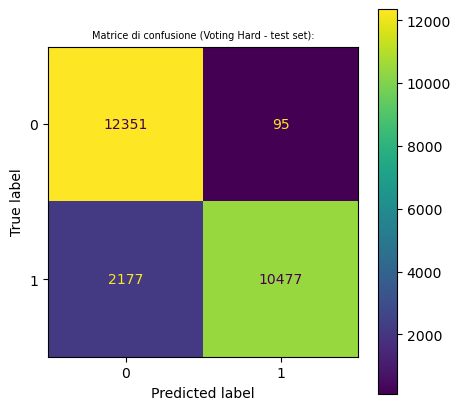

In [401]:
display_report(y_test, y_pred_test_hard_voting, model_name + ' - test set')

In [402]:
print_classification_report(y_test, y_pred_test_hard_voting, model_name + ' - test set')


Report di classificazione (Voting Hard - test set):
              precision    recall  f1-score   support

           0     0.8502    0.9924    0.9158     12446
           1     0.9910    0.8280    0.9022     12654

    accuracy                         0.9095     25100
   macro avg     0.9206    0.9102    0.9090     25100
weighted avg     0.9212    0.9095    0.9089     25100



**Soft voting**

Nel **soft voting**, si considera la probabilità delle previsioni dei classificatori base. La classe finale viene scelta basandosi sulla media delle probabilità predette per quella classe. Il soft voting spesso fornisce risultati migliori rispetto al hard voting perché tiene conto dell'incertezza delle previsioni.

Ora, supponiamo che i nostri classificatori possano anche fornire la probabilità della loro previsione. Le probabilità associate alla classe "Acqua Buona" per il campione di acqua sono:

- Albero Decisionale: 0.7 (Acqua Buona)
- Regressione Logistica: 0.4 (Acqua Buona)
- K-Nearest Neighbors: 0.6 (Acqua Buona)

Per il Soft Voting, calcoleremmo la media delle probabilità predette per la classe "Acqua Buona" e la classe "Acqua Non Buona" da ciascun classificatore. Se la media delle probabilità per "Acqua Buona" è più alta, la decisione finale sarà "Acqua Buona". In questo caso:

Media delle probabilità per "Acqua Buona": (0.7 + 0.4 + 0.6) / 3 = 0.566

In [403]:
# nome modello = Voting Soft
# istanza modello = voting

sgd = SGDClassifier(loss='log_loss')  # altrimenti non supporta il calcolo delle probabilità

model_name = "Voting Soft"
start = time.time()
soft_voting = VotingClassifier(estimators=[('Albero Decisionale', albero),('KNN', knn),('SGD', sgd), ('Regressione logistica', logreg)], voting ='soft')
soft_voting.fit(X_train,y_train)
stop = time.time()-start

**Risultati training set (Soft voting)**

In [404]:
y_pred_train_soft_voting = soft_voting.predict(X_train)
set_scores(results_train, model_name, y_train, y_pred_train_soft_voting, stop)

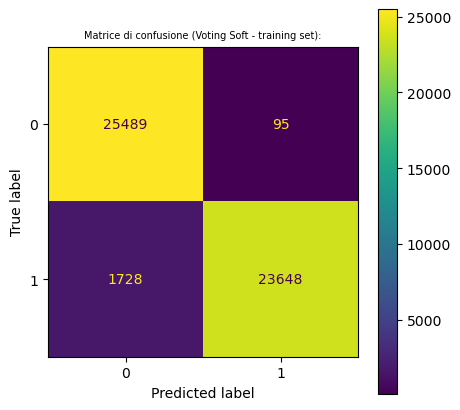

In [405]:
display_report(y_train, y_pred_train_soft_voting, model_name + ' - training set')

In [406]:
print_classification_report(y_train, y_pred_train_soft_voting, model_name + ' - training set')


Report di classificazione (Voting Soft - training set):
              precision    recall  f1-score   support

           0     0.9365    0.9963    0.9655     25584
           1     0.9960    0.9319    0.9629     25376

    accuracy                         0.9642     50960
   macro avg     0.9663    0.9641    0.9642     50960
weighted avg     0.9661    0.9642    0.9642     50960



**Risultati test set (Voting Soft)**

In [476]:
y_pred_test_soft_voting = soft_voting.predict(X_test)
set_scores(results_test, model_name, y_test, y_pred_test_soft_voting, stop)

In [472]:
y_predict.append(y_pred_test_soft_voting) #per la curva di ROC

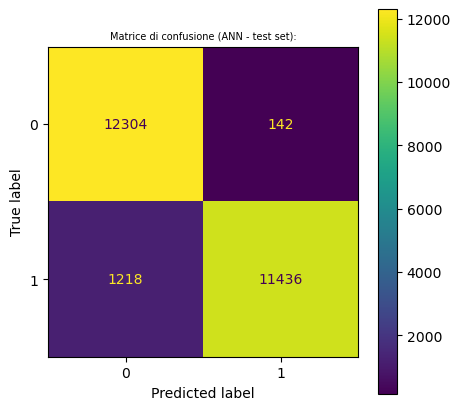

In [477]:
display_report(y_test, y_pred_test_soft_voting, model_name + ' - test set')

In [478]:
print_classification_report(y_test, y_pred_test_soft_voting, model_name + ' - test set')


Report di classificazione (ANN - test set):
              precision    recall  f1-score   support

           0     0.9099    0.9886    0.9476     12446
           1     0.9877    0.9037    0.9439     12654

    accuracy                         0.9458     25100
   macro avg     0.9488    0.9462    0.9458     25100
weighted avg     0.9492    0.9458    0.9457     25100



Possiamo notare che il soft voting fornisce risultati più accurati perchè sfrutta informazioni aggiuntive sul livello di fiducia di ogni classificatore nelle sue previsioni.

### 7.3 Reti neurali<a name="7.3"></a>

Infine, il progetto esplorerà l'uso delle **reti neurali**, che rappresentano la frontiera dell'apprendimento automatico per la loro flessibilità e potenza. Le reti neurali, in particolare quelle profonde, sono capaci di catturare relazioni complesse e non lineari nei dati, rendendole strumenti eccezionalmente potenti per la classificazione in contesti altamente variabili come quello della qualità dell'acqua.

#### 7.3.1 MLP<a name="7.3.1"></a>

Un Multi-Layer Perceptron (MLP) è un tipo di rete neurale artificiale feedforward, che consiste in almeno tre strati di nodi: uno strato di input, uno o più strati nascosti, e uno strato di output.

In [409]:
# nome modello = MLP
# istanza modello = mlp

model_name = "MLP"
start = time.time()
mlp= MLPClassifier(max_iter=5000,random_state=42, learning_rate_init=0.001)
mlp.fit(X_train, y_train)
stop = time.time()-start

In [410]:
params = mlp.get_params()
print(params)

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 5000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


**Risultati training set (MLP)**

In [411]:
y_pred_train_mlp=mlp.predict(X_train)
set_scores(results_train, model_name, y_train, y_pred_train_mlp, stop)

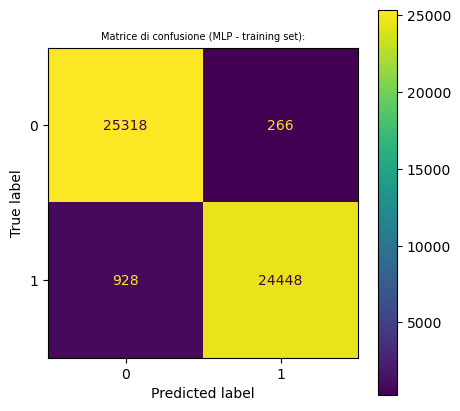

In [413]:
display_report(y_train, y_pred_train_mlp, model_name + ' - training set')

In [414]:
print_classification_report(y_train, y_pred_train_mlp, model_name + ' - training set')


Report di classificazione (MLP - training set):
              precision    recall  f1-score   support

           0     0.9646    0.9896    0.9770     25584
           1     0.9892    0.9634    0.9762     25376

    accuracy                         0.9766     50960
   macro avg     0.9769    0.9765    0.9766     50960
weighted avg     0.9769    0.9766    0.9766     50960



**Risultati test set (MLP)**

In [415]:
y_pred_test_mlp=mlp.predict(X_test)
set_scores(results_test, model_name, y_test, y_pred_test_mlp, stop)

In [416]:
y_predict.append(y_pred_test_mlp) #per la curva di ROC

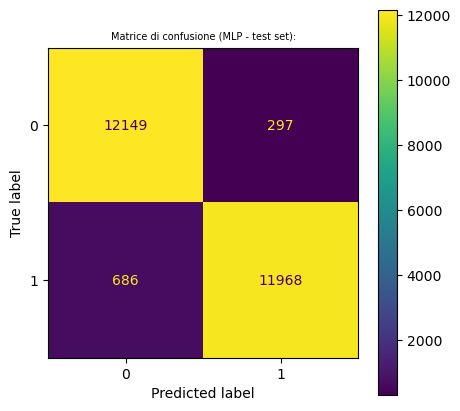

In [417]:
display_report(y_test, y_pred_test_mlp, model_name + ' - test set')

In [418]:
print_classification_report(y_test, y_pred_test_mlp, model_name + ' - test set')


Report di classificazione (MLP - test set):
              precision    recall  f1-score   support

           0     0.9466    0.9761    0.9611     12446
           1     0.9758    0.9458    0.9606     12654

    accuracy                         0.9608     25100
   macro avg     0.9612    0.9610    0.9608     25100
weighted avg     0.9613    0.9608    0.9608     25100



#### 7.3.2 ANN<a name="7.3.2"></a>

Di seguito è stata realizzata una rete neurale custom con le seguenti caratteristiche:

**Strato di Input**:
- *Input(shape=(X_train_scaled.shape[1],))*: Questo strato definisce la forma dell'input che la rete neurale si aspetta. La forma dell'input è determinata dal numero di caratteristiche (features) nel dataset di addestramento.

**Strati Nascosti**:
- *Dense(64, activation='relu')*: Primo strato denso con 64 neuroni e funzione di attivazione ReLU (Rectified Linear Unit).
- *Dense(128, activation='relu')*: Secondo strato denso con 128 neuroni e funzione di attivazione ReLU.
- *Dense(128, activation='relu')*: Terzo strato denso con 128 neuroni e funzione di attivazione ReLU.
- *Dense(64, activation='relu')*: Quarto strato denso con 64 neuroni e funzione di attivazione ReLU.

**Strato di Output**:
- *Dense(1, activation='sigmoid', kernel_initializer='normal')*: Strato denso con un singolo neurone e funzione di attivazione Sigmoid. Questo strato produce l'output finale della rete, che è un valore di probabilità compreso tra 0 e 1.

L'output del modello, essendo la probabilità calcolata dalla funzione sigmoid, varia tra 0 e 1. Un threshold di 0.5 è utilizzato per classificare le previsioni in classi binarie (0 o 1).

-----------
- **Funzione di Perdita: loss="binary_crossentropy"**: Utilizza la cross-entropia binaria come funzione di perdita, adatta per problemi di classificazione binaria.

- **Ottimizzatore: optimizer="sgd"**: Utilizza la discesa del gradiente stocastica (SGD) per aggiornare i pesi della rete durante l'addestramento.

In [419]:
df_X_ann = df.drop('target', axis=1)
df_Y_ann = df['target']

In [420]:
model_name = "ANN"

X_train_val, X_test_ann, y_train_val, y_test_ann = train_test_split(df_X_ann, df_Y_ann, test_size=0.1, random_state=42)
X_train_ann, X_val, y_train_ann, y_val = train_test_split(X_train_val, y_train_val, test_size=0.22, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_ann)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test_ann)

early_stopping = EarlyStopping(monitor='recall', patience=50, mode='max', verbose=1)

model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),  # è un layer speciale di Keras che viene usato per specificare il tipo e la forma dell'input che il modello si aspetta (non è il primo livello della rete)
    Dense(64, activation='relu'), # 1° livello nascosto
    Dense(128, activation='relu'), # 2° livello nascosto
    Dense(128, activation='relu'), # 3° livello nascosto
    Dense(64, activation='relu'), # 4° livello nascosto
    Dense(1, activation='sigmoid', kernel_initializer='normal') # livello output
])

model.compile(loss="binary_crossentropy", optimizer="sgd", metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.BinaryAccuracy()])

history = model.fit(X_train_scaled, y_train_ann, validation_data=(X_val_scaled, y_val), epochs=500, batch_size=1024, verbose=1, callbacks=[early_stopping])

test_loss, test_recall, test_precision, test_balanced_accuracy = model.evaluate(X_test_scaled, y_test_ann, verbose=1)

y_pred_probability = model.predict(X_test_scaled)
threshold = 0.5
y_pred_test_ann = (y_pred_probability > threshold).astype("int32")

Epoch 1/500
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - binary_accuracy: 0.5169 - loss: 0.6871 - precision: 0.5108 - recall: 0.8311 - val_binary_accuracy: 0.5047 - val_loss: 0.6782 - val_precision: 0.5011 - val_recall: 0.9936
Epoch 2/500
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.5045 - loss: 0.6747 - precision: 0.5023 - recall: 0.9955 - val_binary_accuracy: 0.4999 - val_loss: 0.6670 - val_precision: 0.4986 - val_recall: 0.9995
Epoch 3/500
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - binary_accuracy: 0.5027 - loss: 0.6630 - precision: 0.5016 - recall: 0.9991 - val_binary_accuracy: 0.5023 - val_loss: 0.6551 - val_precision: 0.4999 - val_recall: 0.9987
Epoch 4/500
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.5060 - loss: 0.6506 - precision: 0.5025 - recall: 0.9978 - val_binary_accuracy: 0.5179 - val_loss: 0.6413 - val_precision: 0.5079 - val_recall: 0.9932
Epoch 5/500
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.5298 - loss: 0.6357 - precision: 0.

Epoch 33/500
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.8886 - loss: 0.2692 - precision: 0.9177 - recall: 0.8539 - val_binary_accuracy: 0.8932 - val_loss: 0.2628 - val_precision: 0.9250 - val_recall: 0.8545
Epoch 34/500
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.8904 - loss: 0.2641 - precision: 0.9231 - recall: 0.8516 - val_binary_accuracy: 0.8943 - val_loss: 0.2592 - val_precision: 0.9258 - val_recall: 0.8561
Epoch 35/500
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.8909 - loss: 0.2603 - precision: 0.9219 - recall: 0.8531 - val_binary_accuracy: 0.8957 - val_loss: 0.2557 - val_precision: 0.9258 - val_recall: 0.8592
Epoch 36/500
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.8943 - loss: 0.2565 - precision: 0.9241 - recall: 0.8593 - val_binary_accuracy: 0.8973 - val_loss: 0.2523 - val_precision: 0.9308 - val_recall: 0.8572
Epoch 37/500
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.8963 - loss: 0.2517 - precision

In [421]:
set_scores(results_test, model_name, y_test_ann, y_pred_test_ann, 20)

In [422]:
y_predict.append(y_pred_test_ann) #per la curva di ROC

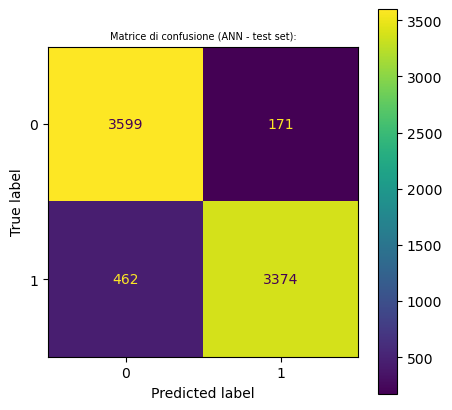

In [423]:
display_report(y_test_ann, y_pred_test_ann, model_name + ' - test set')

In [424]:
print_classification_report(y_test_ann, y_pred_test_ann, model_name + ' - test set')


Report di classificazione (ANN - test set):
              precision    recall  f1-score   support

           0     0.8862    0.9546    0.9192      3770
           1     0.9518    0.8796    0.9142      3836

    accuracy                         0.9168      7606
   macro avg     0.9190    0.9171    0.9167      7606
weighted avg     0.9193    0.9168    0.9167      7606



## 8. Analisi dei risultati<a name="8"></a>

Dopo aver addestrato diversi modelli sul training set e testato le loro prestazioni sul test set, è fondamentale esaminare i risultati ottenuti per identificare i classificatori che meglio rispondono agli obiettivi del progetto.

In [425]:
DEFAULT_PLOTLY_COLORS=px.colors.qualitative.Plotly

def bar_color(clf):
    if ('Albero Decisionale' or 'Albero Decisionale GSCV') in clf:
        return DEFAULT_PLOTLY_COLORS[0]
    elif ('SGD' or 'SGD GSCV' ) in clf:
        return DEFAULT_PLOTLY_COLORS[1]
    elif ('KNN' or 'KNN GSCV' ) in clf:
        return DEFAULT_PLOTLY_COLORS[2]
    elif ('Regressione Logistica' or 'Regressoine Logistica GSCV' ) in clf:
        return DEFAULT_PLOTLY_COLORS[3]
    elif ('MLP' or 'MLP GSCV' ) in clf:
        return DEFAULT_PLOTLY_COLORS[4]
    elif ('Naive Bayes' or 'Naive Bayes GSCV' ) in clf:
        return DEFAULT_PLOTLY_COLORS[5]
    else:
        return "black"

In [426]:
def plot_metric(data_frame, metric, title):
    """
    Crea e mostra un grafico a barre per una specifica metrica di valutazione.

    Parametri:
    - data_frame (pd.DataFrame): DataFrame contenente i risultati dei modelli.
    - metric (str): La metrica da visualizzare.
    - title (str): Il titolo del grafico.
    """
    # Ordina il DataFrame in base alla metrica specificata
    data_frame = data_frame.sort_values(metric, ascending=False)
    
    # Crea il grafico a barre con Plotly Express
    fig = px.bar(
        data_frame=data_frame,
        x=data_frame.index,
        y=metric,
        title=title,
        labels={'x': 'Modello', 'y': metric.capitalize()}
    )
    
    # Aggiorna il colore delle barre in base al classificatore
    fig.update_traces(marker_color=list(map(bar_color, data_frame.index)))
    
    # Imposta il range dell'asse y per uniformità
    fig.update_layout(yaxis_range=[0,1])
    
    # Mostra il grafico
    fig.show()

In [427]:
def plot_roc_curves(y_test, y_scores_list, model_names):
    
    # Compute ROC curve and AUC for each classifier
    fpr_list = []
    tpr_list = []
    roc_auc_list = []
    for y_scores in y_scores_list:
        fpr, tpr, _ = roc_curve(y_test, y_scores)
        roc_auc = auc(fpr, tpr)
        fpr_list.append(fpr)
        tpr_list.append(tpr)
        roc_auc_list.append(roc_auc)
    
    # Plot ROC curves for each classifier
    plt.figure(figsize=(18, 14))
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    for i in range(len(y_scores_list)):
        plt.plot(fpr_list[i], tpr_list[i], label='%s (AUC = %0.2f)' % (model_names[i], roc_auc_list[i]))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid(True)

    plt.show()

In [433]:
def plot_model_performance(df, ds):
    
    metrics = ["Accuracy", "Precision", "Recall", "F1"]
    fig = go.Figure()

    # Aggiungi le barre per ciascuna metrica
    for metric in metrics:
        fig.add_trace(go.Bar(
            x=df.index,
            y=df[metric],
            name=metric,
            text=df[metric],
            textposition='auto',
            hovertemplate=f'<b>{metric}</b>: %{{y:.2f}}'
        ))

    # Configura il layout del grafico
    fig.update_layout(
        title='Performance dei modelli sul ' + ds,
        xaxis=dict(title='Modelli'),
        yaxis=dict(title='Valori'),
        barmode='group',
        width=1000,  # Larghezza del grafico
        height=600,  # Altezza del grafico
        legend=dict(
            x=0.85,  # Posizione X della leggenda
            y=0.15,  # Posizione Y della leggenda (valore negativo per metterla sotto il grafico)
            traceorder='normal',
            bgcolor='rgba(255, 255, 255, 0.5)',
            bordercolor='Black',
            borderwidth=2
        )
    )

    fig.show()

### 8.1. Risultati sul train set<a name="8.1"></a>

In [430]:
results_train_df = pd.read_csv("results_train.csv", index_col=0)
results_train_df

Accuracy  Balanced Accuracy  Precision  \
Albero Decisionale          0.996409           0.996395   0.999802   
Albero Decisionale GSCV     0.983222           0.983204   0.987359   
KNN                         0.923960           0.923669   0.994071   
KNN GSCV                    0.958301           0.958163   0.991294   
SVM                         0.955141           0.955016   0.984758   
Naive Bayes                 0.820722           0.820025   0.986111   
Naive Bayes GSCV            0.820781           0.820084   0.986114   
Regressione Logistica       0.870624           0.870462   0.901672   
Regressione Logistica GSCV  0.870958           0.870797   0.901709   
SGD                         0.866954           0.866806   0.894786   
SGD GSCV                    0.870997           0.870815   0.906477   
Random Forest               0.985400           0.985363   0.994420   
AdaBoost                    0.970565           0.970480   0.990791   
XGBoost                     0.996095           0.996085   0.998456   
Voting Hard                 0.918564           0.918234   0.998778   
Voting Soft                 0.964227           0.964095   0.995999   
MLP                         0.976570           0.976516   0.989237   

                            Weighted Precision    Recall  Weighted Recall  \
Albero Decisionale                    0.996432  0.992985         0.996409   
Albero Decisionale GSCV               0.983257  0.978838         0.983222   
KNN                                   0.932644  0.852380         0.923960   
KNN GSCV                              0.960371  0.924377         0.958301   
SVM                                   0.956843  0.924220         0.955141   
Naive Bayes                           0.862591  0.649117         0.820722   
Naive Bayes GSCV                      0.862625  0.649235         0.820781   
Regressione Logistica                 0.872870  0.830785         0.870624   
Regressione Logistica GSCV            0.873162  0.831494         0.870958   
SGD                                   0.868807  0.830470         0.866954   
SGD GSCV                              0.873863  0.826174         0.870997   
Random Forest                         0.985562  0.976159         0.985400   
AdaBoost                              0.971364  0.949716         0.970565   
XGBoost                               0.996106  0.993695         0.996095   
Voting Hard                           0.929638  0.837484         0.918564   
Voting Soft                           0.966133  0.931904         0.964227   
MLP                                   0.976889  0.963430         0.976570   

                                  F1       Time             Data esecuzione  
Albero Decisionale          0.996382   1.610451  2024-07-09 16:01:52.612098  
Albero Decisionale GSCV     0.983080   1.610451  2024-07-09 16:03:07.028115  
KNN                         0.917789   0.006931  2024-07-09 16:03:37.048748  
KNN GSCV                    0.956667   0.006931  2024-07-09 16:05:28.632114  
SVM                         0.953529  24.177258  2024-07-09 16:06:40.272122  
Naive Bayes                 0.782890   0.028119  2024-07-09 16:07:06.775828  
Naive Bayes GSCV            0.782976   0.028119  2024-07-09 16:07:21.038828  
Regressione Logistica       0.864778   0.135152  2024-07-09 16:07:30.265894  
Regressione Logistica GSCV  0.865180   0.135152  2024-07-09 16:07:43.677898  
SGD                         0.861429   0.092589  2024-07-09 16:07:48.126155  
SGD GSCV                    0.864465   0.092589  2024-07-09 16:07:56.973705  
Random Forest               0.985205  21.230025  2024-07-09 16:09:29.617598  
AdaBoost                    0.969819   7.137106  2024-07-09 16:09:42.650996  
XGBoost                     0.996070   1.032547  2024-07-09 16:09:49.457342  
Voting Hard                 0.911047   1.741069  2024-07-09 16:09:59.846066  
Voting Soft                 0.962886   2.084603  2024-07-09 16:10:07.459828  
MLP                         0.976163  69.555984  2024-

In [434]:
# Esempio di utilizzo della funzione
plot_model_performance(results_train_df, "Training Set")

### 8.2. Risultati sul test set<a name="8.2"></a>

In [435]:
results_test_df = pd.read_csv("results_test.csv", index_col=0)
results_test_df

Accuracy  Balanced Accuracy  Precision  \
Albero Decisionale          0.976375           0.976416   0.981554   
Albero Decisionale GSCV     0.972988           0.973036   0.978963   
KNN                         0.881355           0.882260   0.989379   
KNN GSCV                    0.895618           0.896305   0.975545   
SVM                         0.955141           0.955016   0.984758   
Naive Bayes                 0.815857           0.817297   0.986670   
Naive Bayes GSCV            0.815896           0.817338   0.986789   
Regressione Logistica       0.868327           0.868657   0.902108   
Regressione Logistica GSCV  0.868048           0.868372   0.901082   
SGD                         0.866813           0.867106   0.896584   
SGD GSCV                    0.867450           0.867819   0.905205   
Random Forest               0.978685           0.978729   0.984102   
AdaBoost                    0.968048           0.968225   0.989348   
XGBoost                     0.985896           0.985930   0.990040   
Voting Hard                 0.909482           0.910163   0.991014   
Voting Soft                 0.945817           0.946168   0.987735   
MLP                         0.960837           0.960962   0.975785   
ANN                         0.916776           0.917102   0.951763   

                            Weighted Precision    Recall  Weighted Recall  \
Albero Decisionale                    0.976428  0.971392         0.976375   
Albero Decisionale GSCV               0.973060  0.967204         0.972988   
KNN                                   0.901008  0.772957         0.881355   
KNN GSCV                              0.907175  0.813340         0.895618   
SVM                                   0.956843  0.924220         0.955141   
Naive Bayes                           0.860486  0.643433         0.815857   
Naive Bayes GSCV                      0.860554  0.643433         0.815896   
Regressione Logistica                 0.870906  0.828750         0.868327   
Regressione Logistica GSCV            0.870523  0.829303         0.868048   
SGD                                   0.868852  0.831753         0.866813   
SGD GSCV                              0.870631  0.823297         0.867450   
Random Forest                         0.978744  0.973447         0.978685   
AdaBoost                              0.968940  0.946815         0.968048   
XGBoost                               0.985931  0.981903         0.985896   
Voting Hard                           0.921166  0.827960         0.909482   
Voting Soft                           0.949152  0.903746         0.945817   
MLP                                   0.961290  0.945788         0.960837   
ANN                                   0.919283  0.879562         0.916776   

                                  F1       Time             Data esecuzione  
Albero Decisionale          0.976447   1.610451  2024-07-09 16:02:01.422200  
Albero Decisionale GSCV     0.973048   1.610451  2024-07-09 16:03:20.672644  
KNN                         0.867879   0.006931  2024-07-09 16:03:47.654892  
KNN GSCV                    0.887088   0.006931  2024-07-09 16:05:34.452551  
SVM                         0.953529  24.177258  2024-07-09 16:07:00.563100  
Naive Bayes                 0.778915   0.028119  2024-07-09 16:07:15.690864  
Naive Bayes GSCV            0.778952   0.028119  2024-07-09 16:07:24.703268  
Regressione Logistica       0.863874   0.135152  2024-07-09 16:07:33.585721  
Regressione Logistica GSCV  0.863704   0.135152  2024-07-09 16:07:44.003555  
SGD                         0.862952   0.092589  2024-07-09 16:07:50.457055  
SGD GSCV                    0.862310   0.092589  2024-07-09 16:07:59.798565  
Random Forest               0.978745  21.230025  2024-07-09 16:09:31.458868  
AdaBoost                    0.967614   7.137106  2024-07-09 16:09:43.094376  
XGBoost                     0.985955   1.032547  2024-07-09 16:09:50.637865  
Voting Hard                 0.902179   1.741069  2024-07-09 16:

In [436]:
# Esempio di utilizzo della funzione
plot_model_performance(results_test_df, "Test set")

### 8.2.1 Curva di ROC<a name="8.2.1"></a>

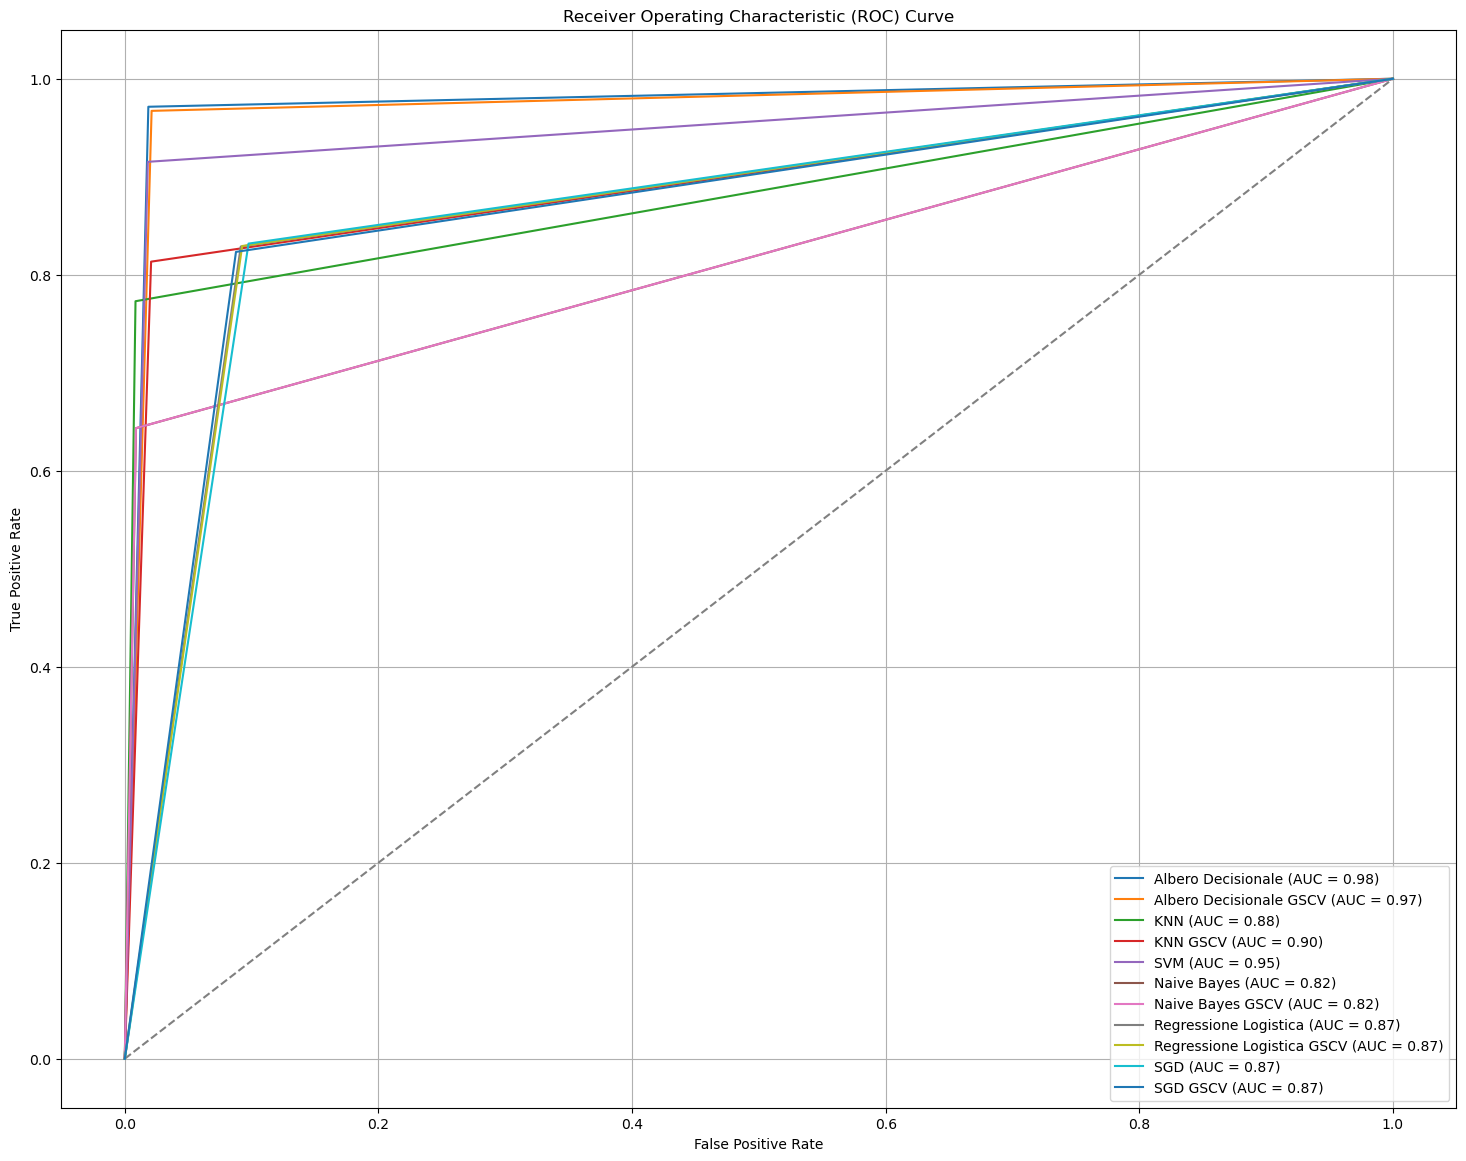

In [466]:
plot_roc_curves(y_test, y_predict, models)

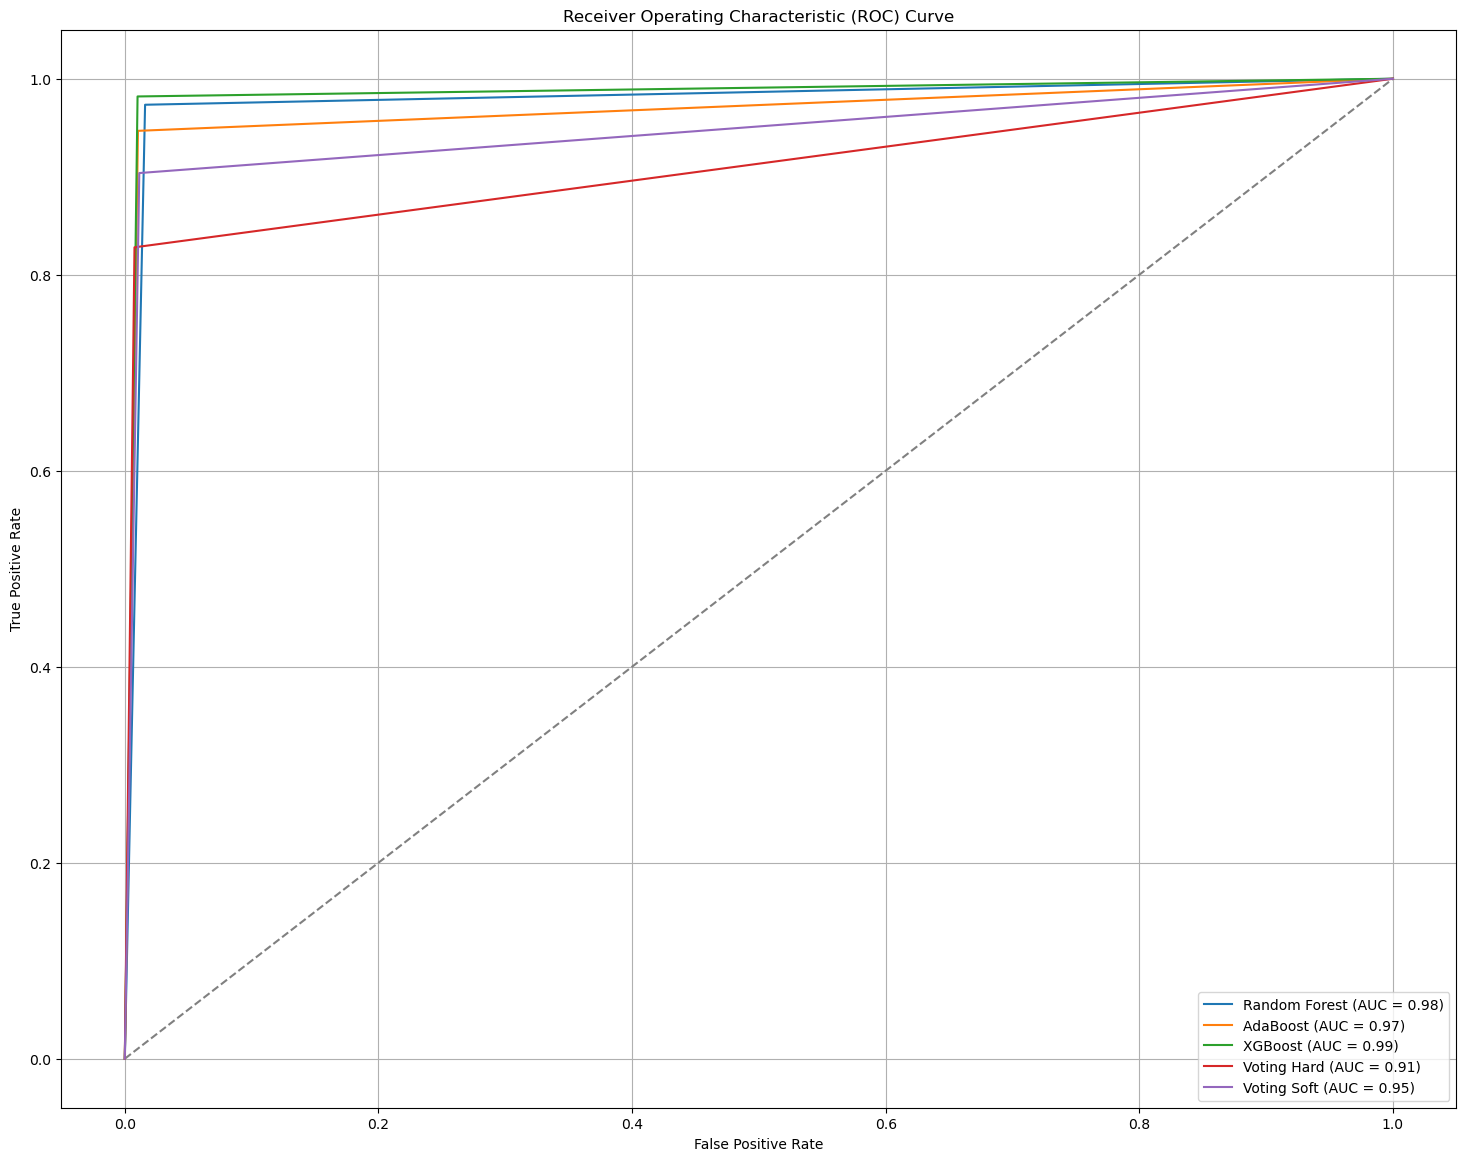

In [475]:
plot_roc_curves(y_test, y_predict, ['Random Forest', 'AdaBoost', 'XGBoost', 'Voting Hard', 'Voting Soft'])

### 8.3. Risultati cross validation<a name="8.3"></a>

In [270]:
results_cv_df = pd.read_csv("results_cv.csv", index_col=0)
results_cv_df

Accuracy  ErrorRate  Precision    Recall   F-score  \
Albero Decisionale     0.976158   0.023842   0.971399  0.976158  0.976158   
KNN                    0.878238   0.121762   0.953974  0.878238  0.878238   
Naive Bayes            0.820703   0.179297   0.961484  0.820703  0.820703   
Regressione Logistica  0.870212   0.129788   0.949741  0.870212  0.870212   
SGD                    0.868505   0.131495   0.947914  0.868505  0.868505   
SVM                    0.949588   0.050412   0.987385  0.949588  0.949588   

                             Time             Data esecuzione  
Albero Decisionale      61.422468  2024-07-08 18:14:11.091710  
KNN                     17.465533  2024-07-08 18:14:28.561230  
Naive Bayes              0.785883  2024-03-09 10:17:35.289232  
Regressione Logistica    4.232096  2024-03-09 10:17:39.521329  
SGD                      4.194878  2024-03-09 10:17:43.716207  
SVM                    909.530509  2024-03-09 10:17:34.503350

### 8.4 Accuracy<a name="8.4"></a>

In [479]:
plot_metric(results_train_df, 'Accuracy', 'Accuracy sul training set')

In [480]:
plot_metric(results_test_df, 'Accuracy', 'Accuracy sul test set')

### 8.5 Precision<a name="8.5"></a>

In [483]:
plot_metric(results_train_df, 'Precision', 'Precision sul training set')

In [484]:
plot_metric(results_test_df, 'Precision', 'Precision sul test set')

### 8.6 Recall<a name="8.6"></a>

In [487]:
plot_metric(results_train_df, 'Recall', 'Recall sul training set')

In [488]:
plot_metric(results_test_df, 'Recall', 'Recall sul test set')

### 8.7 F1<a name="8.7"></a>

In [491]:
plot_metric(results_train_df, 'F1', 'F1 Recall sul training set')

In [492]:
plot_metric(results_test_df, 'F1', 'F1 Recall sul test set')

## 9. Appendice<a name="9"></a>

In questa sezione sono riportati alcuni test effettuati in fase di scelta su determinati parametri e algoritmi. 

### 9.1 TEST 1<a name="9.1"></a>

In [119]:
df_scaled=pd.read_csv('df_scaled.csv')

Consideriamo il dataset preprocessato fino all'operazione di scaling:
1. Campionamento
2. Outlier con DBSCAN
3. Bilanciamento

In [120]:
df_test1 = df_scaled
df_test1 = df_test1.sample(n=200184, random_state=35) # n e random_state sono dei numeri casuali

Il campionamento è necessario in quanto ci permette di lavorare su un campione rappresentativo del dataset iniziale senza troppi sforzi computazionali.

In [121]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200184 entries, 598225 to 333293
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ph                      200184 non-null  float64
 1   iron                    200184 non-null  float64
 2   nitrate                 200184 non-null  float64
 3   chloride                200184 non-null  float64
 4   lead                    200184 non-null  float64
 5   zinc                    200184 non-null  float64
 6   color                   200184 non-null  float64
 7   turbidity               200184 non-null  float64
 8   fluoride                200184 non-null  float64
 9   copper                  200184 non-null  float64
 10  odor                    200184 non-null  float64
 11  sulfate                 200184 non-null  float64
 12  conductivity            200184 non-null  float64
 13  chlorine                200184 non-null  float64
 14  manganese      

Vediamo in che modo sono distribuite le classi nel nostro campione.

0    154672
1     45512
Name: target, dtype: int64


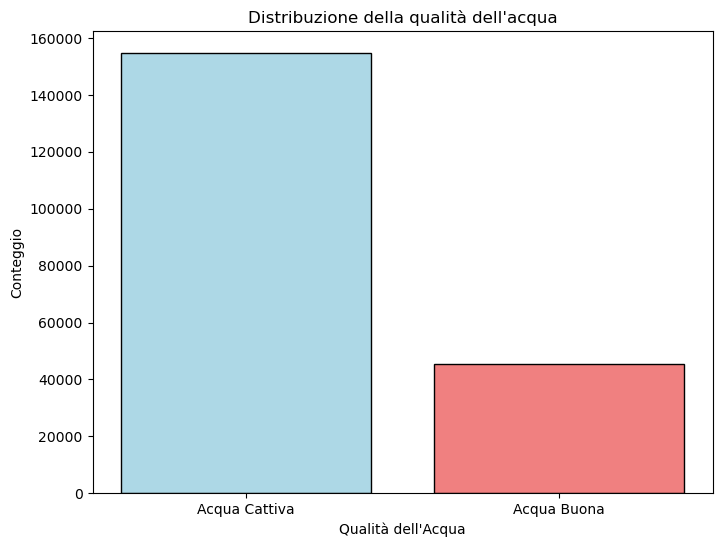

In [122]:
plot_distribution(df_test1, 'target', colors, labels, x, title)

In [124]:
# Create DBSCAN object
dbscan = DBSCAN(eps=1.8, min_samples=3)
# Perform clustering
clusters1 = dbscan.fit_predict(df_test1)

df_test1['Cluster'] = clusters1

Vediamo quanti sono gli outlier rilevati.

In [125]:
print("Numero di outlier totali: " + str(np.sum(clusters1 == -1)))
print("--------------------------------------")

outlier_counts = df_test1[df_test1['Cluster'] == -1]['target'].value_counts()

print("Numero di outlier per classe:")
print(outlier_counts)

Numero di outlier totali: 183544
--------------------------------------
Numero di outlier per classe:
0    138043
1     45501
Name: target, dtype: int64


Come possiamo notare, quasi tutte le tuple della classe 1 sono rilevate come outlier.

In [126]:
df_test1 = df_test1[df_test1['Cluster'] != -1].copy()
df_test1.drop(['Cluster'], axis=1, inplace=True)

In [127]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16640 entries, 323690 to 269383
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ph                      16640 non-null  float64
 1   iron                    16640 non-null  float64
 2   nitrate                 16640 non-null  float64
 3   chloride                16640 non-null  float64
 4   lead                    16640 non-null  float64
 5   zinc                    16640 non-null  float64
 6   color                   16640 non-null  float64
 7   turbidity               16640 non-null  float64
 8   fluoride                16640 non-null  float64
 9   copper                  16640 non-null  float64
 10  odor                    16640 non-null  float64
 11  sulfate                 16640 non-null  float64
 12  conductivity            16640 non-null  float64
 13  chlorine                16640 non-null  float64
 14  manganese               16640 no

Vediamo la nuova distribuzione dopo aver rimosso gli outlier.

0    16629
1       11
Name: target, dtype: int64


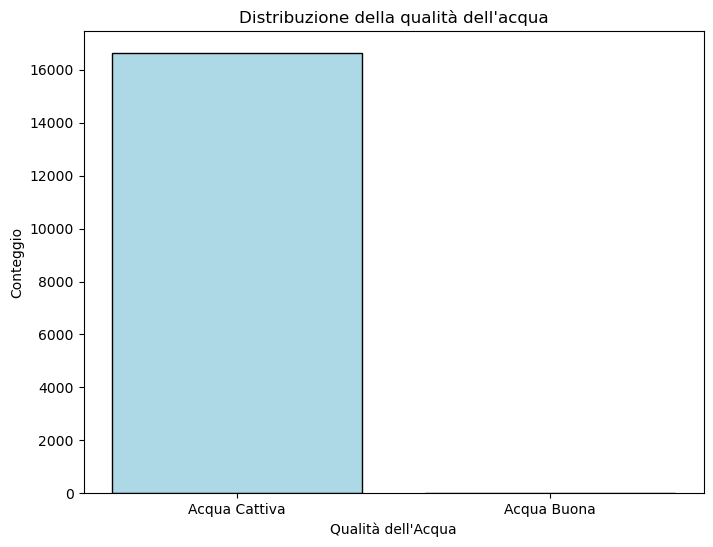

In [128]:
plot_distribution(df_test1, 'target', colors, labels, x, title)

**RISULTATO**: A questo punto non ha senso procedere con il bilanciamento del dataset in quanto sarebbe complicato per il modello creare delle tuple artificiali a partire da 11 esempi reali.

I parametri del DBSCAN potrebbero essere troppo restrittivi? Proviamo con requisiti più semplici da raggiungere.

In [129]:
df_test1_bis = df_scaled
df_test1_bis = df_test1_bis.sample(n=200184, random_state=35) # n e random_state sono dei numeri casuali

In [131]:
# Create DBSCAN object
dbscan = DBSCAN(eps=2, min_samples=2)
# Perform clustering
clusters1_bis = dbscan.fit_predict(df_test1_bis)

df_test1_bis['Cluster'] = clusters1_bis

In [132]:
print("Numero di outlier totali: " + str(np.sum(clusters1_bis == -1)))
print("--------------------------------------")

outlier_counts = df_test1_bis[df_test1_bis['Cluster'] == -1]['target'].value_counts()

print("Numero di outlier per classe:")
print(outlier_counts)

Numero di outlier totali: 129200
--------------------------------------
Numero di outlier per classe:
0    84136
1    45064
Name: target, dtype: int64


In [133]:
df_test1_bis = df_test1_bis[df_test1_bis['Cluster'] != -1].copy()
df_test1_bis.drop(['Cluster'], axis=1, inplace=True)

Vediamo la nuova distribuzione dopo aver rimosso gli outlier.

0    70536
1      448
Name: target, dtype: int64


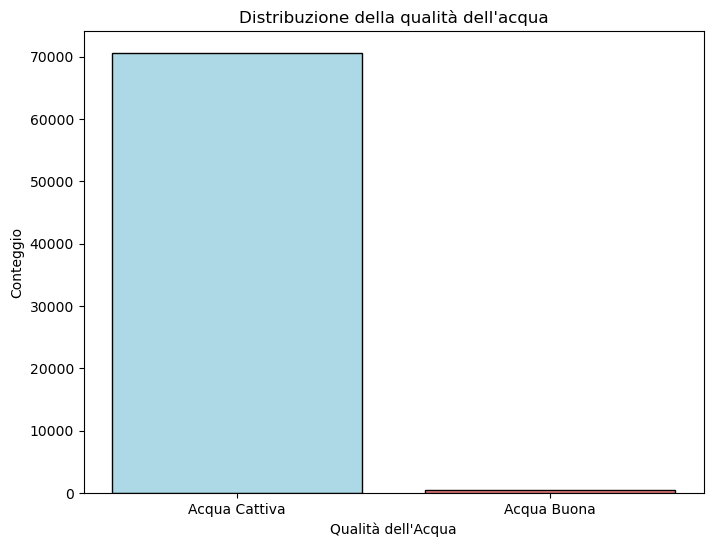

In [134]:
plot_distribution(df_test1_bis, 'target', colors, labels, x, title)

**RISULTATO**: La situazione seppur è migliorata, non si è ottenuto un risultato buono da permettere un bilanciamento decente, sempre per lo stesso problema poco prima menzionato.

### 9.2 TEST 2<a name="9.2"></a>

Ma se rimuovendo tutte le tuple Nan avessimo rimosso anche delle tuple di classe 1 interessanti per l'analisi?
1. Iterarive imputer (invece di fare il drop diretto dei Nan)
2. Outlier
3. Campionamento
4. Bilanciamento

In [88]:
df_test2=pd.read_csv('df_x.csv')

__df_x__ non contiene attributi inutili e duplicati. È stato trasformato e scalato.

In [138]:
imputer = IterativeImputer(max_iter=10, random_state=0)

# Applica l'imputer al dataset
df_imputed = pd.DataFrame(imputer.fit_transform(df_test2), columns=df_test2.columns)

Vediamo il nostro dataset allo stato attuale con i valori imputati.

In [139]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033791 entries, 0 to 1033790
Data columns (total 23 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   ph                      1033791 non-null  float64
 1   iron                    1033791 non-null  float64
 2   nitrate                 1033791 non-null  float64
 3   chloride                1033791 non-null  float64
 4   lead                    1033791 non-null  float64
 5   zinc                    1033791 non-null  float64
 6   color                   1033791 non-null  float64
 7   turbidity               1033791 non-null  float64
 8   fluoride                1033791 non-null  float64
 9   copper                  1033791 non-null  float64
 10  odor                    1033791 non-null  float64
 11  sulfate                 1033791 non-null  float64
 12  conductivity            1033791 non-null  float64
 13  chlorine                1033791 non-null  float64
 14  ma

In [140]:
df_test2 = df_imputed.sample(n=200184, random_state=35) # n e random_state sono dei numeri casuali

In [141]:
# Create DBSCAN object
dbscan = DBSCAN(eps=1.8, min_samples=3)
# Perform clustering
clusters2 = dbscan.fit_predict(df_test2)

df_test2['Cluster'] = clusters2

Vediamo quanti sono gli outlier rilevati.

In [142]:
print("Numero di outlier totali: " + str(np.sum(clusters2 == -1)))
print("--------------------------------------")

outlier_counts = df_test2[df_test2['Cluster'] == -1]['target'].value_counts()

print("Numero di outlier per classe:")
print(outlier_counts)

Numero di outlier totali: 180423
--------------------------------------
Numero di outlier per classe:
0.0    134886
1.0     45537
Name: target, dtype: int64


Come possiamo notare, quasi tutte le tuple della classe 1 sono rilevate come outlier.

In [143]:
df_test2 = df_test2[df_test2['Cluster'] != -1].copy()
df_test2.drop(['Cluster'], axis=1, inplace=True)

In [144]:
df_test2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19761 entries, 791833 to 557764
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ph                      19761 non-null  float64
 1   iron                    19761 non-null  float64
 2   nitrate                 19761 non-null  float64
 3   chloride                19761 non-null  float64
 4   lead                    19761 non-null  float64
 5   zinc                    19761 non-null  float64
 6   color                   19761 non-null  float64
 7   turbidity               19761 non-null  float64
 8   fluoride                19761 non-null  float64
 9   copper                  19761 non-null  float64
 10  odor                    19761 non-null  float64
 11  sulfate                 19761 non-null  float64
 12  conductivity            19761 non-null  float64
 13  chlorine                19761 non-null  float64
 14  manganese               19761 no

Vediamo la nuova distribuzione dopo aver rimosso gli outlier.

0.0    19746
1.0       15
Name: target, dtype: int64


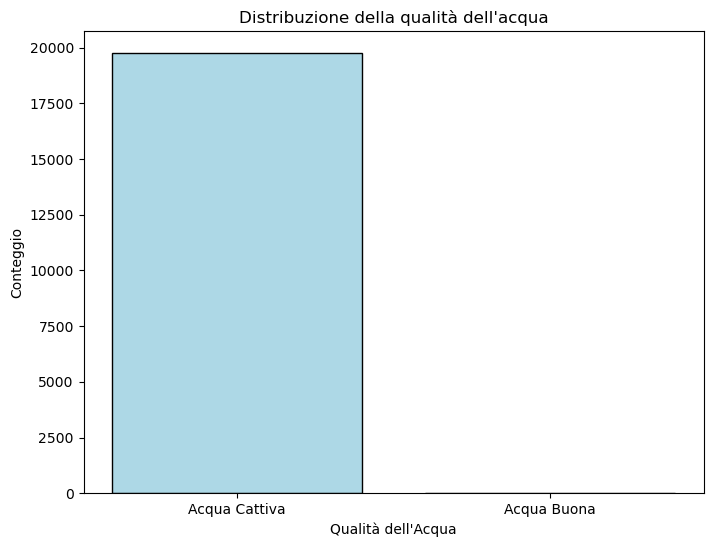

In [145]:
plot_distribution(df_test2, 'target', colors, labels, x, title)

**RISULTATO**: Anche utilizzando un IteratorImputer per gestire i valori Nan, otteniamo gli stessi risultati precedenti. Ovvero, non ha senso proseguire con il bilanciamento.

Anche in questo caso i parametri del DBSCAN potrebbero essere troppo restrittivi? Proviamo con requisiti più semplici da raggiungere.

In [146]:
df_test2_bis=pd.read_csv('df_x.csv')

In [147]:
imputer = IterativeImputer(max_iter=10, random_state=0)

# Applica l'imputer al dataset
df_imputed2 = pd.DataFrame(imputer.fit_transform(df_test2_bis), columns=df_test2_bis.columns)

Vediamo il nostro dataset allo stato attuale con i valori imputati.

In [148]:
df_imputed2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033791 entries, 0 to 1033790
Data columns (total 23 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   ph                      1033791 non-null  float64
 1   iron                    1033791 non-null  float64
 2   nitrate                 1033791 non-null  float64
 3   chloride                1033791 non-null  float64
 4   lead                    1033791 non-null  float64
 5   zinc                    1033791 non-null  float64
 6   color                   1033791 non-null  float64
 7   turbidity               1033791 non-null  float64
 8   fluoride                1033791 non-null  float64
 9   copper                  1033791 non-null  float64
 10  odor                    1033791 non-null  float64
 11  sulfate                 1033791 non-null  float64
 12  conductivity            1033791 non-null  float64
 13  chlorine                1033791 non-null  float64
 14  ma

In [149]:
df_test2_bis = df_imputed2.sample(n=200184, random_state=35) # n e random_state sono dei numeri casuali

In [150]:
# Create DBSCAN object
dbscan = DBSCAN(eps=2, min_samples=2)
# Perform clustering
clusters2_bis = dbscan.fit_predict(df_test2_bis)

df_test2_bis['Cluster'] = clusters2_bis

Vediamo quanti sono gli outlier rilevati.

In [151]:
print("Numero di outlier totali: " + str(np.sum(clusters2_bis == -1)))
print("--------------------------------------")

outlier_counts = df_test2_bis[df_test2_bis['Cluster'] == -1]['target'].value_counts()

print("Numero di outlier per classe:")
print(outlier_counts)

Numero di outlier totali: 125320
--------------------------------------
Numero di outlier per classe:
0.0    80679
1.0    44641
Name: target, dtype: int64


Come possiamo notare, quasi tutte le tuple della classe 1 sono rilevate come outlier.

In [152]:
df_test2_bis = df_test2_bis[df_test2_bis['Cluster'] != -1].copy()
df_test2_bis.drop(['Cluster'], axis=1, inplace=True)

In [153]:
df_test2_bis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74864 entries, 783337 to 926866
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ph                      74864 non-null  float64
 1   iron                    74864 non-null  float64
 2   nitrate                 74864 non-null  float64
 3   chloride                74864 non-null  float64
 4   lead                    74864 non-null  float64
 5   zinc                    74864 non-null  float64
 6   color                   74864 non-null  float64
 7   turbidity               74864 non-null  float64
 8   fluoride                74864 non-null  float64
 9   copper                  74864 non-null  float64
 10  odor                    74864 non-null  float64
 11  sulfate                 74864 non-null  float64
 12  conductivity            74864 non-null  float64
 13  chlorine                74864 non-null  float64
 14  manganese               74864 no

Vediamo la nuova distribuzione dopo aver rimosso gli outlier.

0.0    73953
1.0      911
Name: target, dtype: int64


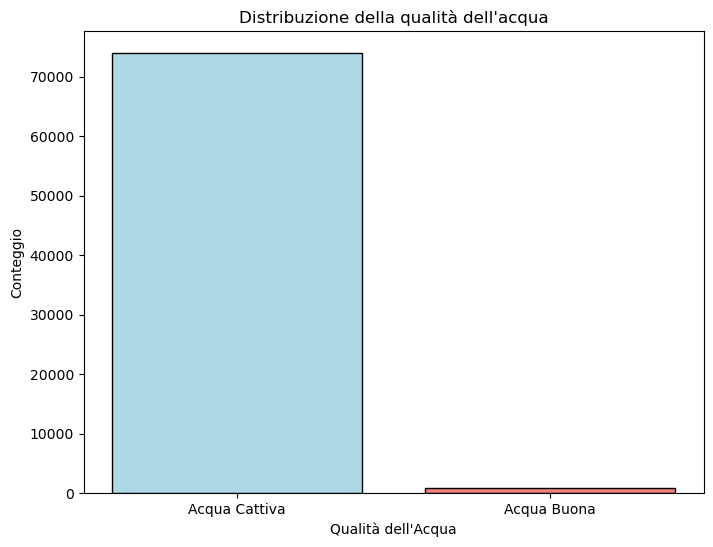

In [154]:
plot_distribution(df_test2_bis, 'target', colors, labels, x, title)

**RISULTATO**: Nemmeno utilizzando parametri di DBSCAN meno restrittive con Iterative Imputer otteniamo buoni risultati.

E se, invece, utilizzassimo un'imputazione basata su **Mediana**?

In [172]:
df_test2_tris=pd.read_csv('df_x.csv')

Applico un imputer basato su Mediana.

In [157]:
imputer = SimpleImputer(strategy='median')

# Applica l'imputer al dataset
df_imputed2_tris = pd.DataFrame(imputer.fit_transform(df_test2_tris), columns=df_test2_tris.columns)

Vediamo il nostro dataset allo stato attuale con i valori imputati.

In [158]:
df_imputed2_tris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033791 entries, 0 to 1033790
Data columns (total 23 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   ph                      1033791 non-null  float64
 1   iron                    1033791 non-null  float64
 2   nitrate                 1033791 non-null  float64
 3   chloride                1033791 non-null  float64
 4   lead                    1033791 non-null  float64
 5   zinc                    1033791 non-null  float64
 6   color                   1033791 non-null  float64
 7   turbidity               1033791 non-null  float64
 8   fluoride                1033791 non-null  float64
 9   copper                  1033791 non-null  float64
 10  odor                    1033791 non-null  float64
 11  sulfate                 1033791 non-null  float64
 12  conductivity            1033791 non-null  float64
 13  chlorine                1033791 non-null  float64
 14  ma

In [159]:
df_test2_tris = df_imputed2_tris.sample(n=200184, random_state=35) # n e random_state sono dei numeri casuali

Lo provo direttamente con DBSCAN meno restrittivo.

In [160]:
# Create DBSCAN object
dbscan = DBSCAN(eps=2, min_samples=2)
# Perform clustering
clusters2_tris = dbscan.fit_predict(df_test2_tris)

df_test2_tris['Cluster'] = clusters2_tris

Vediamo quanti sono gli outlier rilevati.

In [161]:
print("Numero di outlier totali: " + str(np.sum(clusters2_tris == -1)))
print("--------------------------------------")

outlier_counts = df_test2_tris[df_test2_tris['Cluster'] == -1]['target'].value_counts()

print("Numero di outlier per classe:")
print(outlier_counts)

Numero di outlier totali: 124863
--------------------------------------
Numero di outlier per classe:
0.0    80241
1.0    44622
Name: target, dtype: int64


Come possiamo notare, quasi tutte le tuple della classe 1 sono rilevate come outlier.

In [162]:
df_test2_tris = df_test2_tris[df_test2_tris['Cluster'] != -1].copy()
df_test2_tris.drop(['Cluster'], axis=1, inplace=True)

In [163]:
df_test2_tris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75321 entries, 783337 to 926866
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ph                      75321 non-null  float64
 1   iron                    75321 non-null  float64
 2   nitrate                 75321 non-null  float64
 3   chloride                75321 non-null  float64
 4   lead                    75321 non-null  float64
 5   zinc                    75321 non-null  float64
 6   color                   75321 non-null  float64
 7   turbidity               75321 non-null  float64
 8   fluoride                75321 non-null  float64
 9   copper                  75321 non-null  float64
 10  odor                    75321 non-null  float64
 11  sulfate                 75321 non-null  float64
 12  conductivity            75321 non-null  float64
 13  chlorine                75321 non-null  float64
 14  manganese               75321 no

Vediamo la nuova distribuzione dopo aver rimosso gli outlier.

0.0    74391
1.0      930
Name: target, dtype: int64


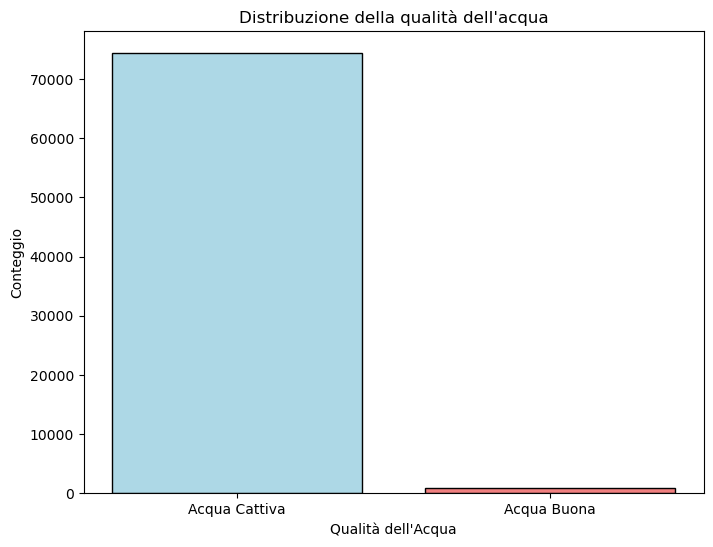

In [164]:
plot_distribution(df_test2_tris, 'target', colors, labels, x, title)

**RISULTATO**: Quasi gli stessi risultati anche utilizzando parametri di DBSCAN meno restrittivi con Imputazione basata su Mediana.

Come ultimo tentativo è stato utilizzato anche un **Imputer basato su RandomForest** è risultato troppo costoso computazionalmente.

### 9.3 TEST 3<a name="9.3"></a>

Sfruttiamo un altro metodo per trovare gli outlier.
1. Outlier con interquartile range
2. Bilanciamento con OverSampling
3. Campionamento

In sostanza, sono stati calcolati i quartili dei dati per ciascuna caratteristica, ovvero il primo quartile (**Q1**) e il terzo quartile (**Q3**), e determinato un **punto di soglia** per definire gli outlier. Le righe del dataset che contengono un numero specifico (**n**) di caratteristiche con valori che superano questo punto di soglia sono state considerate come potenziali outlier.
- **def find_outliers(df: pd.DataFrame, n: int, columns: List[str]) -> List[int]:**

In [165]:
def find_outliers(df, n, columns):
    """
    Identifica gli outlier in un DataFrame basandosi sul metodo dell'Interquartile Range (IQR).
    Un outlier è definito come un valore che si trova al di fuori di 1.5 volte l'IQR dall'1° o 3° quartile.
    La funzione restituisce gli indici delle righe considerate outlier in almeno 'n' colonne specificate.
    
    Parametri:
    df (pd.DataFrame): DataFrame contenente i dati per l'analisi degli outlier.
    n (int): Numero minimo di colonne in cui una riga deve essere considerata outlier per essere inclusa nella lista di righe da rimuovere.
    columns (list): Lista delle colonne del DataFrame da esaminare per la rilevazione degli outlier.
    
    Ritorna:
    to_drop (list): Lista degli indici delle righe del DataFrame considerate outlier in base ai criteri specificati.
    """
    
    rows = []  # Accumula gli indici di tutte le righe che contengono outlier in qualsiasi colonna specificata
    to_drop = []  # Lista finale degli indici delle righe da rimuovere
    
    # Itera attraverso ogni colonna specificata per identificare gli outlier
    for col in columns:
        # Calcola il 1° quartile (Q1) e il 3° quartile (Q3)
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # Calcola l'Interquartile Range (IQR)
        IQR = Q3 - Q1
        
        # Determina il punto oltre il quale un valore è considerato un outlier
        outlier_point = 1.5 * IQR
        
        # Seleziona gli indici delle righe con valori outlier
        rows.extend(df[(df[col] < Q1 - outlier_point)|(df[col] > Q3 + outlier_point)].index)
    
    # Conta quante volte ogni riga è stata identificata come contenente un outlier e seleziona quelle che superano la soglia 'n'
    for r, c in Counter(rows).items():
        if c >= n: 
            to_drop.append(r)
    
    return to_drop


In [170]:
df_test3=pd.read_csv('df_scaled.csv')

In [176]:
to_drop = find_outliers(df_test3, 4, df_test3.select_dtypes(["float", "int"]).columns)
len(to_drop)

42997

A questo punto possiamo procedere con la rimozione delle tuple outlier.

In [177]:
df_test3.drop(to_drop, inplace = True, axis = 0)
df_test3.shape

(643416, 23)

Effettuo un campionamento.

In [179]:
df_test3 = df_test3.sample(n=200184, random_state=35) # n e random_state sono dei numeri casuali

0    162952
1     37232
Name: target, dtype: int64


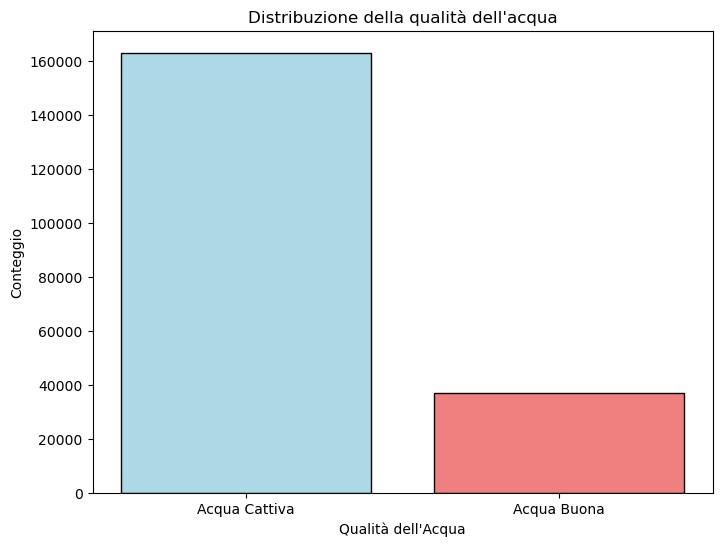

In [181]:
plot_distribution(df_test3, 'target', colors, labels, x, title)

Analizzando il campione ottenuto, conviene procedere con Bilanciamento Undersampling riducendo le osservazioni della classe maggioritaria.

In [187]:
df_test3 = balance_dataset(df_test3, 'target')

Di seguito ecco i risultati (**non buoni**) ottenuti su train e test set con classificatori di base e reti neruali.

In [191]:
results_train_quartili = pd.read_csv("results_train_quartili.csv", index_col=0)
results_train_quartili

Accuracy  Balanced Accuracy  Precision  \
Albero Decisionale          0.986029           0.986041   0.983710   
Albero Decisionale GSCV     0.936300           0.936318   0.932707   
KNN                         0.825356           0.824921   0.885551   
KNN GSCV                    0.859250           0.858943   0.903681   
SVM                         0.871598           0.871650   0.863308   
Naive Bayes                 0.672880           0.671500   0.846122   
Naive Bayes GSCV            0.672880           0.671500   0.846122   
Regressione Logistica       0.756665           0.756400   0.782123   
Regressione Logistica GSCV  0.756685           0.756420   0.782157   
SGD                         0.750671           0.750237   0.795876   
SGD GSCV                    0.760794           0.760449   0.796399   
Random Forest               0.922730           0.923050   0.877414   
AdaBoost                    0.823492           0.823186   0.862732   
XGBoost                     0.938144           0.938326   0.910038   
Voting Hard                 0.811686           0.811103   0.894745   
Voting Soft                 0.912227           0.912195   0.916259   
MLP                         0.874684           0.874696   0.871899   
ANN                              NaN                NaN        NaN   

                            Weighted Precision    Recall  Weighted Recall  \
Albero Decisionale                    0.986040  0.988270         0.986029   
Albero Decisionale GSCV               0.936327  0.939699         0.936300   
KNN                                   0.833519  0.745093         0.825356   
KNN GSCV                              0.863681  0.802491         0.859250   
SVM                                   0.871772  0.881333         0.871598   
Naive Bayes                           0.730645  0.418235         0.672880   
Naive Bayes GSCV                      0.730645  0.418235         0.672880   
Regressione Logistica                 0.758851  0.707848         0.756665   
Regressione Logistica GSCV            0.758873  0.707848         0.756685   
SGD                                   0.756761  0.670603         0.750671   
SGD GSCV                              0.764699  0.697207         0.760794   
Random Forest                         0.928773  0.981781         0.922730   
AdaBoost                              0.827369  0.767101         0.823492   
XGBoost                               0.940162  0.971664         0.938144   
Voting Hard                           0.826142  0.704140         0.811686   
Voting Soft                           0.912270  0.906324         0.912227   
MLP                                   0.874700  0.876819         0.874684   
ANN                                        NaN       NaN              NaN   

                                  F1       Time             Data esecuzione  
Albero Decisionale          0.985985   1.527157  2024-07-09 13:08:19.226170  
Albero Decisionale GSCV     0.936190   1.527157  2024-07-09 13:09:40.931998  
KNN                         0.809273   0.006031  2024-07-09 13:09:58.952313  
KNN GSCV                    0.850085   0.006031  2024-07-09 13:11:42.589452  
SVM                         0.872228  69.691932  2024-07-09 13:14:24.581918  
Naive Bayes                 0.559776   0.019906  2024-07-09 13:15:14.392451  
Naive Bayes GSCV            0.559776   0.019906  2024-07-09 13:15:30.715424  
Regressione Logistica       0.743134   0.055716  2024-07-09 13:15:40.807683  
Regressione Logistica GSCV  0.743150   0.055716  2024-07-09 13:15:50.759414  
SGD                         0.727889   0.152500  2024-07-09 13:16:00.872569  
SGD GSCV                    0.743509   0.152500  2024-07-09 13:16:07.385592  
Random Forest               0.926668  21.610908  2024-07-09 13:25:10.403883  
AdaBoost                    0.812111   6.605101  2024-07-09 13:25:46.454851  
XGBoost                     0.939842   1.608648  2024-07-09 13:25:52.163503  
Voting Hard                 0.788081   1.937853  2024-07-09 13:

In [192]:
results_test_quartili = pd.read_csv("results_test_quartili.csv", index_col=0)
results_test_quartili

Accuracy  Balanced Accuracy  Precision  \
Albero Decisionale          0.860625           0.860726   0.869984   
Albero Decisionale GSCV     0.865997           0.866002   0.868919   
KNN                         0.771140           0.772437   0.858484   
KNN GSCV                    0.768577           0.769803   0.849450   
SVM                         0.871598           0.871650   0.863308   
Naive Bayes                 0.670709           0.673543   0.858349   
Naive Bayes GSCV            0.670709           0.673543   0.858349   
Regressione Logistica       0.755148           0.755710   0.788351   
Regressione Logistica GSCV  0.755148           0.755710   0.788351   
SGD                         0.749410           0.750326   0.803507   
SGD GSCV                    0.757996           0.758733   0.801996   
Random Forest               0.914544           0.913794   0.866975   
AdaBoost                    0.823106           0.823747   0.868700   
XGBoost                     0.899202           0.898789   0.873517   
Voting Hard                 0.780011           0.781233   0.863537   
Voting Soft                 0.842394           0.842703   0.865572   
MLP                         0.848580           0.848686   0.858225   
ANN                         0.811602           0.811609   0.807815   

                            Weighted Precision    Recall  Weighted Recall  \
Albero Decisionale                    0.860823  0.851566         0.860625   
Albero Decisionale GSCV               0.866008  0.865491         0.865997   
KNN                                   0.788156  0.655317         0.771140   
KNN GSCV                              0.783656  0.659020         0.768577   
SVM                                   0.871772  0.881333         0.871598   
Naive Bayes                           0.735311  0.417532         0.670709   
Naive Bayes GSCV                      0.735311  0.417532         0.670709   
Regressione Logistica                 0.758390  0.704902         0.755148   
Regressione Logistica GSCV            0.758390  0.704902         0.755148   
SGD                                   0.757388  0.667552         0.749410   
SGD GSCV                              0.763399  0.692184         0.757996   
Random Forest                         0.921976  0.981566         0.914544   
AdaBoost                              0.828029  0.765838         0.823106   
XGBoost                               0.901235  0.936167         0.899202   
Voting Hard                           0.795527  0.670852         0.780011   
Voting Soft                           0.843706  0.814779         0.842394   
MLP                                   0.848795  0.839089         0.848580   
ANN                                   0.811646  0.817155         0.811602   

                                  F1       Time             Data esecuzione  
Albero Decisionale          0.860676   1.527157  2024-07-09 13:08:31.602021  
Albero Decisionale GSCV     0.867202   1.527157  2024-07-09 13:09:46.742745  
KNN                         0.743267   0.006031  2024-07-09 13:10:07.111040  
KNN GSCV                    0.742215   0.006031  2024-07-09 13:11:44.548320  
SVM                         0.872228  69.691932  2024-07-09 13:15:04.949689  
Naive Bayes                 0.561789   0.019906  2024-07-09 13:15:22.942690  
Naive Bayes GSCV            0.561789   0.019906  2024-07-09 13:15:32.829337  
Regressione Logistica       0.744295   0.055716  2024-07-09 13:15:43.484314  
Regressione Logistica GSCV  0.744295   0.055716  2024-07-09 13:15:55.123690  
SGD                         0.729247   0.152500  2024-07-09 13:16:03.083122  
SGD GSCV                    0.743055   0.152500  2024-07-09 13:16:09.895317  
Random Forest               0.920719  21.610908  2024-07-09 13:25:10.895894  
AdaBoost                    0.814032   6.605101  2024-07-09 13:25:46.831689  
XGBoost                     0.903757   1.608648  2024-07-09 13:25:54.868762  
Voting Hard                 0.755096   1.937853  2024-07-09 13:

### 9.4 TEST 4<a name="9.4"></a>

Dopo aver rimosso gli attributi inutili, le tuple duplicate e i valori mancanti, seguendo l'ordine:
1. Bilanciamento (OverSampling)
2. Campionamento
3. Outlier con DBSCAN
4. Bilanciamento

Sono stati testati all'interno di questa procedura diversi parametri di DBSCAN per individuare quella grazie alle quali i modelli riescono ad ottenere migliori performance.

**Le migliori prestazioni sono state ottenute con eps = 2 \ min_samples = 2**.

**eps = 2 \ min_samples = 3**

In [208]:
results_train_dbscan_2_3 = pd.read_csv("results_train_dbscan_2_3.csv", index_col=0)
results_train_dbscan_2_3

Accuracy  Balanced Accuracy  Precision  \
Albero Decisionale          0.995251           0.995227   0.999862   
Albero Decisionale GSCV     0.981641           0.981620   0.985494   
KNN                         0.946833           0.946598   0.991405   
KNN GSCV                    0.976643           0.976578   0.988710   
SVM                         0.951854           0.951683   0.983850   
Naive Bayes                 0.801350           0.800373   0.984739   
Naive Bayes GSCV            0.801350           0.800373   0.984739   
Regressione Logistica       0.857948           0.857741   0.888056   
Regressione Logistica GSCV  0.858311           0.858108   0.887953   
SGD                         0.855471           0.855110   0.912383   
SGD GSCV                    0.857971           0.857740   0.892069   
Random Forest               0.981119           0.981045   0.995157   
AdaBoost                    0.969463           0.969360   0.988866   
XGBoost                     0.994729           0.994714   0.997519   
Voting Hard                 0.907207           0.906735   0.998377   
Voting Soft                 0.967827           0.967681   0.995739   
MLP                         0.974007           0.973957   0.983277   

                            Weighted Precision    Recall  Weighted Recall  \
Albero Decisionale                    0.995293  0.990591         0.995251   
Albero Decisionale GSCV               0.981672  0.977481         0.981641   
KNN                                   0.950525  0.900927         0.946833   
KNN GSCV                              0.976933  0.964052         0.976643   
SVM                                   0.953834  0.918284         0.951854   
Naive Bayes                           0.851515  0.610104         0.801350   
Naive Bayes GSCV                      0.851515  0.610104         0.801350   
Regressione Logistica                 0.860144  0.817476         0.857948   
Regressione Logistica GSCV            0.860443  0.818435         0.858311   
SGD                                   0.862390  0.784817         0.855471   
SGD GSCV                              0.860727  0.812817         0.857971   
Random Forest                         0.981505  0.966747         0.981119   
AdaBoost                              0.970202  0.949299         0.969463   
XGBoost                               0.994744  0.991870         0.994729   
Voting Hard                           0.921246  0.814781         0.907207   
Voting Soft                           0.969309  0.939341         0.967827   
MLP                                   0.974182  0.964144         0.974007   

                                  F1       Time             Data esecuzione  
Albero Decisionale          0.995205   1.401543  2024-07-09 10:24:47.834175  
Albero Decisionale GSCV     0.981471   1.401543  2024-07-09 10:26:52.930291  
KNN                         0.944003   0.009008  2024-07-09 10:29:08.589512  
KNN GSCV                    0.976226   0.009008  2024-07-09 10:32:00.863884  
SVM                         0.949937  18.648314  2024-07-09 10:34:50.847050  
Naive Bayes                 0.753420   0.018994  2024-07-09 10:36:14.265634  
Naive Bayes GSCV            0.753420   0.018994  2024-07-09 10:36:59.057448  
Regressione Logistica       0.851306   0.124470  2024-07-09 13:40:18.976801  
Regressione Logistica GSCV  0.851778   0.124470  2024-07-09 13:40:35.618963  
SGD                         0.843806   0.089678  2024-07-09 13:40:39.908239  
SGD GSCV                    0.850601   0.089678  2024-07-09 13:40:44.959307  
Random Forest               0.980747  17.527801  2024-07-09 13:45:41.922399  
AdaBoost                    0.968679   6.284892  2024-07-09 13:46:08.366254  
XGBoost                     0.994686   1.580718  2024-07-09 13:46:10.856618  
Voting Hard                 0.897284   1.674887  2024-07-09 13:47:48.820416  
Voting Soft                 0.966718   1.533005  2024-07-09 13:47:57.456906  
MLP                         0.973616  49.941242  2024-

In [210]:
results_test_dbscan_2_3 = pd.read_csv("results_test_dbscan_2_3.csv", index_col=0)
results_test_dbscan_2_3

Accuracy  Balanced Accuracy  Precision  \
Albero Decisionale          0.969047           0.969092   0.973735   
Albero Decisionale GSCV     0.967663           0.967707   0.972266   
KNN                         0.897085           0.897986   0.981557   
KNN GSCV                    0.921441           0.921948   0.968019   
SVM                         0.951854           0.951683   0.983850   
Naive Bayes                 0.799613           0.801584   0.985311   
Naive Bayes GSCV            0.799613           0.801584   0.985311   
Regressione Logistica       0.855429           0.855832   0.887721   
Regressione Logistica GSCV  0.856075           0.856469   0.887723   
SGD                         0.850217           0.850934   0.908667   
SGD GSCV                    0.853354           0.853819   0.890564   
Random Forest               0.974998           0.975102   0.985089   
AdaBoost                    0.967617           0.967846   0.989587   
XGBoost                     0.980764           0.980811   0.985529   
Voting Hard                 0.896669           0.897639   0.988779   
Voting Soft                 0.903029           0.901982   0.931174   
MLP                         0.958483           0.958628   0.972280   
ANN                         0.903029           0.901982   0.931174   

                            Weighted Precision    Recall  Weighted Recall  \
Albero Decisionale                    0.969091  0.964755         0.969047   
Albero Decisionale GSCV               0.967705  0.963477         0.967663   
KNN                                   0.909779  0.811541         0.897085   
KNN GSCV                              0.925670  0.873356         0.921441   
SVM                                   0.953834  0.918284         0.951854   
Naive Bayes                           0.851363  0.612491         0.799613   
Naive Bayes GSCV                      0.851363  0.612491         0.799613   
Regressione Logistica                 0.857852  0.817202         0.855429   
Regressione Logistica GSCV            0.858404  0.818663         0.856075   
SGD                                   0.857493  0.782140         0.850217   
SGD GSCV                              0.856530  0.809167         0.853354   
Random Forest                         0.975202  0.965121         0.974998   
AdaBoost                              0.968566  0.945855         0.967617   
XGBoost                               0.980809  0.976260         0.980764   
Voting Hard                           0.911389  0.804602         0.896669   
Voting Soft                           0.904817  0.864391         0.903029   
MLP                                   0.958871  0.944759         0.958483   
ANN                                   0.904817  0.864391         0.903029   

                                  F1       Time             Data esecuzione  
Albero Decisionale          0.969224   1.401543  2024-07-09 10:25:22.743647  
Albero Decisionale GSCV     0.967851   1.401543  2024-07-09 10:27:37.435680  
KNN                         0.888489   0.009008  2024-07-09 10:29:50.240776  
KNN GSCV                    0.918255   0.009008  2024-07-09 10:32:25.024835  
SVM                         0.949937  18.648314  2024-07-09 10:35:58.451876  
Naive Bayes                 0.755405   0.018994  2024-07-09 10:36:27.203212  
Naive Bayes GSCV            0.755405   0.018994  2024-07-09 10:37:18.929811  
Regressione Logistica       0.851003   0.124470  2024-07-09 13:40:21.126476  
Regressione Logistica GSCV  0.851796   0.124470  2024-07-09 13:40:35.962813  
SGD                         0.840669   0.089678  2024-07-09 13:40:41.640696  
SGD GSCV                    0.847917   0.089678  2024-07-09 13:40:47.442617  
Random Forest               0.975002  17.527801  2024-07-09 13:45:42.385792  
AdaBoost                    0.967227   6.284892  2024-07-09 13:46:08.741960  
XGBoost                     0.980872   1.580718  2024-07-09 13:46:11.178540  
Voting Hard                 0.887233   1.674887  2024-07-09 13:

**eps = 2 \ min_samples = 4**

In [211]:
results_train_dbscan_2_4 = pd.read_csv("results_train_dbscan_2_4.csv", index_col=0)
results_train_dbscan_2_4

Accuracy  Balanced Accuracy  Precision  \
Albero Decisionale          0.994110           0.994090   0.998851   
Albero Decisionale GSCV     0.980003           0.979980   0.985203   
KNN                         0.964824           0.964742   0.982931   
KNN GSCV                    0.981218           0.981217   0.981215   
SVM                         0.949037           0.948894   0.980752   
Naive Bayes                 0.790155           0.789296   0.982504   
Naive Bayes GSCV            0.790196           0.789336   0.982572   
Regressione Logistica       0.846320           0.846160   0.873228   
Regressione Logistica GSCV  0.846584           0.846425   0.873202   
SGD                         0.842677           0.842392   0.894047   
SGD GSCV                    0.845288           0.845061   0.884968   
Random Forest               0.975530           0.975452   0.993501   
AdaBoost                    0.964682           0.964584   0.986627   
XGBoost                     0.995446           0.995433   0.998364   
Voting Hard                 0.904874           0.904477   0.996061   
Voting Soft                 0.975348           0.975266   0.994250   
MLP                         0.974215           0.974171   0.983820   

                            Weighted Precision    Recall  Weighted Recall  \
Albero Decisionale                    0.994155  0.989308         0.994110   
Albero Decisionale GSCV               0.980059  0.974469         0.980003   
KNN                                   0.965478  0.945768         0.964824   
KNN GSCV                              0.981218  0.981055         0.981218   
SVM                                   0.950996  0.915603         0.949037   
Naive Bayes                           0.844827  0.588991         0.790155   
Naive Bayes GSCV                      0.844875  0.589032         0.790196   
Regressione Logistica                 0.848157  0.808724         0.846320   
Regressione Logistica GSCV            0.848382  0.809375         0.846584   
SGD                                   0.848625  0.775957         0.842677   
SGD GSCV                              0.849023  0.792219         0.845288   
Random Forest                         0.976160  0.957110         0.975530   
AdaBoost                              0.965627  0.941825         0.964682   
XGBoost                               0.995463  0.992479         0.995446   
Voting Hard                           0.918984  0.812139         0.904874   
Voting Soft                           0.976042  0.956013         0.975348   
MLP                                   0.974402  0.964062         0.974215   

                                  F1       Time             Data esecuzione  
Albero Decisionale          0.994056   1.447129  2024-07-09 15:16:51.559933  
Albero Decisionale GSCV     0.979807   1.447129  2024-07-09 15:17:57.925889  
KNN                         0.963991   0.007973  2024-07-09 15:18:09.938064  
KNN GSCV                    0.981135   0.007973  2024-07-09 15:19:44.405534  
SVM                         0.947059  26.643356  2024-07-09 15:21:13.253156  
Naive Bayes                 0.736478   0.020917  2024-07-09 15:21:46.687593  
Naive Bayes GSCV            0.736529   0.020917  2024-07-09 15:21:55.188498  
Regressione Logistica       0.839739   0.129567  2024-07-09 15:22:05.308518  
Regressione Logistica GSCV  0.840078   0.129567  2024-07-09 15:22:16.199103  
SGD                         0.830827   0.118604  2024-07-09 15:22:19.299102  
SGD GSCV                    0.836029   0.118604  2024-07-09 15:22:25.692789  
Random Forest               0.974966  20.345070  2024-07-09 15:22:57.869705  
AdaBoost                    0.963706   7.350659  2024-07-09 15:23:06.382726  
XGBoost                     0.995413   0.992448  2024-07-09 15:23:42.224948  
Voting Hard                 0.894746   1.862768  2024-07-09 15:23:53.253022  
Voting Soft                 0.974756   1.788019  2024-07-09 15:24:00.279263  
MLP                         0.973841  64.921213  2024-

In [213]:
results_test_dbscan_2_4 = pd.read_csv("results_test_dbscan_2_4.csv", index_col=0)
results_test_dbscan_2_4

Accuracy  Balanced Accuracy  Precision  \
Albero Decisionale          0.973619           0.973670   0.979551   
Albero Decisionale GSCV     0.966757           0.966817   0.973799   
KNN                         0.927022           0.927387   0.967076   
KNN GSCV                    0.943047           0.943163   0.955946   
SVM                         0.949037           0.948894   0.980752   
Naive Bayes                 0.785462           0.787216   0.981171   
Naive Bayes GSCV            0.785503           0.787257   0.981173   
Regressione Logistica       0.846852           0.847163   0.875758   
Regressione Logistica GSCV  0.847921           0.848228   0.876570   
SGD                         0.840237           0.840819   0.895044   
SGD GSCV                    0.846524           0.846981   0.889375   
Random Forest               0.972551           0.972673   0.986584   
AdaBoost                    0.964990           0.965192   0.987953   
XGBoost                     0.986563           0.986596   0.990475   
Voting Hard                 0.897806           0.898607   0.988617   
Voting Soft                 0.957429           0.957672   0.984982   
MLP                         0.956690           0.956809   0.970164   
ANN                         0.892339           0.892740   0.924501   

                            Weighted Precision    Recall  Weighted Recall  \
Albero Decisionale                    0.973690  0.967900         0.973619   
Albero Decisionale GSCV               0.966858  0.959915         0.966757   
KNN                                   0.930190  0.885449         0.927022   
KNN GSCV                              0.943395  0.929933         0.943047   
SVM                                   0.950996  0.915603         0.949037   
Naive Bayes                           0.842367  0.585873         0.785462   
Naive Bayes GSCV                      0.842388  0.585954         0.785503   
Regressione Logistica                 0.848862  0.811471         0.846852   
Regressione Logistica GSCV            0.849891  0.812938         0.847921   
SGD                                   0.846867  0.773994         0.840237   
SGD GSCV                              0.850719  0.794525         0.846524   
Random Forest                         0.972944  0.958612         0.972551   
AdaBoost                              0.966026  0.942073         0.964990   
XGBoost                               0.986594  0.982809         0.986563   
Voting Hard                           0.912130  0.806664         0.897806   
Voting Soft                           0.958916  0.929770         0.957429   
MLP                                   0.957061  0.943132         0.956690   
ANN                                   0.894572  0.857066         0.892339   

                                  F1       Time             Data esecuzione  
Albero Decisionale          0.973691   1.447129  2024-07-09 15:16:58.555244  
Albero Decisionale GSCV     0.966808   1.447129  2024-07-09 15:17:58.231613  
KNN                         0.924464   0.007973  2024-07-09 15:18:11.893494  
KNN GSCV                    0.942760   0.007973  2024-07-09 15:19:46.389798  
SVM                         0.947059  26.643356  2024-07-09 15:21:37.590170  
Naive Bayes                 0.733663   0.020917  2024-07-09 15:21:49.322180  
Naive Bayes GSCV            0.733728   0.020917  2024-07-09 15:21:58.442929  
Regressione Logistica       0.842390   0.129567  2024-07-09 15:22:06.951108  
Regressione Logistica GSCV  0.843556   0.129567  2024-07-09 15:22:16.530923  
SGD                         0.830129   0.118604  2024-07-09 15:22:21.912176  
SGD GSCV                    0.839279   0.118604  2024-07-09 15:22:27.840549  
Random Forest               0.972397  20.345070  2024-07-09 15:22:58.310692  
AdaBoost                    0.964467   7.350659  2024-07-09 15:23:06.743807  
XGBoost                     0.986627   0.992448  2024-07-09 15:23:43.925599  
Voting Hard                 0.888420   1.862768  2024-07-09 15: